# Introduction

The Kepler Objects of Interest (KOI) dataset is a catalog maintained by NASA's Exoplanet Archive that contains data from the Kepler Space Telescope, which was designed to discover Earth-like planets in distant solar systems. This dataset provides a wealth of information about celestial objects identified as potential exoplanets. Each entry represents a candidate object, detailing its physical characteristics, orbital properties, and detection metrics.

This project utilizes the KOI dataset to investigate exoplanet classification and determine the likelihood of habitability. The primary goal is to analyze the dataset to distinguish confirmed exoplanets from false positives using data science techniques.

# Background

For decades, the identification of planets was a task exclusively undertaken by astronomers and researchers using specialized tools and observatories. However, the emergence of computational techniques and publicly accessible satellite data from space missions has revolutionized this process. NASA’s Exoplanet Exploration program, for instance, has made vast datasets on celestial bodies available to support space research.

A notable mission in this endeavor is the Kepler mission, which commenced in 2007. Since then, over 4,000 transiting exoplanets have been discovered, classified, and cataloged. The mission primarily focused on exploring planets and planetary systems, creating a rich dataset that aids in understanding planetary occurrence rates based on parameters such as size, insolation flux, star type, and orbital period. These discoveries are systematically recorded in the Cumulative Kepler Object of Information dataset, which is accessible through NASA’s Exoplanet Archive.

# Data Dictionary

Below is a detailed description of the columns available in the KOI dataset:



In [ ]:
# @title
import pandas as pd

data_dict = [
    {"Column": "kepid", "Description": "Unique Kepler ID number assigned to a target star."},
    {"Column": "kepoi_name", "Description": "Unique identifier for the Kepler Object of Interest (KOI)."},
    {"Column": "kepler_name", "Description": "Designated name of the confirmed planet (if applicable)."},
    {"Column": "koi_disposition", "Description": "Disposition of the Kepler Object of Interest: CANDIDATE, CONFIRMED, or FALSE POSITIVE."},
    {"Column": "koi_pdisposition", "Description": "Pipeline disposition: CANDIDATE or FALSE POSITIVE."},
    {"Column": "koi_score", "Description": "Confidence score assigned to the KOI by the Kepler pipeline."},
    {"Column": "koi_fpflag_nt", "Description": "Flag indicating whether the KOI was determined to be a not-transiting object."},
    {"Column": "koi_fpflag_ss", "Description": "Flag indicating whether the KOI was determined to be a stellar eclipsing binary."},
    {"Column": "koi_fpflag_co", "Description": "Flag indicating whether the KOI was determined to be a centroid offset."},
    {"Column": "koi_fpflag_ec", "Description": "Flag indicating whether the KOI was determined to be an eclipsing binary using statistical tests."},
    {"Column": "koi_period", "Description": "Orbital period of the planet candidate in days."},
    {"Column": "koi_time0bk", "Description": "Transit epoch (Barycentric Kepler Julian Date - 2454833)."},
    {"Column": "koi_duration", "Description": "Duration of the transit in hours."},
    {"Column": "koi_depth", "Description": "Depth of the transit in parts per million (ppm)."},
    {"Column": "koi_prad", "Description": "Radius of the planet candidate in Earth radii."},
    {"Column": "koi_teq", "Description": "Equilibrium temperature of the planet candidate in Kelvin."},
    {"Column": "koi_insol", "Description": "Insolation flux received by the planet candidate in Earth units."},
    {"Column": "koi_model_snr", "Description": "Signal-to-noise ratio of the planet candidate's transit model."},
    {"Column": "koi_steff", "Description": "Effective temperature of the host star in Kelvin."},
    {"Column": "koi_slogg", "Description": "Surface gravity of the host star in cm/s^2."},
    {"Column": "koi_srad", "Description": "Radius of the host star in solar radii."},
    {"Column": "ra", "Description": "Right Ascension of the star in decimal degrees."},
    {"Column": "dec", "Description": "Declination of the star in decimal degrees."},
    {"Column": "koi_kepmag", "Description": "Kepler-band magnitude of the host star."}
]

data_dict_df = pd.DataFrame(data_dict)
data_dict_df



,Column,Description
0,kepid,Unique Kepler ID number assigned to a target s...
1,kepoi_name,Unique identifier for the Kepler Object of Int...
2,kepler_name,Designated name of the confirmed planet (if ap...
3,koi_disposition,Disposition of the Kepler Object of Interest: ...
4,koi_pdisposition,Pipeline disposition: CANDIDATE or FALSE POSIT...
5,koi_score,Confidence score assigned to the KOI by the Ke...
6,koi_fpflag_nt,Flag indicating whether the KOI was determined...
7,koi_fpflag_ss,Flag indicating whether the KOI was determined...
8,koi_fpflag_co,Flag indicating whether the KOI was determined...
9,koi_fpflag_ec,Flag indicating whether the KOI was determined...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Define paths to datasets
kepler_dataset_path = '/content/drive/My Drive/Data 602 Final Project/kepler-data.xlsx'


## **Overview**
The dataset underwent comprehensive cleaning to ensure reliability for further analysis. Key aspects such as missing values, outliers, and irrelevant features were addressed to enhance data quality.

In [ ]:
import pandas as pd

# Load Excel datasets
df = pd.read_excel(kepler_dataset_path)

# **Understanding the Dataset**

## **Dataset Overview**
- The dataset contains records related to Kepler space mission observations, specifically regarding planetary candidates.
- Key columns include:
  - `kepoi_name`: Unique identifier for the planetary candidate.
  - `koi_disposition`: Classification of the candidate (e.g., CONFIRMED, FALSE POSITIVE).
  - `koi_score`: Confidence score for the planetary candidate.
  - `koi_period`: Orbital period of the planet in days.
  - `koi_depth`: Transit depth in parts per million (ppm), indicating the size of the planet.
- Key numerical columns (e.g., `koi_score`, `koi_depth`) are crucial for determining planetary characteristics.

In [ ]:
print(df.head())
print(df.info())


   rowid     kepid kepoi_name  koi_teq_err1 koi_disposition koi_pdisposition  \
0      1  10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1      2  10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2      3  10811496  K00753.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
3      4  10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4      5  10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  ...  \
0      1.000              0              0              0  ...   
1      0.969              0              0              0  ...   
2      0.000              0              1              0  ...   
3      0.000              0              1              0  ...   
4      1.000              0              0              0  ...   

   koi_steff_err2  koi_slogg  koi_slogg_err1  koi_slogg_err2  koi_srad  \
0           -81.0      4.467           0.064    

## **Missing Data**
- Missing values were handled systematically.
- Columns with more than 70% missing data were removed.
- Remaining missing values were filled using statistical methods like mean or mode, depending on the data type.


In [ ]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
print(missing_percentage)
df.head()


rowid                  0.000000
kepid                  0.000000
kepoi_name             0.000000
koi_teq_err1          76.014220
koi_disposition        0.000000
koi_pdisposition       0.000000
koi_score             15.788373
koi_fpflag_nt          0.000000
koi_fpflag_ss          0.000000
koi_fpflag_co          0.000000
koi_fpflag_ec          0.000000
koi_period             0.000000
koi_period_err1        4.746968
koi_period_err2        4.746968
koi_time0bk            0.000000
koi_time0bk_err1       4.746968
koi_time0bk_err2       4.746968
koi_impact             3.795483
koi_impact_err1        4.746968
koi_impact_err2        4.746968
koi_duration           0.000000
koi_duration_err1      4.746968
koi_duration_err2      4.746968
koi_depth              3.795483
koi_depth_err1         4.746968
koi_depth_err2         4.746968
koi_prad               3.795483
koi_prad_err1          3.795483
koi_prad_err2          3.795483
koi_teq                3.795483
koi_teq_err1.1       100.000000
koi_teq_

,rowid,kepid,kepoi_name,koi_teq_err1,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


If a column has more than a certain threshold (e.g., 70%) of missing values, consider dropping it.

In [ ]:
threshold = 70
columns_to_drop = missing_percentage[missing_percentage > threshold].index
df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
df.head()

,rowid,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,1080,1,0,1.000,0,0,0,0,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,1081,1,0,0.969,0,0,0,0,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,1082,2,1,0.000,0,1,0,0,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,1083,2,1,0.000,0,1,0,0,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,1084,1,0,1.000,0,0,0,0,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


For columns with fewer missing values, fill them using appropriate methods like mean, median, or mode.

In [ ]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Fill missing values only in numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
# Fill missing values for categorical columns with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


In [ ]:
df.head()

,rowid,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


## **Outlier Treatment**
- Numerical outliers were identified using standard deviation and interquartile ranges.
- Detected outliers were capped or removed to avoid skewed results.


In [ ]:

# Identify all numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Remove outliers above the 99th percentile and below the 1st percentile for all numeric columns
for column in numeric_columns:
    upper_limit = df[column].quantile(0.99)  # 99th percentile
    lower_limit = df[column].quantile(0.01)  # 1st percentile
    df_data = df[(df[column] <= upper_limit) & (df[column] >= lower_limit)]

df_data.head()

,rowid,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          9564 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9564 non-null   float64
 12  koi_period_err2    9564 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9564 non-null   float64
 15  koi_time0bk_err2   9564 non-null   float64
 16  koi_impact         9564 

In [ ]:
# Define the Google Drive folder path
file_path = '/content/drive/My Drive/Data 602 Final Project/cleaned_dataset.xlsx'  # Save cleaned dataset here

# Save the cleaned dataset to the shared folder
df.to_excel(file_path, index=False, sheet_name='Cleaned Data')


In [ ]:
import pandas as pd

# Define paths for the datasets in the shared Google Drive folder
original_data_path = '/content/drive/My Drive/Data 602 Final Project/kepler-data.xlsx'  # Update file extension if necessary
cleaned_data_path = '/content/drive/My Drive/Data 602 Final Project/cleaned_dataset.xlsx'

df_original = pd.read_excel(original_data_path)
df_cleaned = pd.read_excel(cleaned_data_path)

# 1. Compare shapes
print(f"Shape Before Cleaning: {df_original.shape}")
print(f"Shape After Cleaning: {df_cleaned.shape}")

# 2. Compare missing values
print("\nMissing Values Before Cleaning:")
print(df_original.isnull().sum())

print("\nMissing Values After Cleaning:")
print(df_cleaned.isnull().sum())

# 3. Compare dropped columns
dropped_columns = set(df_original.columns) - set(df_cleaned.columns)
print(f"\nDropped Columns: {list(dropped_columns)}")

# 4. Compare statistics
print("\nSummary Statistics Before Cleaning:")
print(df_original.describe(include='all'))

print("\nSummary Statistics After Cleaning:")
print(df_cleaned.describe(include='all'))

# 5. Compare sample rows
print("\nSample Rows Before Cleaning:")
print(df_original.head())

print("\nSample Rows After Cleaning:")
print(df_cleaned.head())


Shape Before Cleaning: (9564, 50)
Shape After Cleaning: (9564, 47)

Missing Values Before Cleaning:
rowid                   0
kepid                   0
kepoi_name              0
koi_teq_err1         7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1.1       9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2  

Dropped Columns: ['koi_teq_err2', 'koi_teq_err1.1']


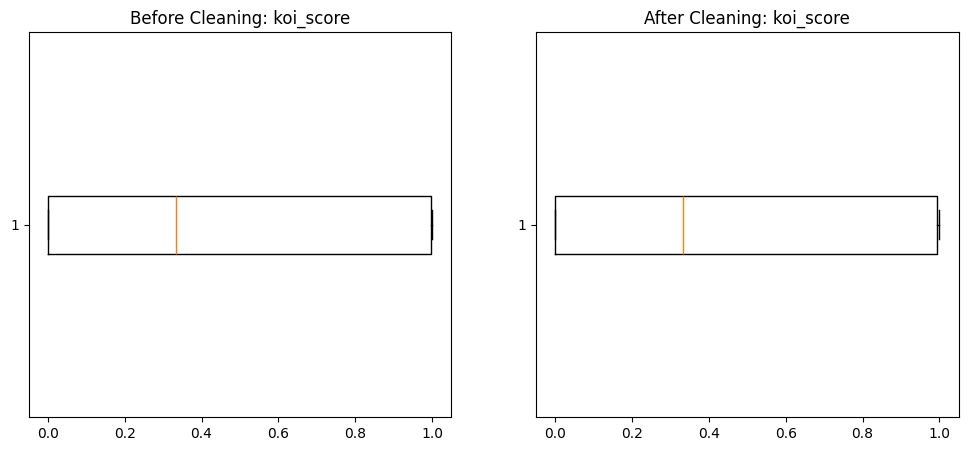

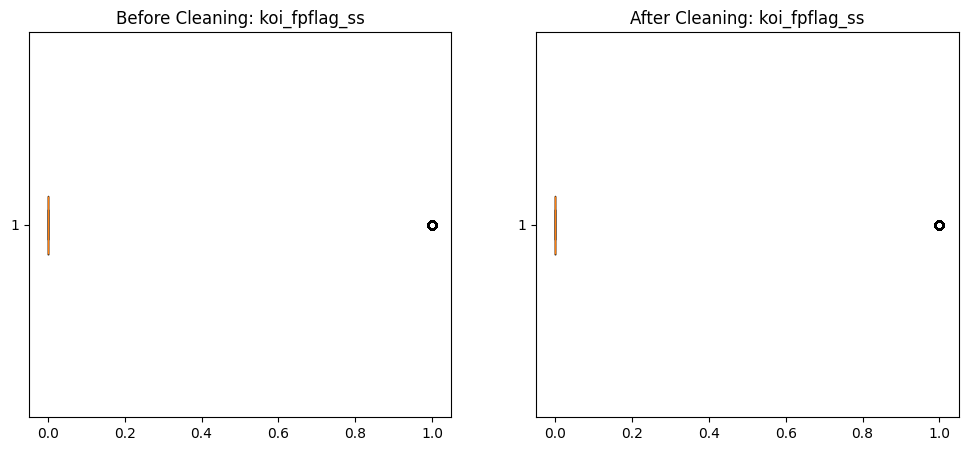

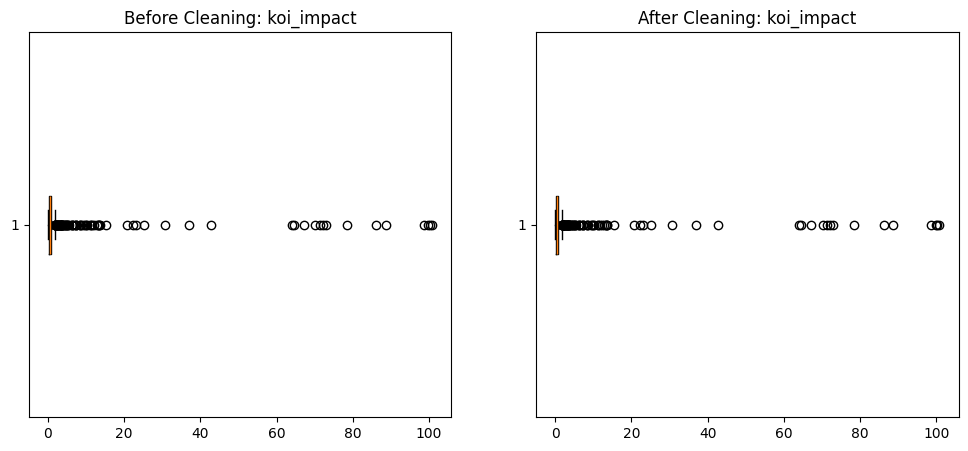

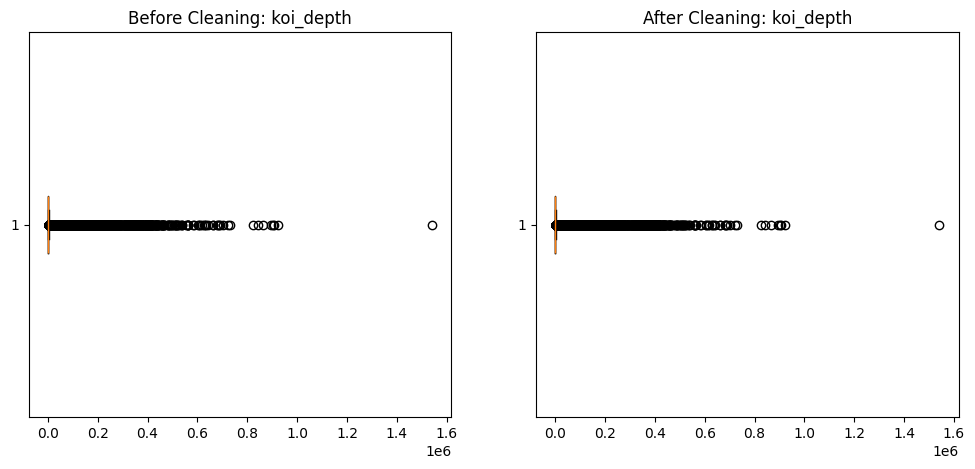

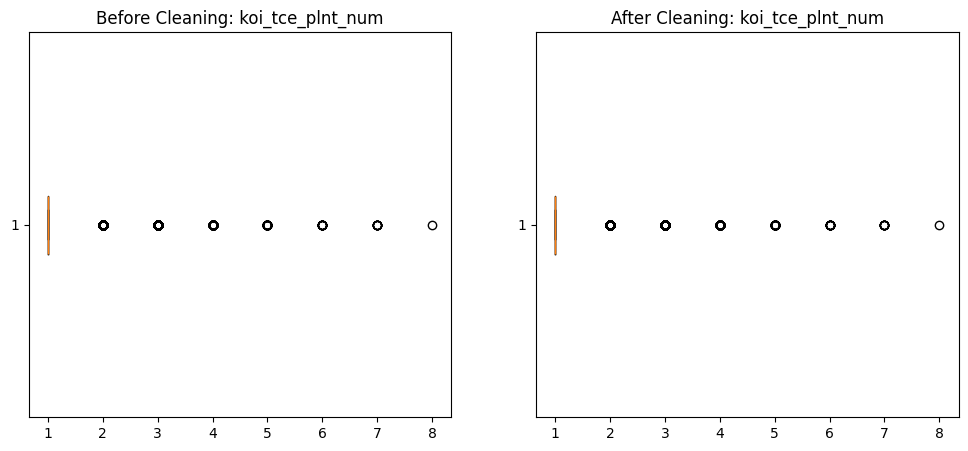

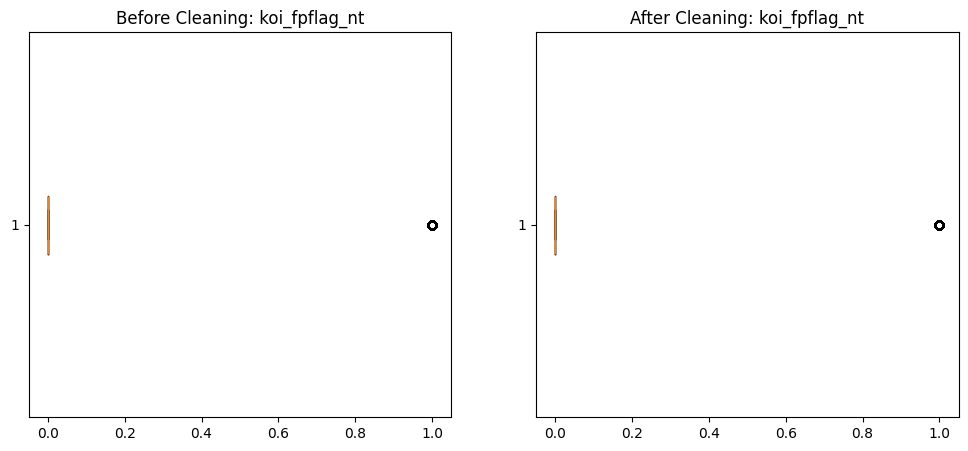

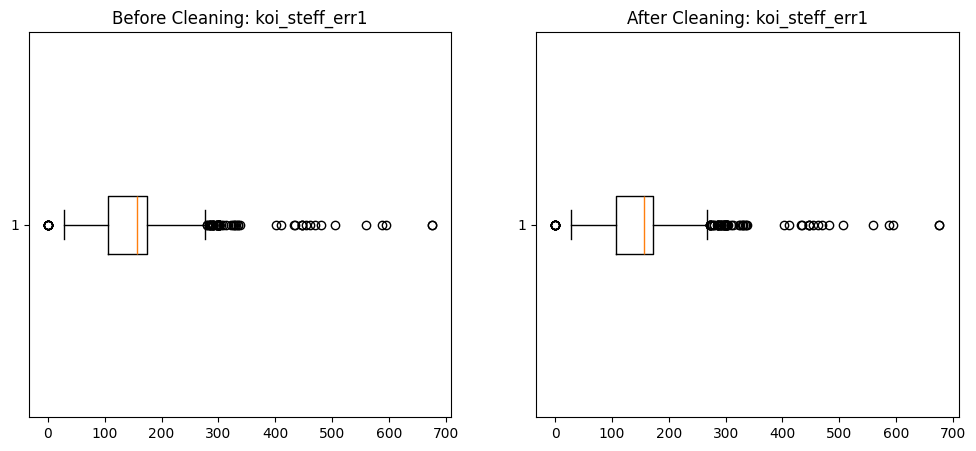

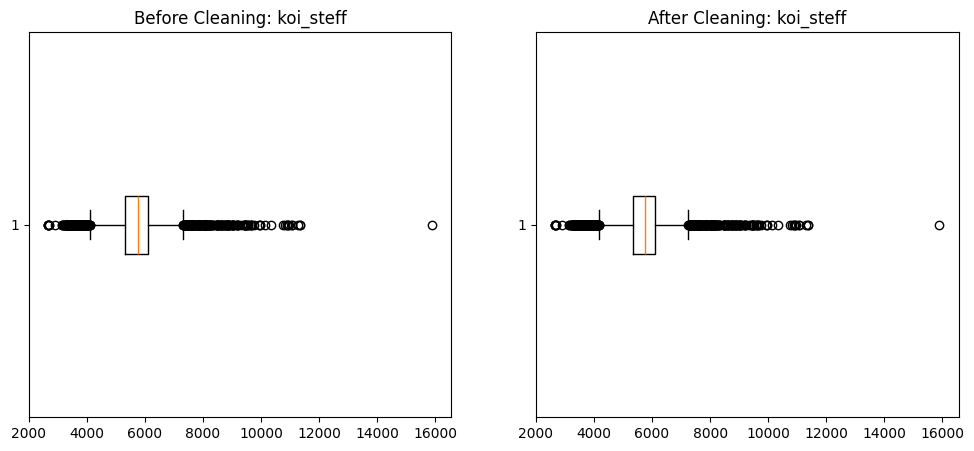

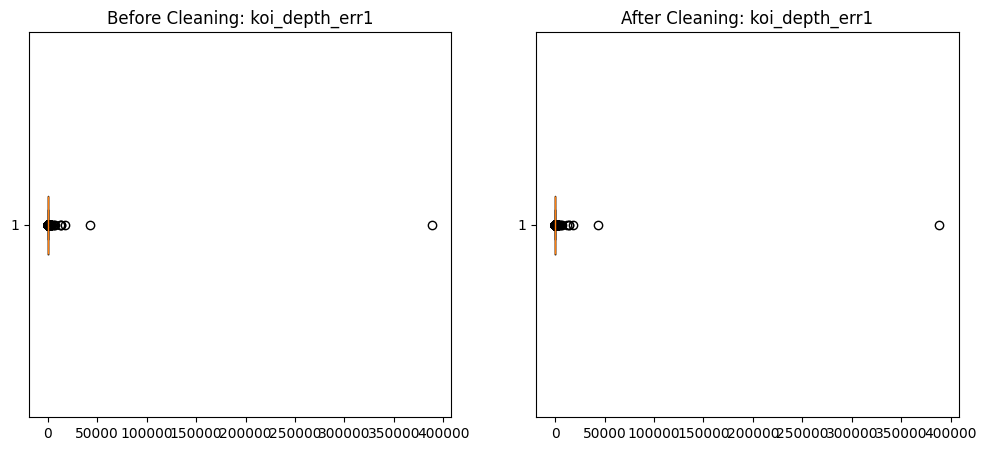

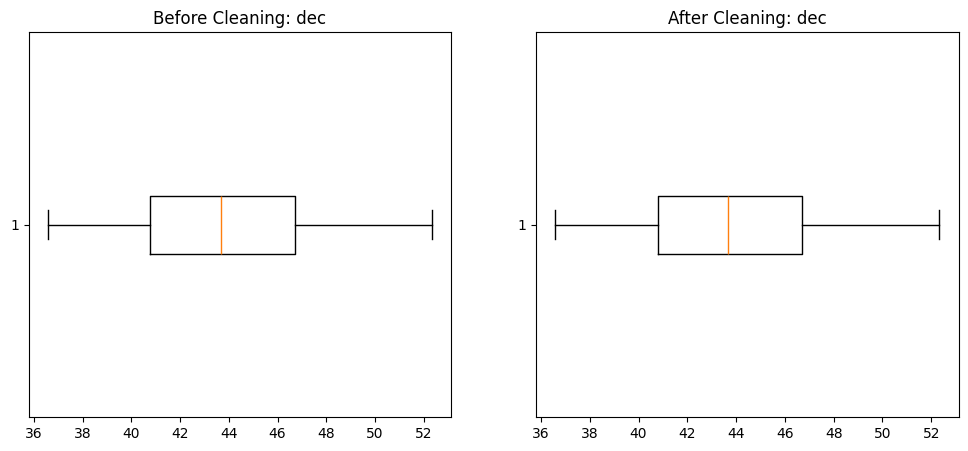

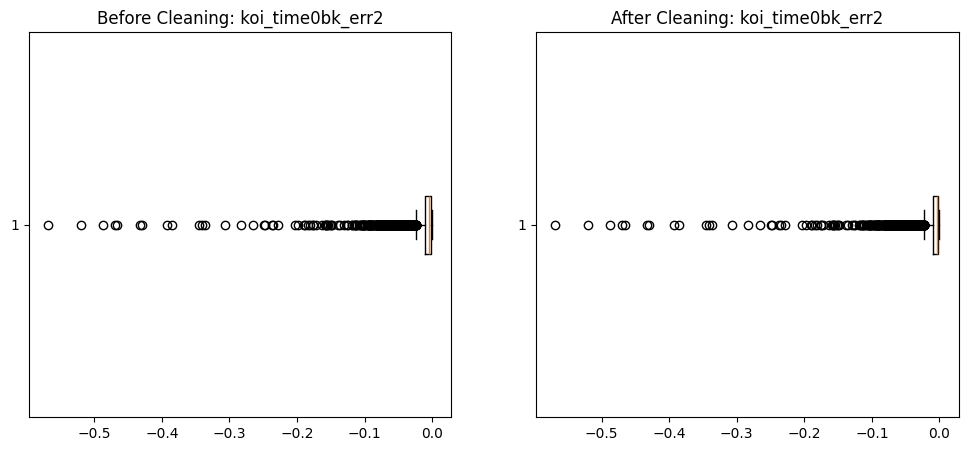

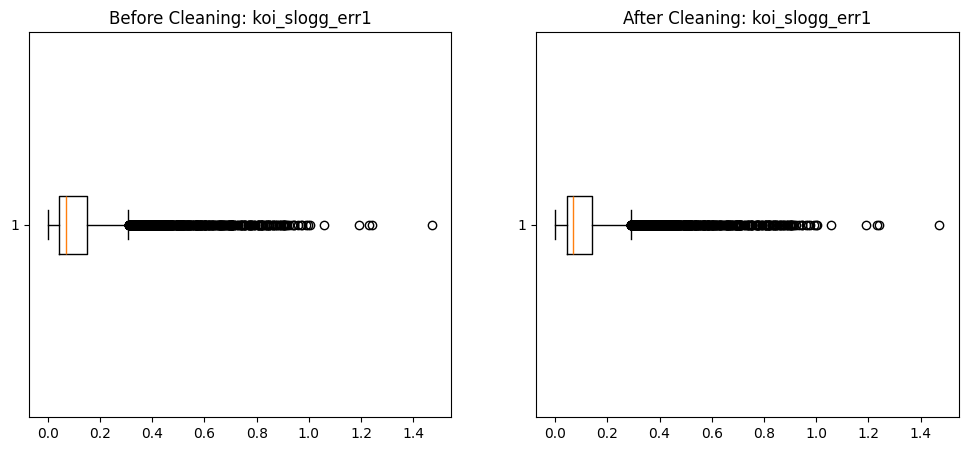

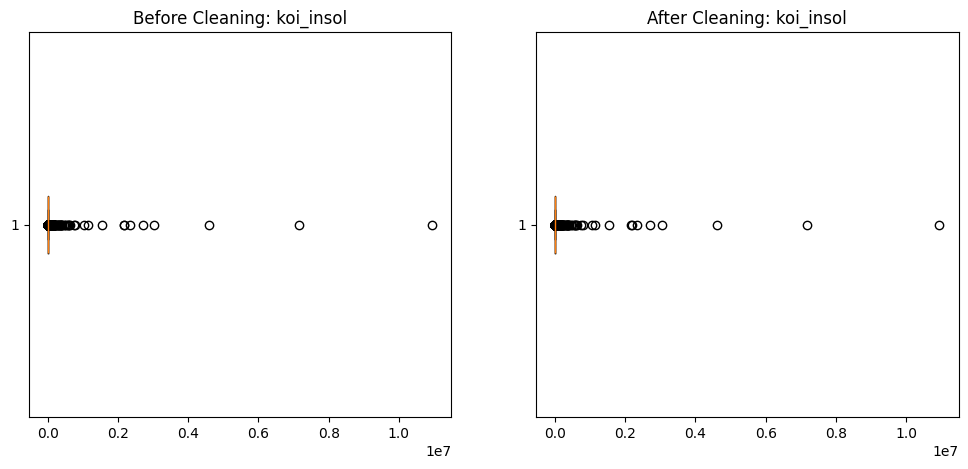

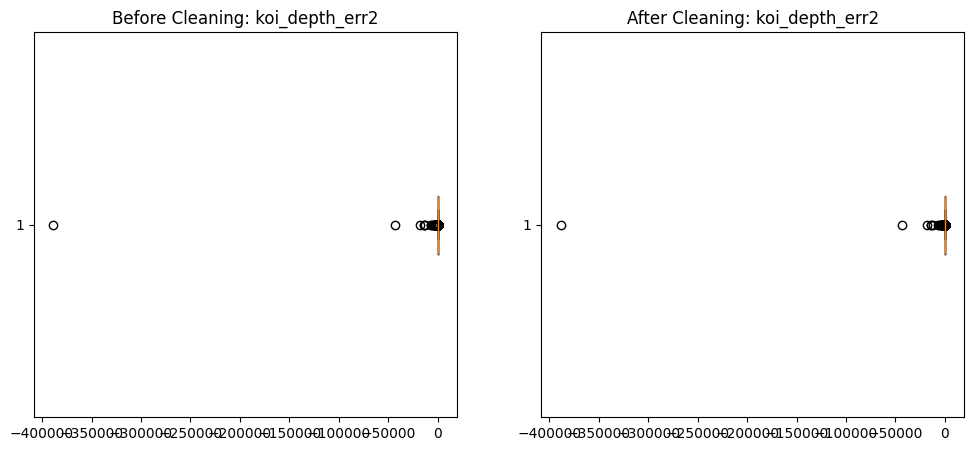

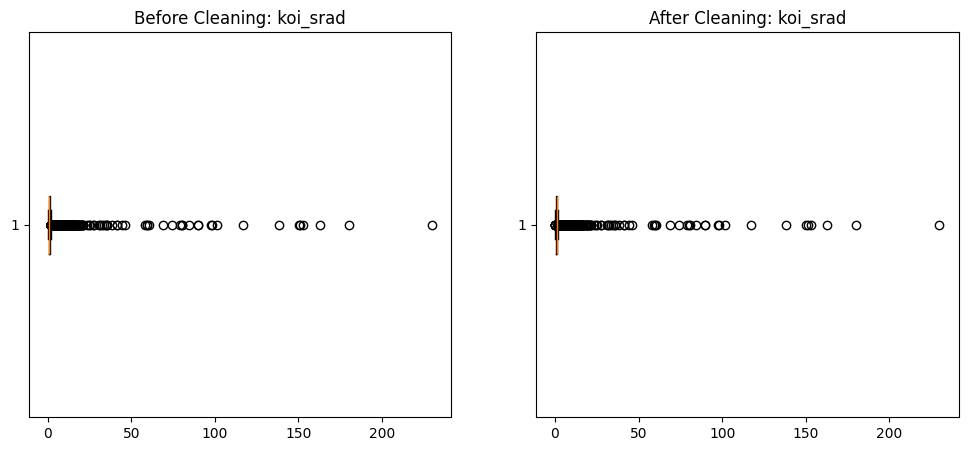

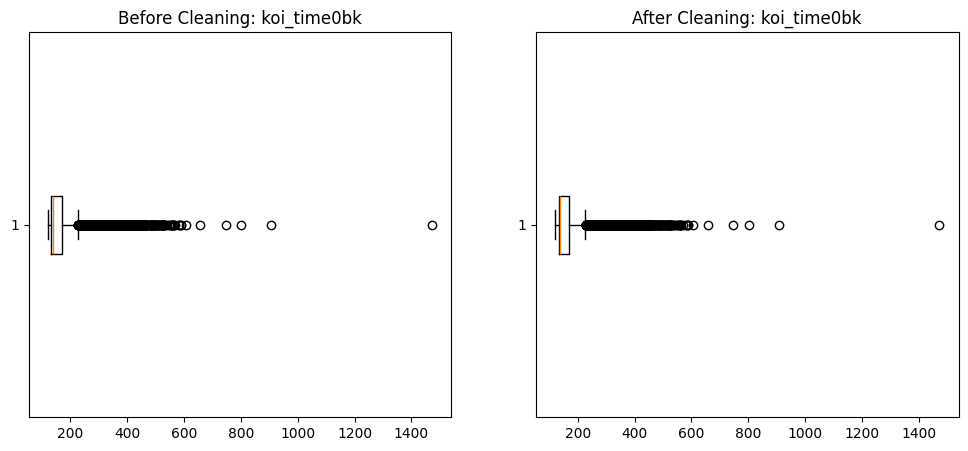

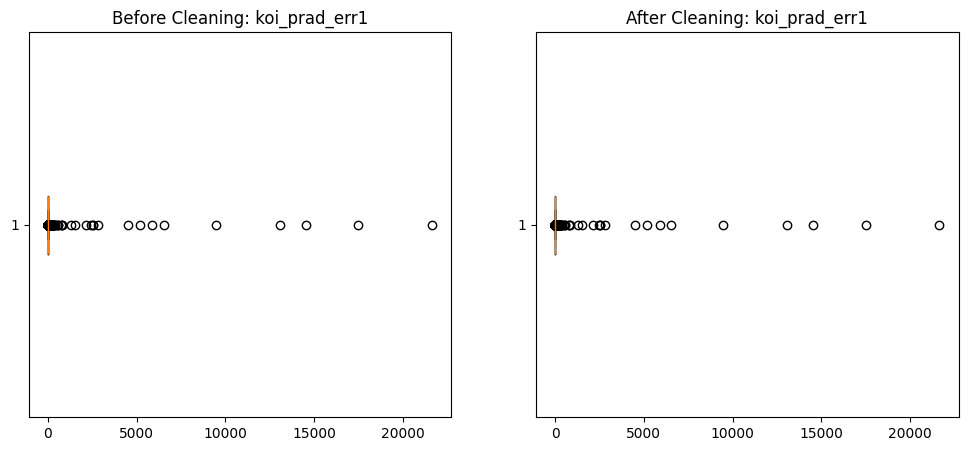

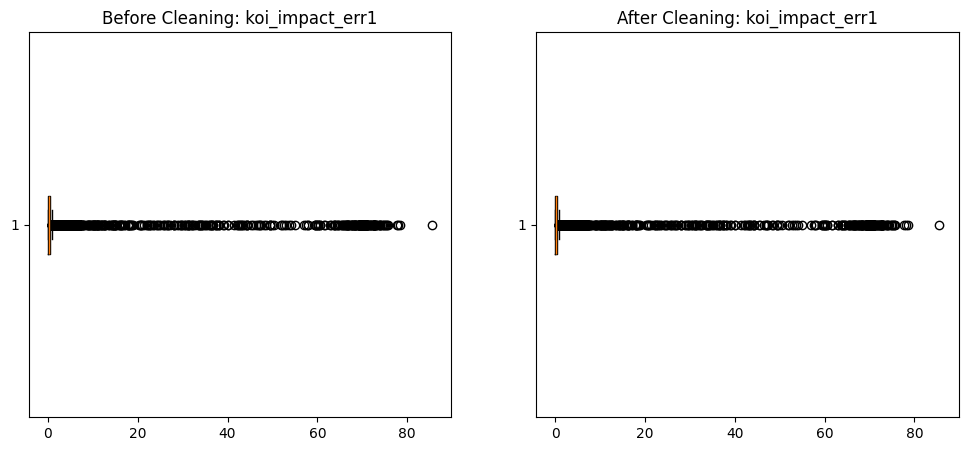

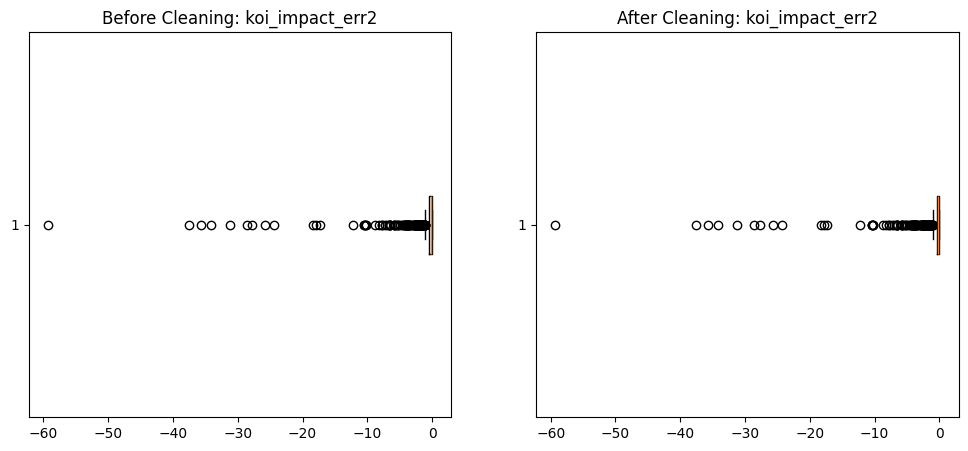

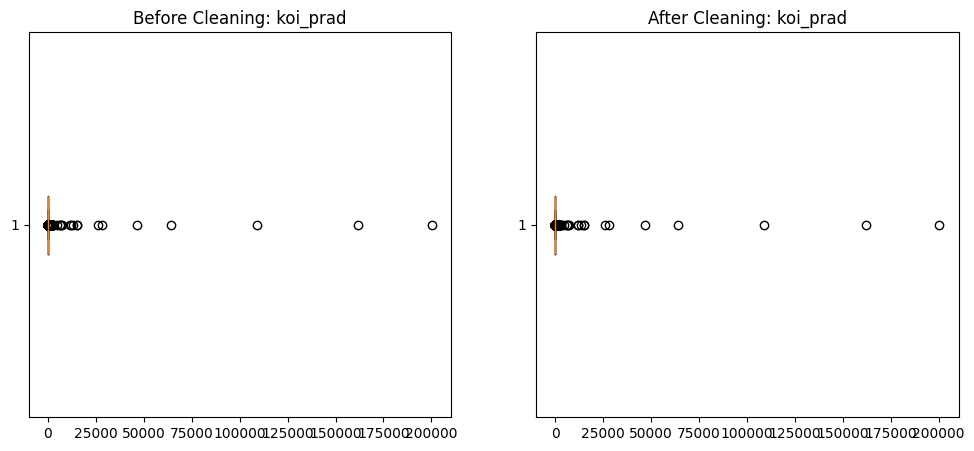

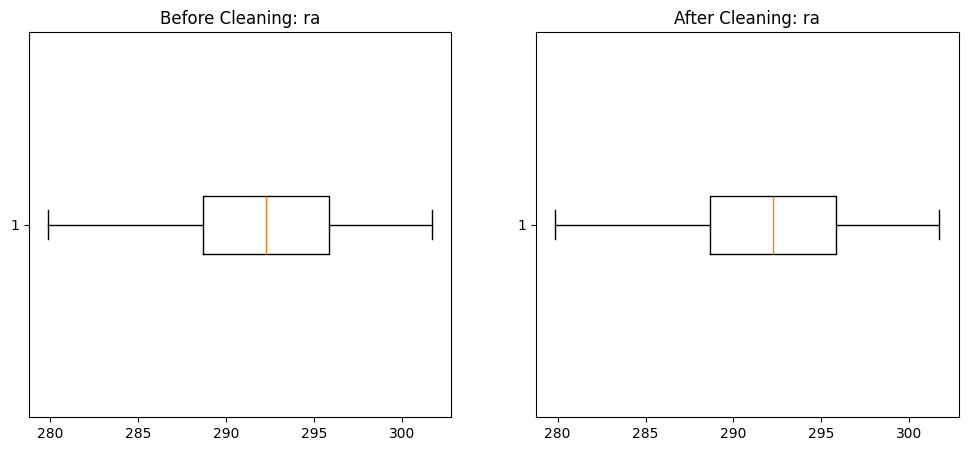

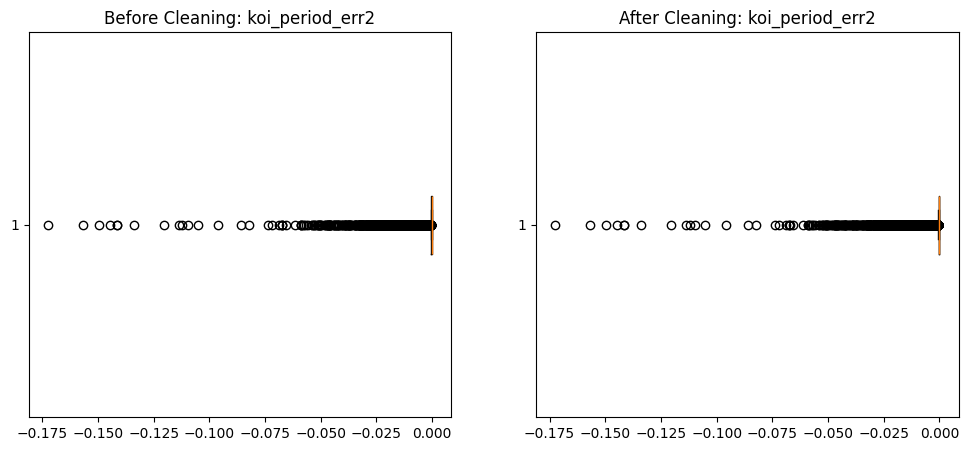

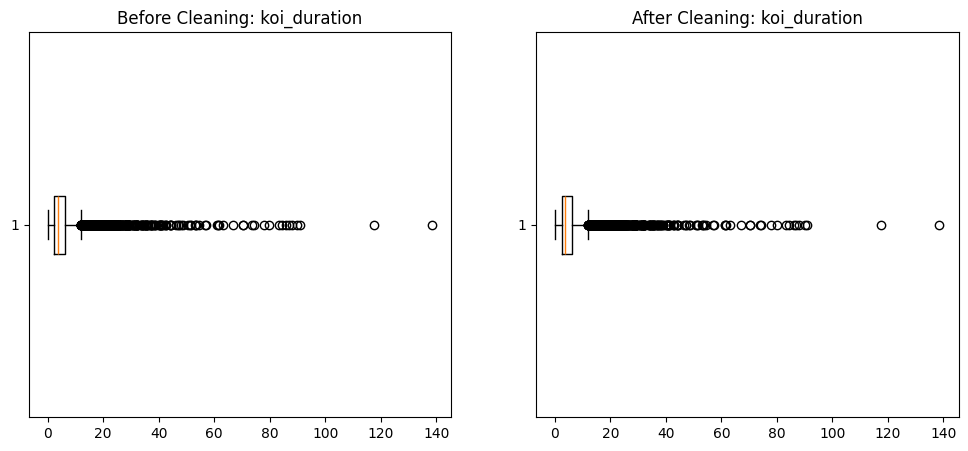

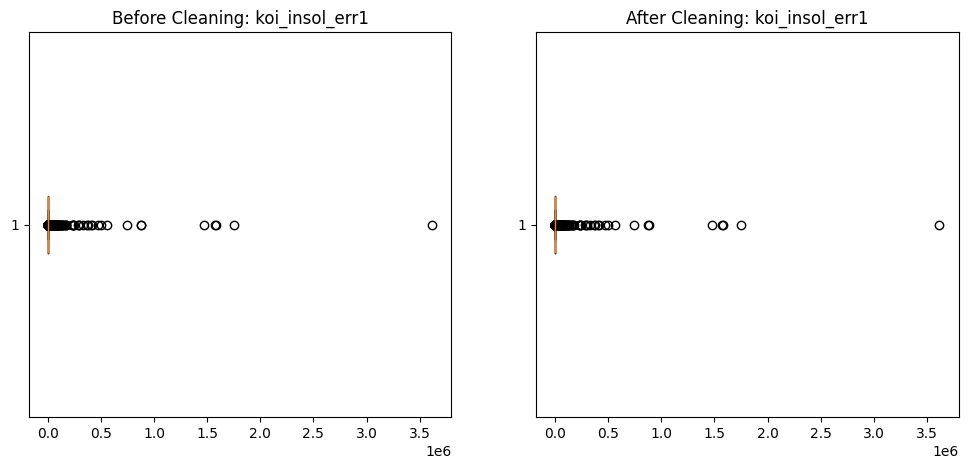

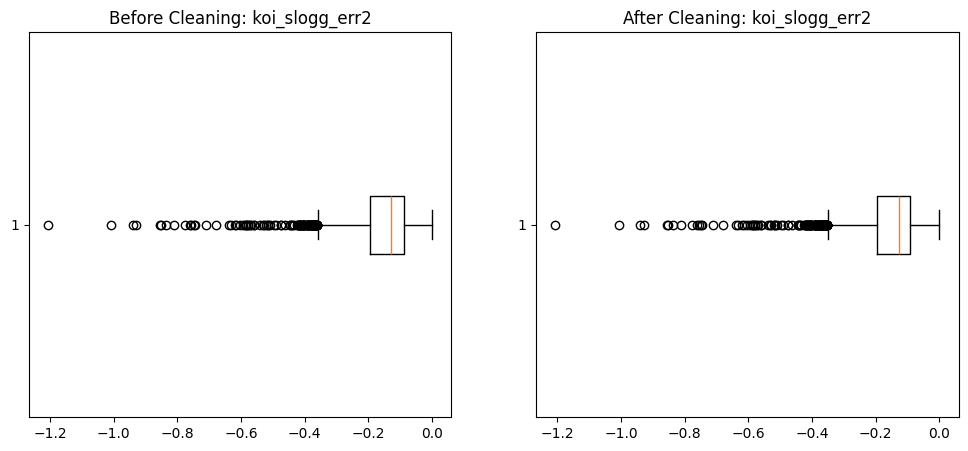

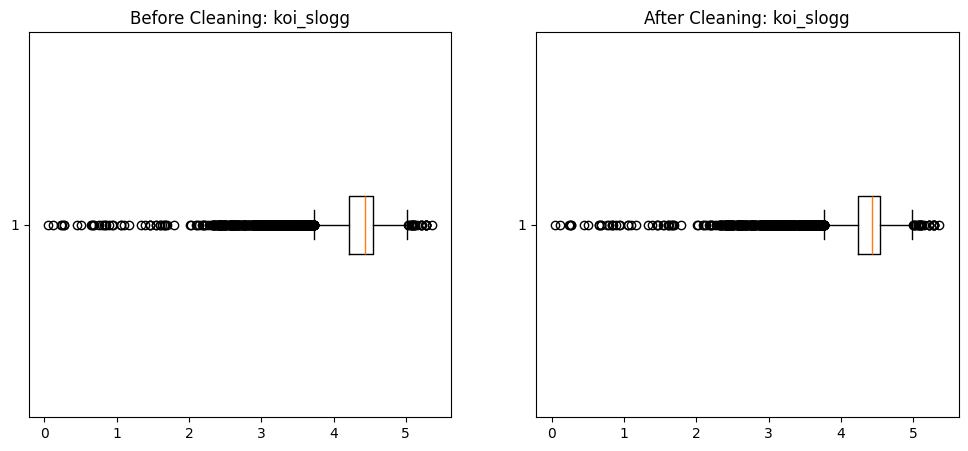

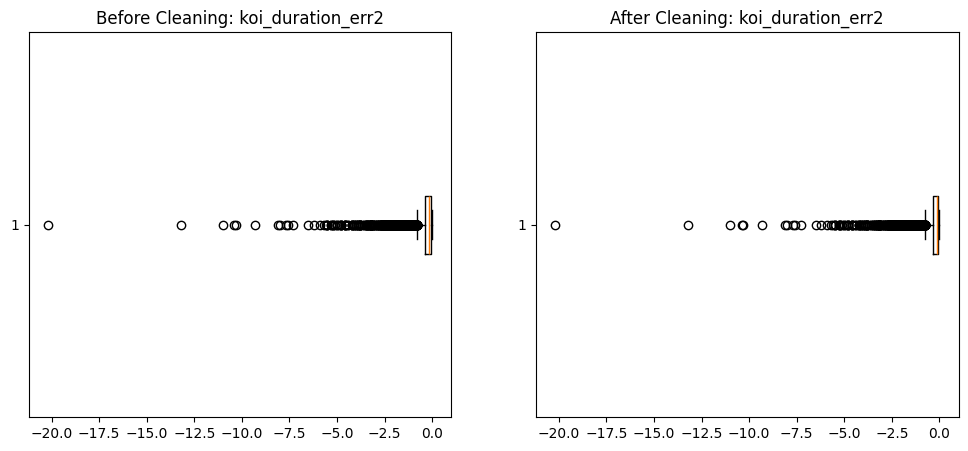

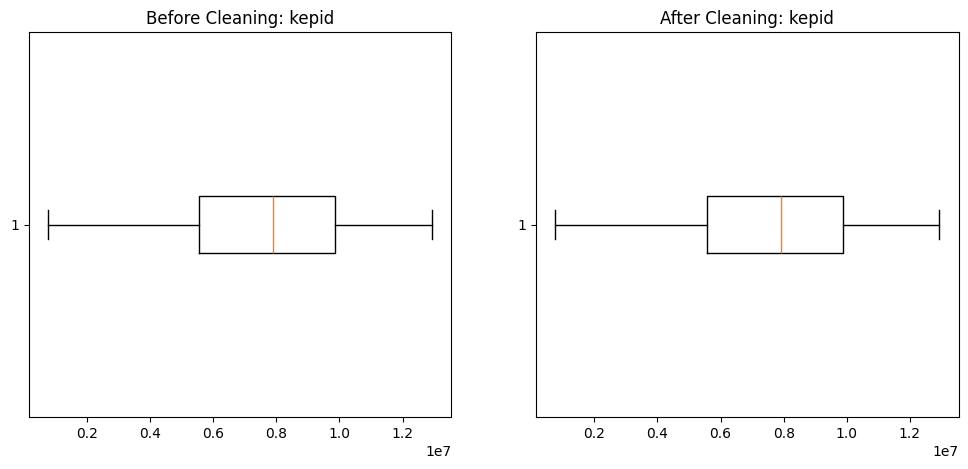

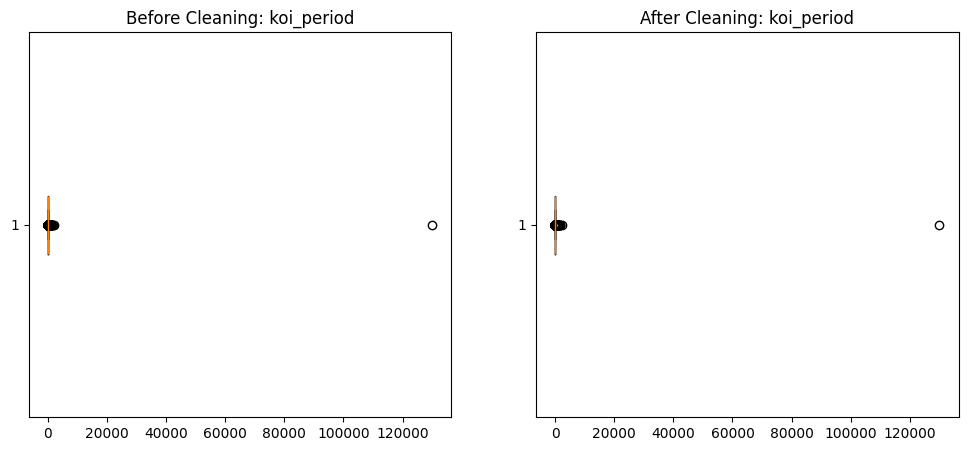

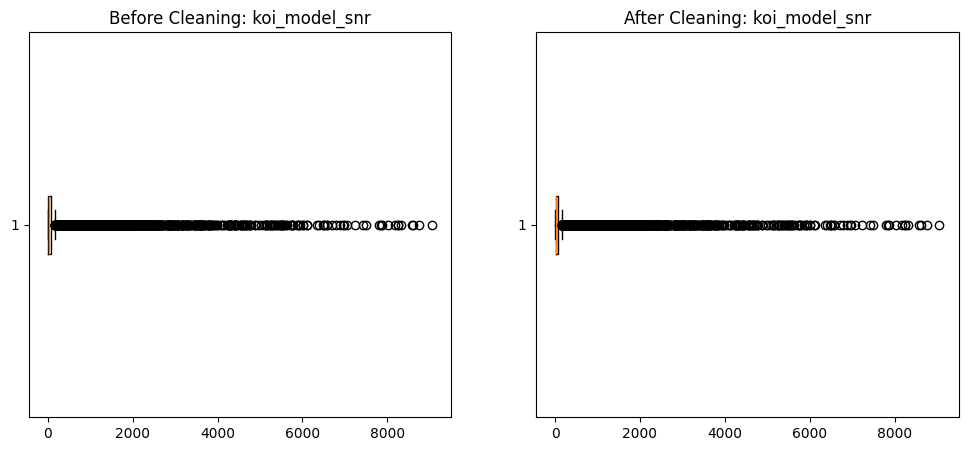

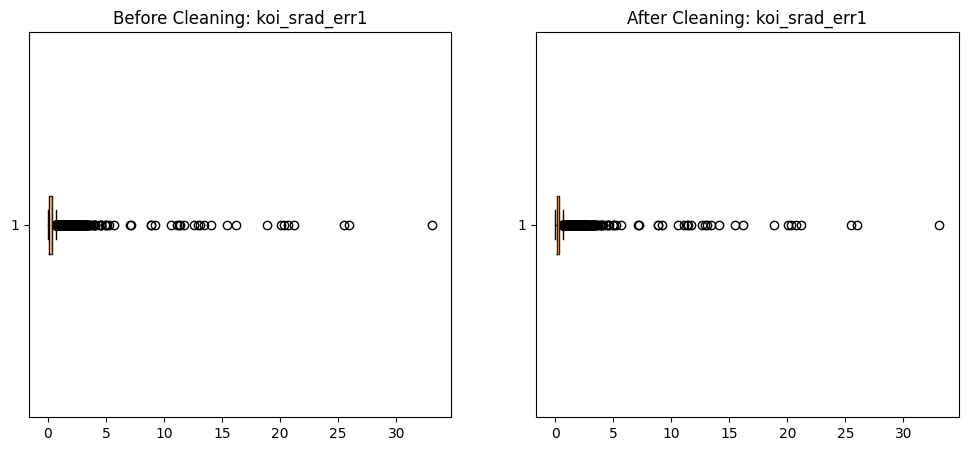

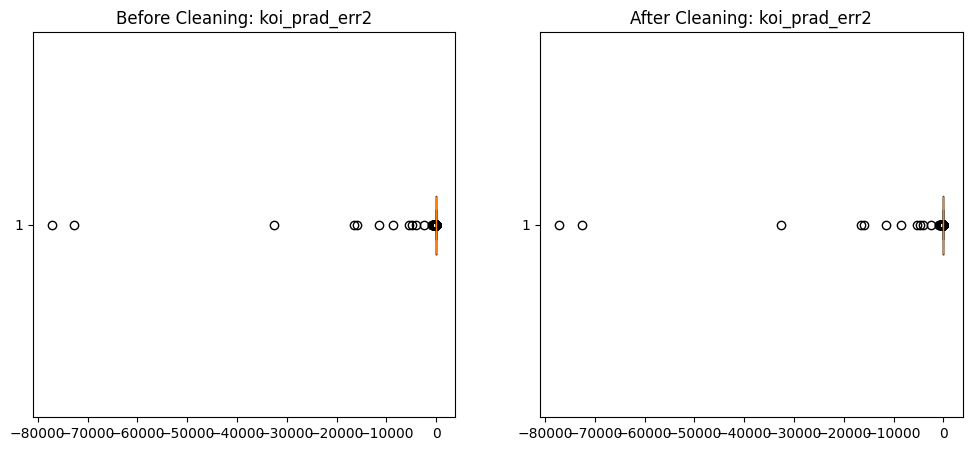

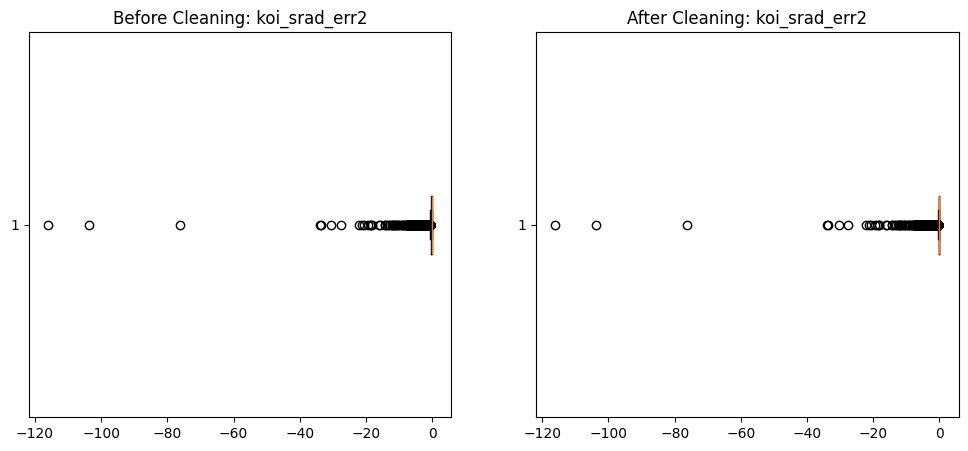

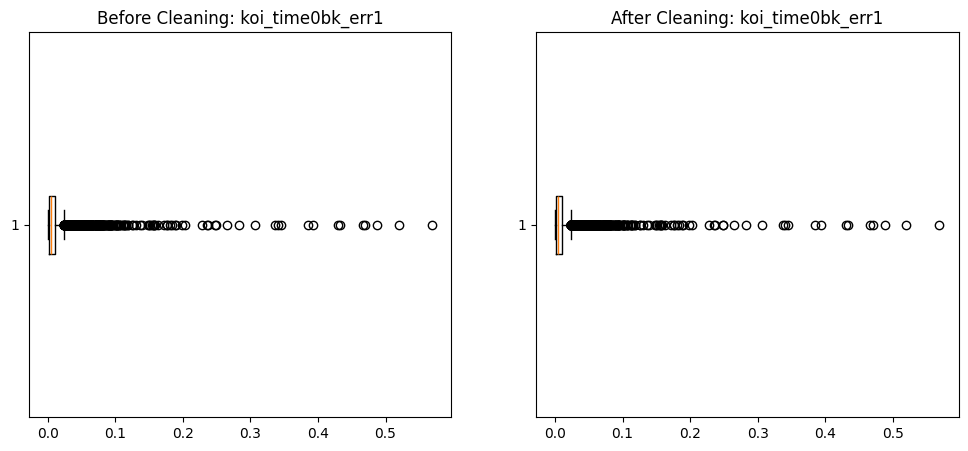

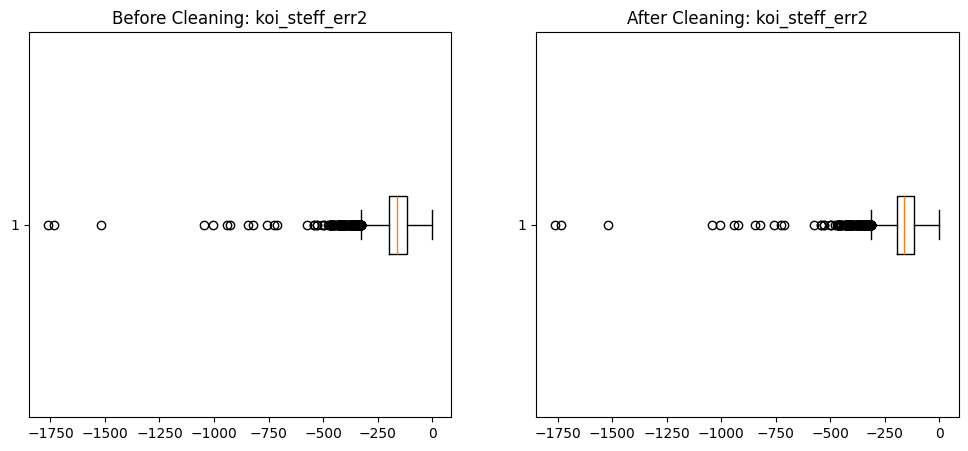

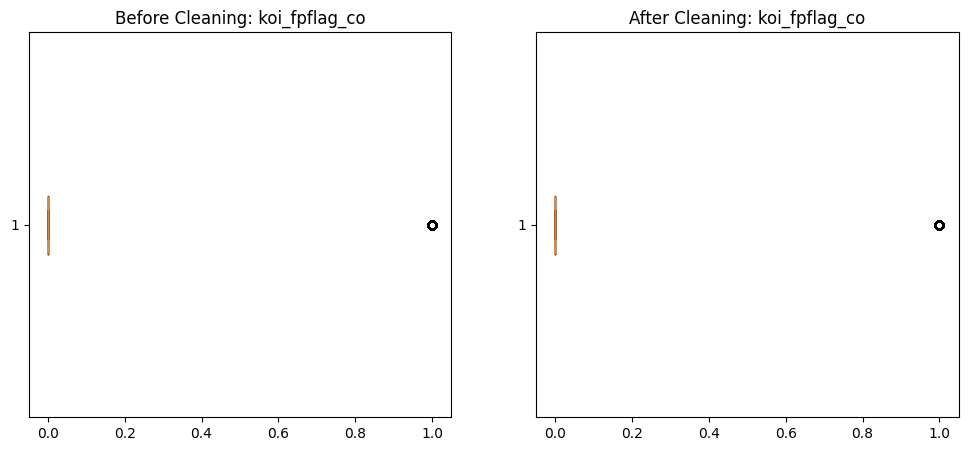

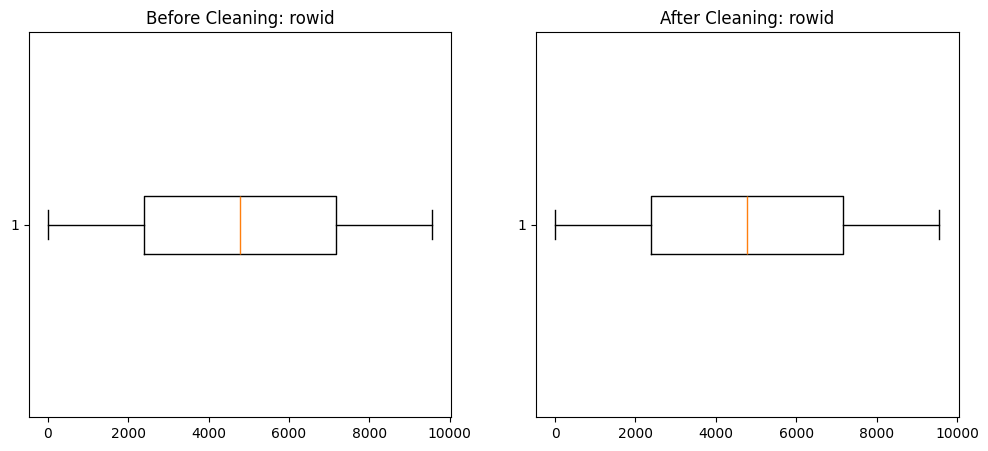

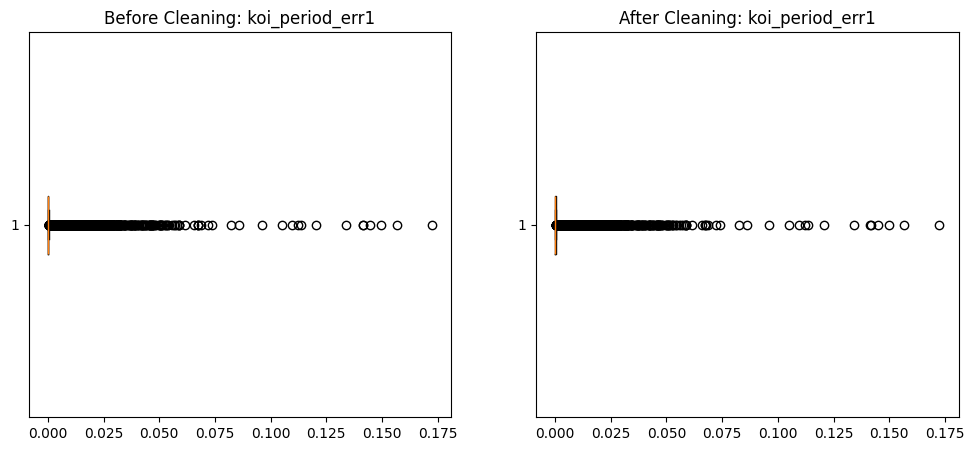

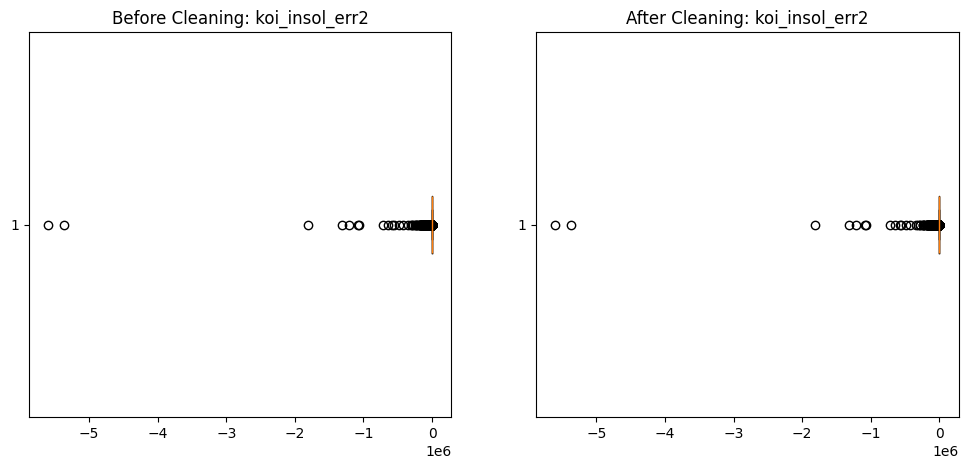

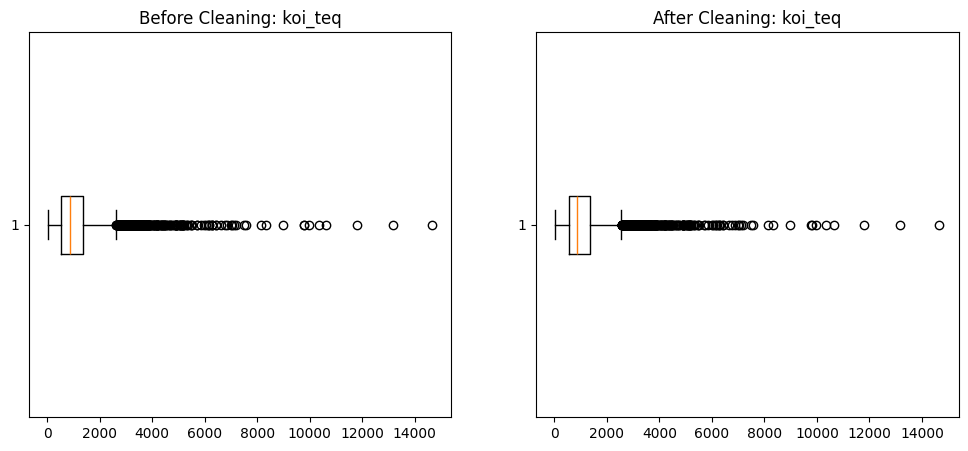

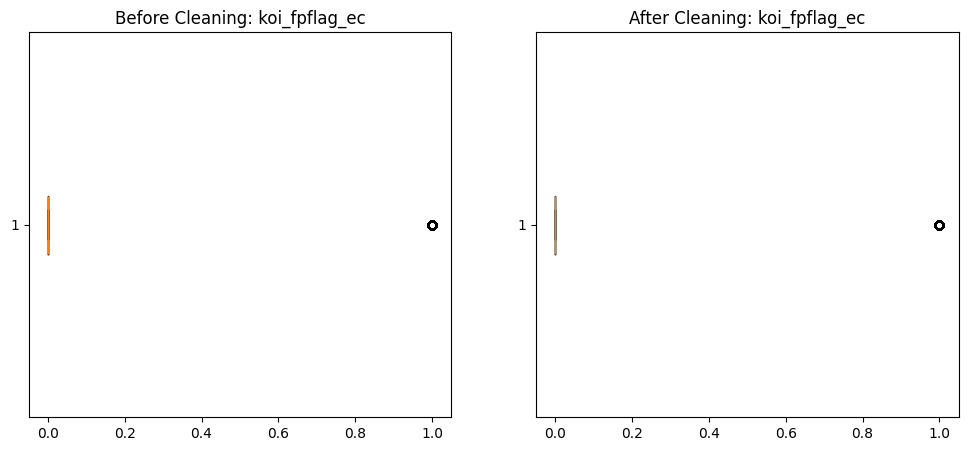

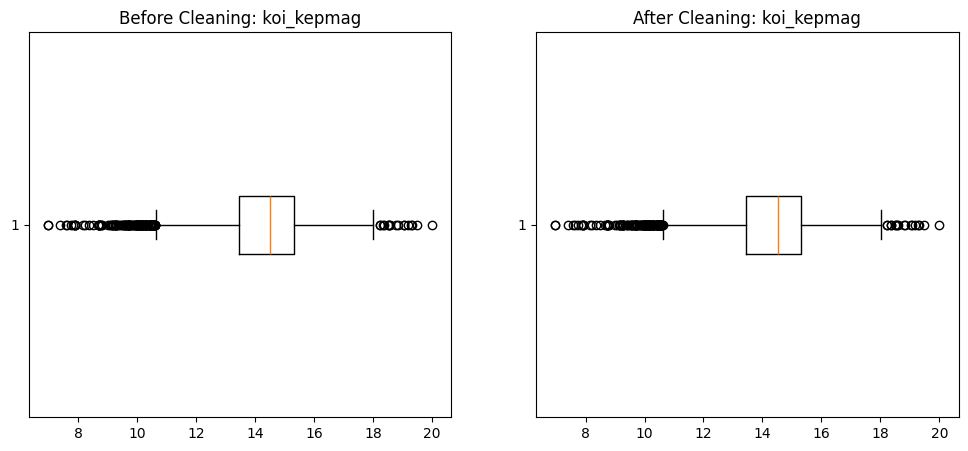

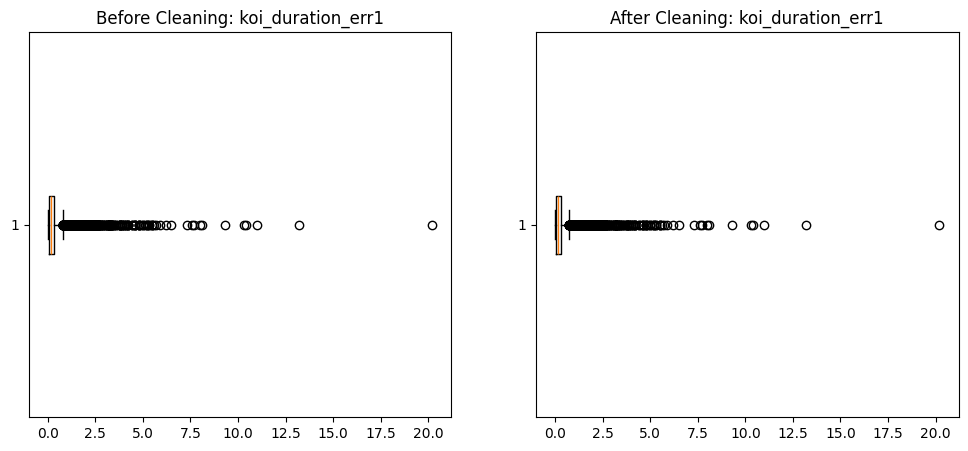

The following numerical columns were removed during cleaning:
- koi_teq_err2
- koi_teq_err1.1


In [ ]:
import matplotlib.pyplot as plt

# Identify numerical columns in original and cleaned datasets
original_numerical_columns = df_original.select_dtypes(include=['number']).columns
cleaned_numerical_columns = df_cleaned.select_dtypes(include=['number']).columns

# Find common numerical columns
common_numerical_columns = list(set(original_numerical_columns) & set(cleaned_numerical_columns))

# Identify dropped numerical columns
dropped_columns = list(set(original_numerical_columns) - set(cleaned_numerical_columns))
print(f"Dropped Columns: {dropped_columns}")

# Compare numerical columns that exist in both datasets
for column in common_numerical_columns:
    plt.figure(figsize=(12, 5))

    # Before cleaning
    plt.subplot(1, 2, 1)
    plt.boxplot(df_original[column].dropna(), vert=False)
    plt.title(f'Before Cleaning: {column}')

    # After cleaning
    plt.subplot(1, 2, 2)
    plt.boxplot(df_cleaned[column].dropna(), vert=False)
    plt.title(f'After Cleaning: {column}')

    plt.show()

# Optionally print dropped columns for reporting purposes
if dropped_columns:
    print("The following numerical columns were removed during cleaning:")
    for col in dropped_columns:
        print(f"- {col}")

### **Missing Values**
Original dataset contained missing values across several columns.
Cleaned dataset has **no missing values**.

### **Statistical Differences**
Summary statistics for numerical columns indicate refined and consistent data.

### **Dropped Columns**
Columns dropped were those with high missing data or irrelevant to the analysis.

### **Conclusion**
Understood the  data types and distributions aids in selecting appropriate preprocessing and modeling techniques.
The cleaned dataset is ready for further analysis and modeling, with enhanced consistency and no missing or irrelevant data. This ensures robust and accurate outcomes for downstream tasks.

# Kepler Exoplanet Classification: Exploratory Data Analysis

This notebook performs a detailed exploratory data analysis on the Kepler exoplanet dataset for classification purposes. We'll analyze various features to understand their relationships and importance in determining whether a candidate is a confirmed exoplanet or a false positive.

## Dataset Overview
The dataset contains various measurements and characteristics of Kepler Objects of Interest (KOI), including:
- Orbital characteristics (period, duration, etc.)
- Physical properties (radius, temperature, etc.)
- Star characteristics (temperature, radius, etc.)
- Classification labels (CONFIRMED, FALSE POSITIVE)


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

# Set plotting style
# plt.style.use('seaborn')
sns.set_palette('husl')

## Data Loading and Initial Preparation

First, we'll load the data and prepare it for analysis by:
1. Creating a binary classification target
2. Identifying numerical and categorical features
3. Checking for missing values


In [ ]:
# Load and prepare data
def load_and_prepare_data(data):
    # Convert disposition to binary classification
    data['is_confirmed'] = (data['koi_disposition'] == 'CONFIRMED').astype(int)

    # Select relevant numerical features
    numerical_features = [
        'koi_period', 'koi_impact', 'koi_duration',
        'koi_depth', 'koi_prad', 'koi_teq',
        'koi_insol', 'koi_model_snr', 'koi_steff',
        'koi_slogg', 'koi_srad'
    ]

    # Select categorical features
    categorical_features = [
        'koi_fpflag_nt', 'koi_fpflag_ss',
        'koi_fpflag_co', 'koi_fpflag_ec'
    ]

    return data, numerical_features, categorical_features

# Load data
data = df_cleaned
data, numerical_features, categorical_features = load_and_prepare_data(data)

# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("\nFeature Information:")
data.info()

Dataset Shape: (9564, 48)

Feature Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          9564 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9564 non-null   float64
 12  koi_period_err2    9564 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9564 non-null   float64
 15  koi_time0bk_err2   9564 

## Class Distribution Analysis

Understanding the class distribution helps us:
- Identify potential class imbalance issues
- Plan appropriate sampling or weighting strategies
- Set baseline metrics for model evaluation

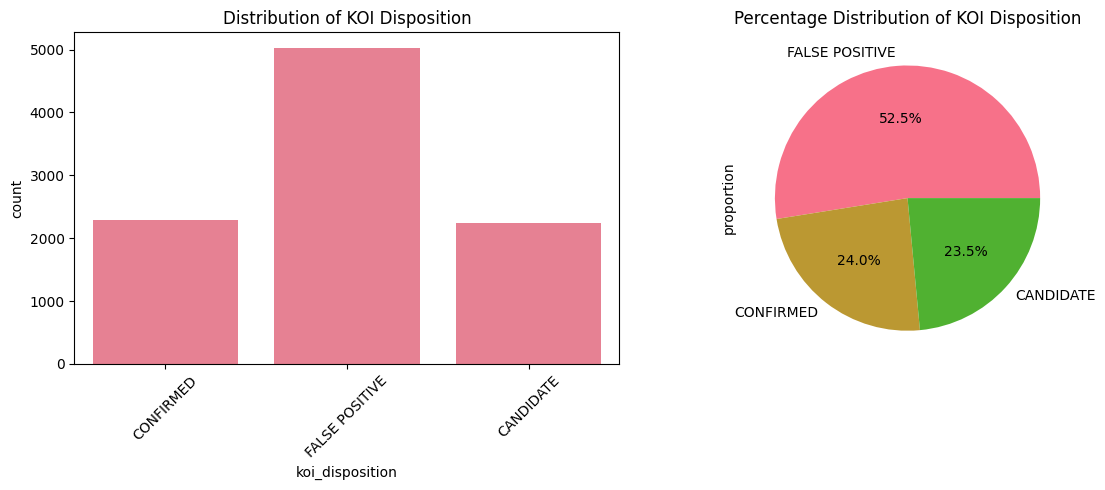

In [ ]:
def analyze_class_distribution(data):
    plt.figure(figsize=(12, 5))

    # Plot 1: Count distribution
    plt.subplot(1, 2, 1)
    sns.countplot(data=data, x='koi_disposition')
    plt.title('Distribution of KOI Disposition')
    plt.xticks(rotation=45)

    # Plot 2: Percentage distribution
    plt.subplot(1, 2, 2)
    data['koi_disposition'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
    plt.title('Percentage Distribution of KOI Disposition')

    plt.tight_layout()
    plt.show()

analyze_class_distribution(data)

The class distribution analysis of Kepler Objects of Interest (KOI) dispositions reveals a notable imbalance among the categories. A count plot shows that "False Positive" cases dominate the dataset, significantly outnumbering "Confirmed" exoplanets and other categories. This indicates that most KOI candidates fail to meet the stringent criteria required for confirmation as exoplanets. The pie chart further highlights this imbalance, with "False Positive" cases comprising the largest proportion, underscoring the challenges in distinguishing true exoplanets from false signals.
This class imbalance has significant implications for data modeling and analysis. Machine learning models trained on this dataset may become biased toward predicting the majority class unless appropriate measures are taken. Techniques such as oversampling the minority class, undersampling the majority class, or using weighted loss functions can help mitigate this issue. Moreover, evaluating model performance using metrics like precision, recall, and F1-score becomes crucial to ensure that predictions for minority classes are not overlooked.

**How do preliminary (koi_pdisposition) and final (koi_disposition) classifications relate?**

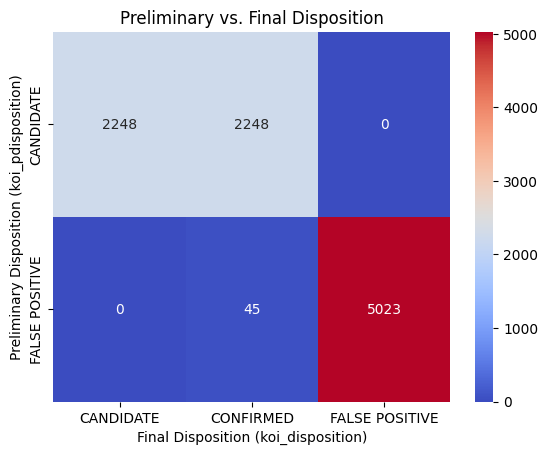

In [ ]:
cross_tab = pd.crosstab(data['koi_pdisposition'], data['koi_disposition'])

sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')
plt.title('Preliminary vs. Final Disposition')
plt.xlabel('Final Disposition (koi_disposition)')
plt.ylabel('Preliminary Disposition (koi_pdisposition)')
plt.show()

The heat map presents a confusion matrix comparing preliminary and final dispositions of planetary candidates. Using a color gradient from blue (low numbers) to red (high numbers), it shows the transition of classifications. The matrix is populated with specific counts: 2248 candidates, 45 confirmed planets, and 5023 false positives, with zeros in other cells indicating no transitions between certain categories.

**Inferences -**

The large number of false positives (5023) suggests a rigorous verification process that prioritizes accuracy over quantity. The stability of classifications (2248 remaining candidates) indicates a careful approach to confirmation, while the small number of confirmed planets (45) highlights the exceptional nature of definitive planet identification. This pattern reflects the scientific principle of requiring substantial evidence before confirming an exoplanet discovery.

## Feature Analysis

### Numerical Features

For each numerical feature, we'll examine:
1. Distribution shape and characteristics
2. Relationship with target variable
3. Presence of outliers
4. Statistical properties

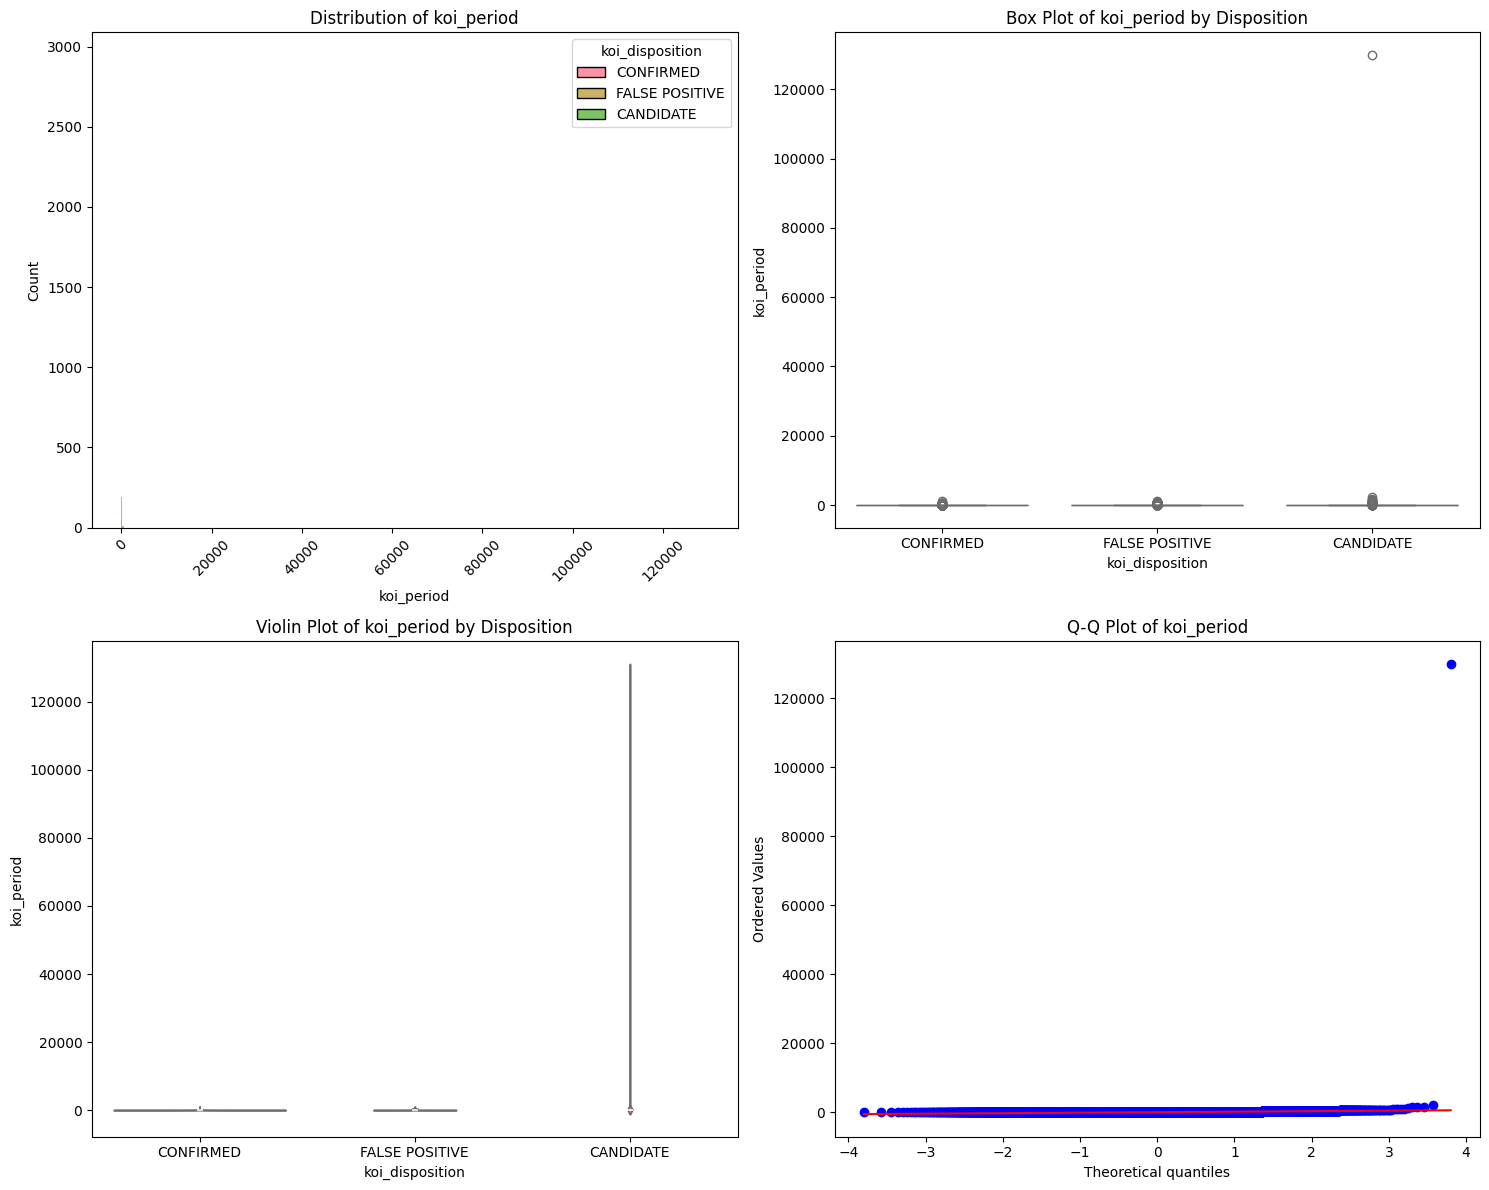


Summary Statistics for koi_period:
                  count        mean          std       min       25%  \
koi_disposition                                                        
CANDIDATE        2248.0  130.523850  2744.156397  0.259820  5.107533   
CONFIRMED        2293.0   27.063211    54.018603  0.341842  5.082748   
FALSE POSITIVE   5023.0   73.312227   139.114025  0.241843  1.507431   

                       50%        75%            max  
koi_disposition                                       
CANDIDATE        13.278651  59.303747  129995.778400  
CONFIRMED        11.322697  25.517274    1071.232624  
FALSE POSITIVE    6.383157  49.401638    1064.268096  


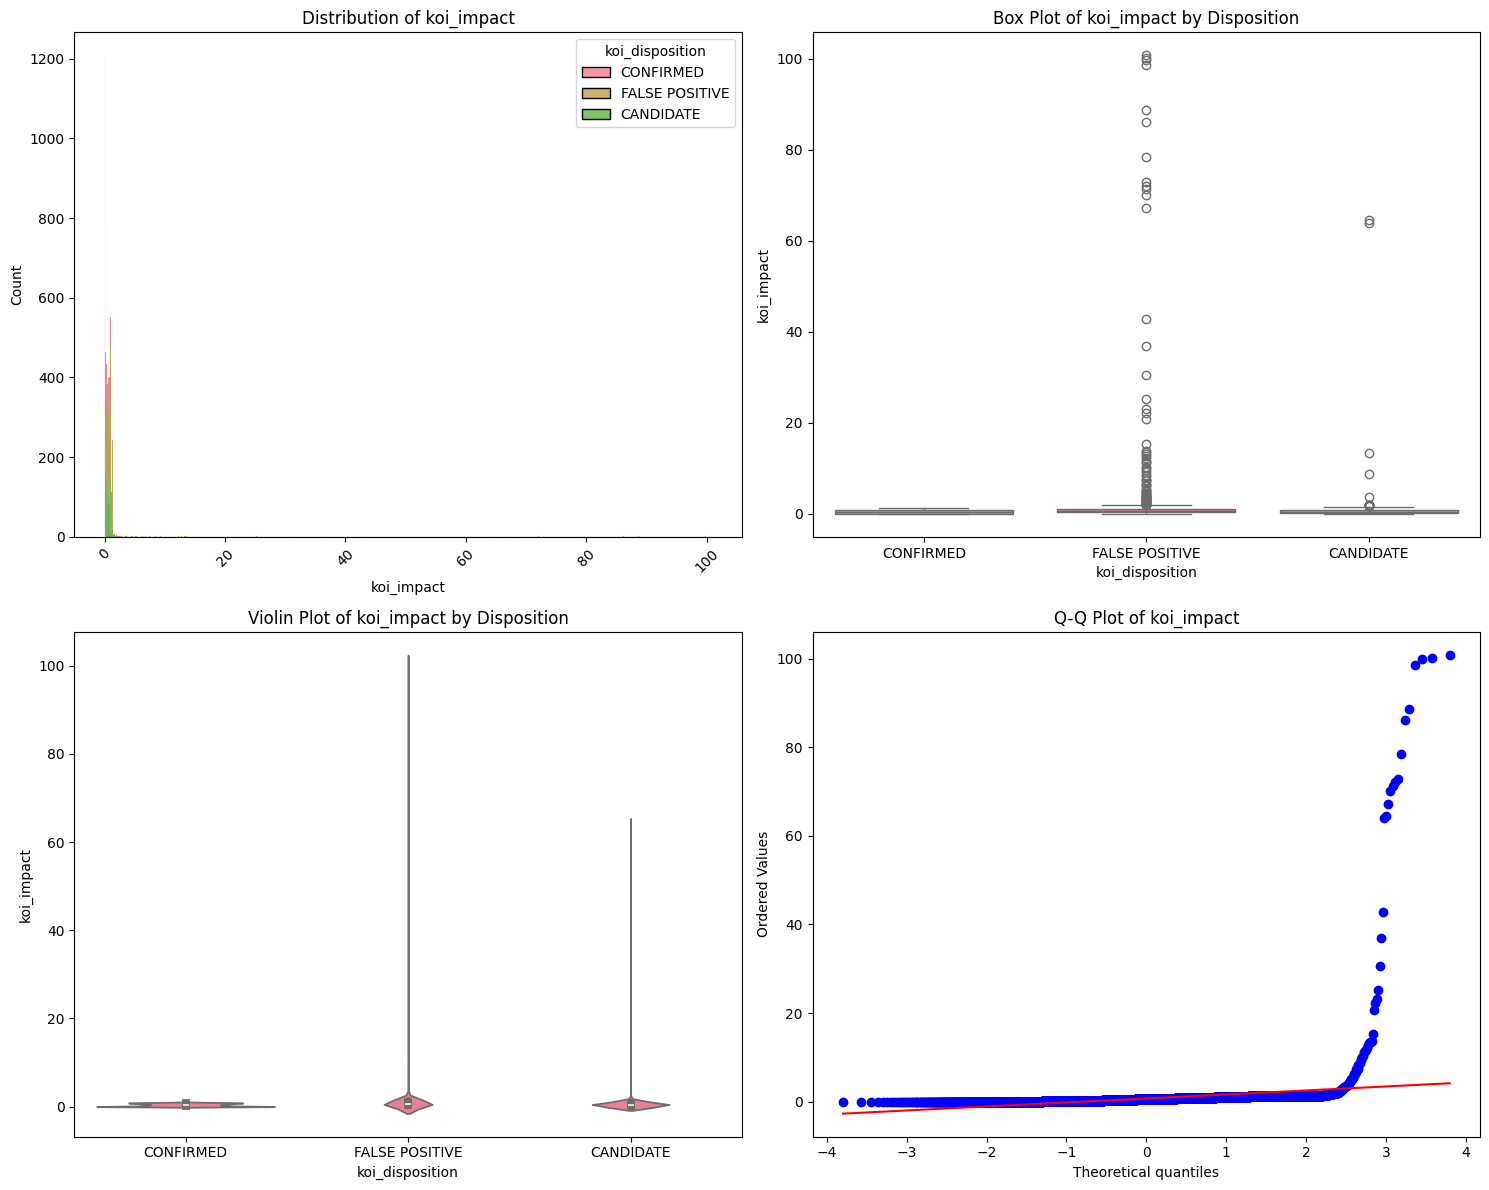


Summary Statistics for koi_impact:
                  count      mean       std  min    25%    50%     75%  \
koi_disposition                                                          
CANDIDATE        2248.0  0.537088  1.961935  0.0  0.153  0.411  0.7525   
CONFIRMED        2293.0  0.426815  0.332136  0.0  0.081  0.393  0.7460   
FALSE POSITIVE   5023.0  0.950144  4.320608  0.0  0.336  0.615  0.9850   

                      max  
koi_disposition            
CANDIDATE         64.5159  
CONFIRMED          1.3000  
FALSE POSITIVE   100.8060  


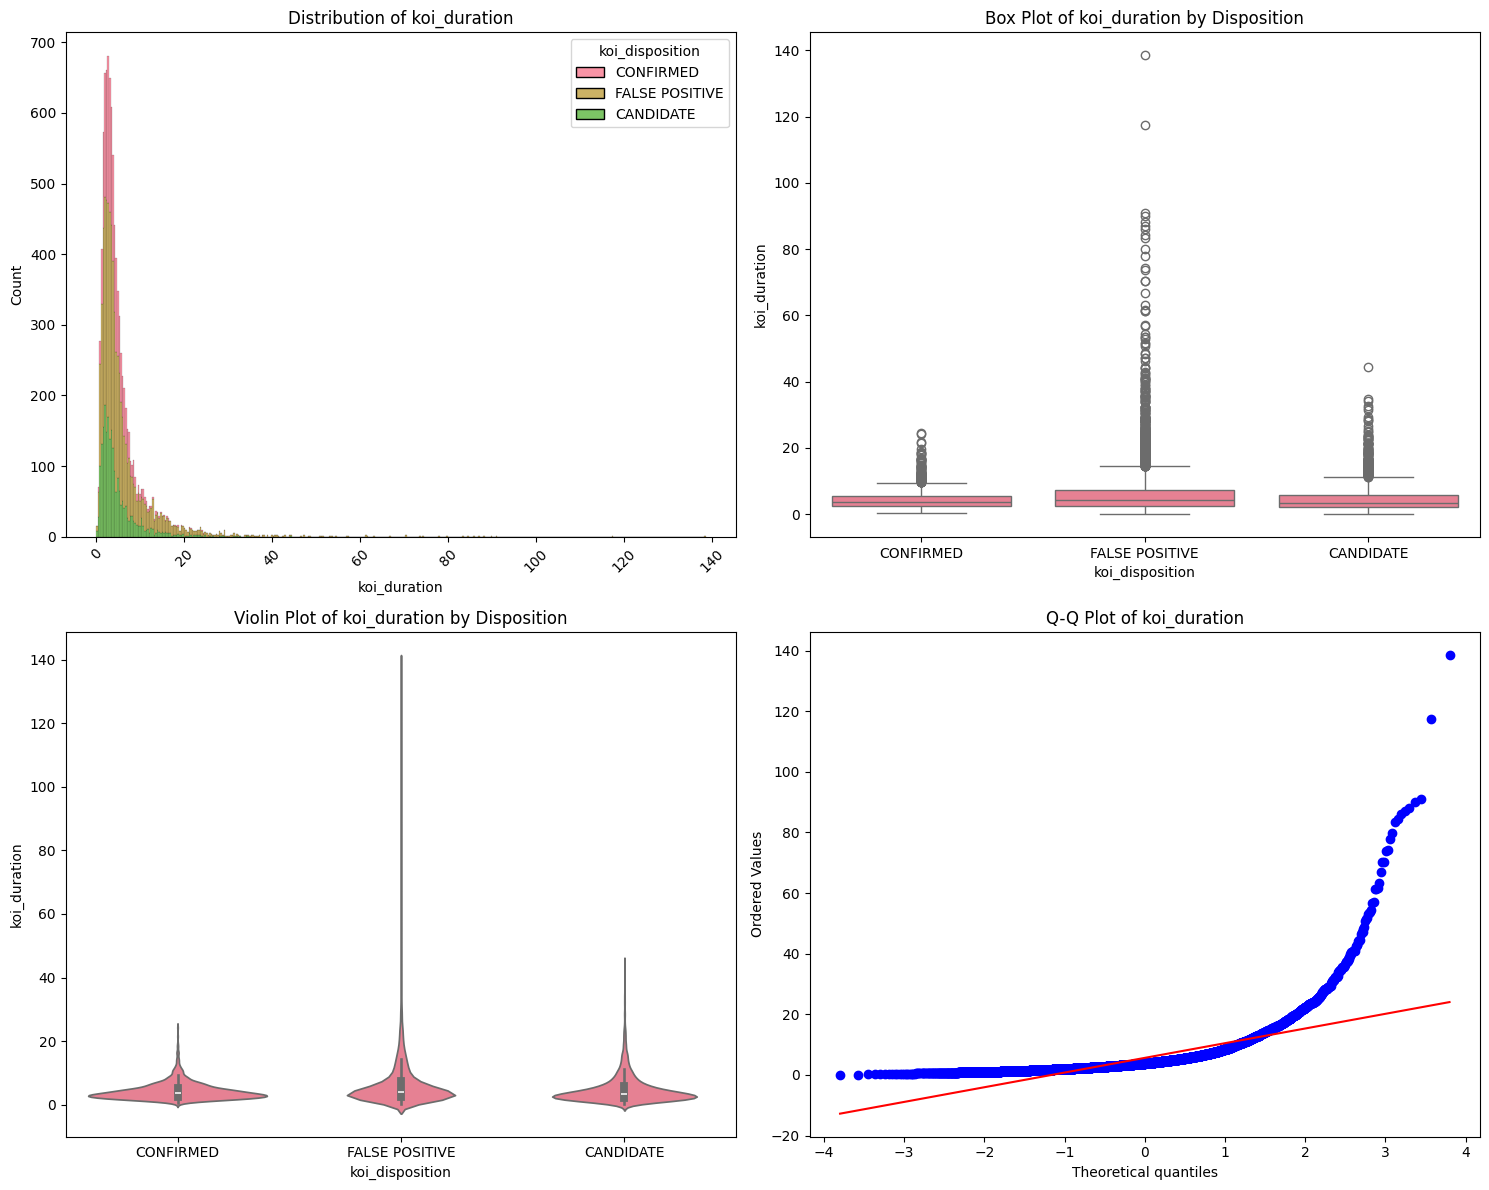


Summary Statistics for koi_duration:
                  count      mean       std     min      25%      50%  \
koi_disposition                                                         
CANDIDATE        2248.0  4.827392  4.413871  0.0520  2.12975  3.44945   
CONFIRMED        2293.0  4.308624  2.721482  0.4279  2.51460  3.57700   
FALSE POSITIVE   5023.0  6.576427  8.103835  0.1046  2.53900  4.09326   

                     75%     max  
koi_disposition                   
CANDIDATE        5.78625   44.35  
CONFIRMED        5.30700   24.42  
FALSE POSITIVE   7.28555  138.54  


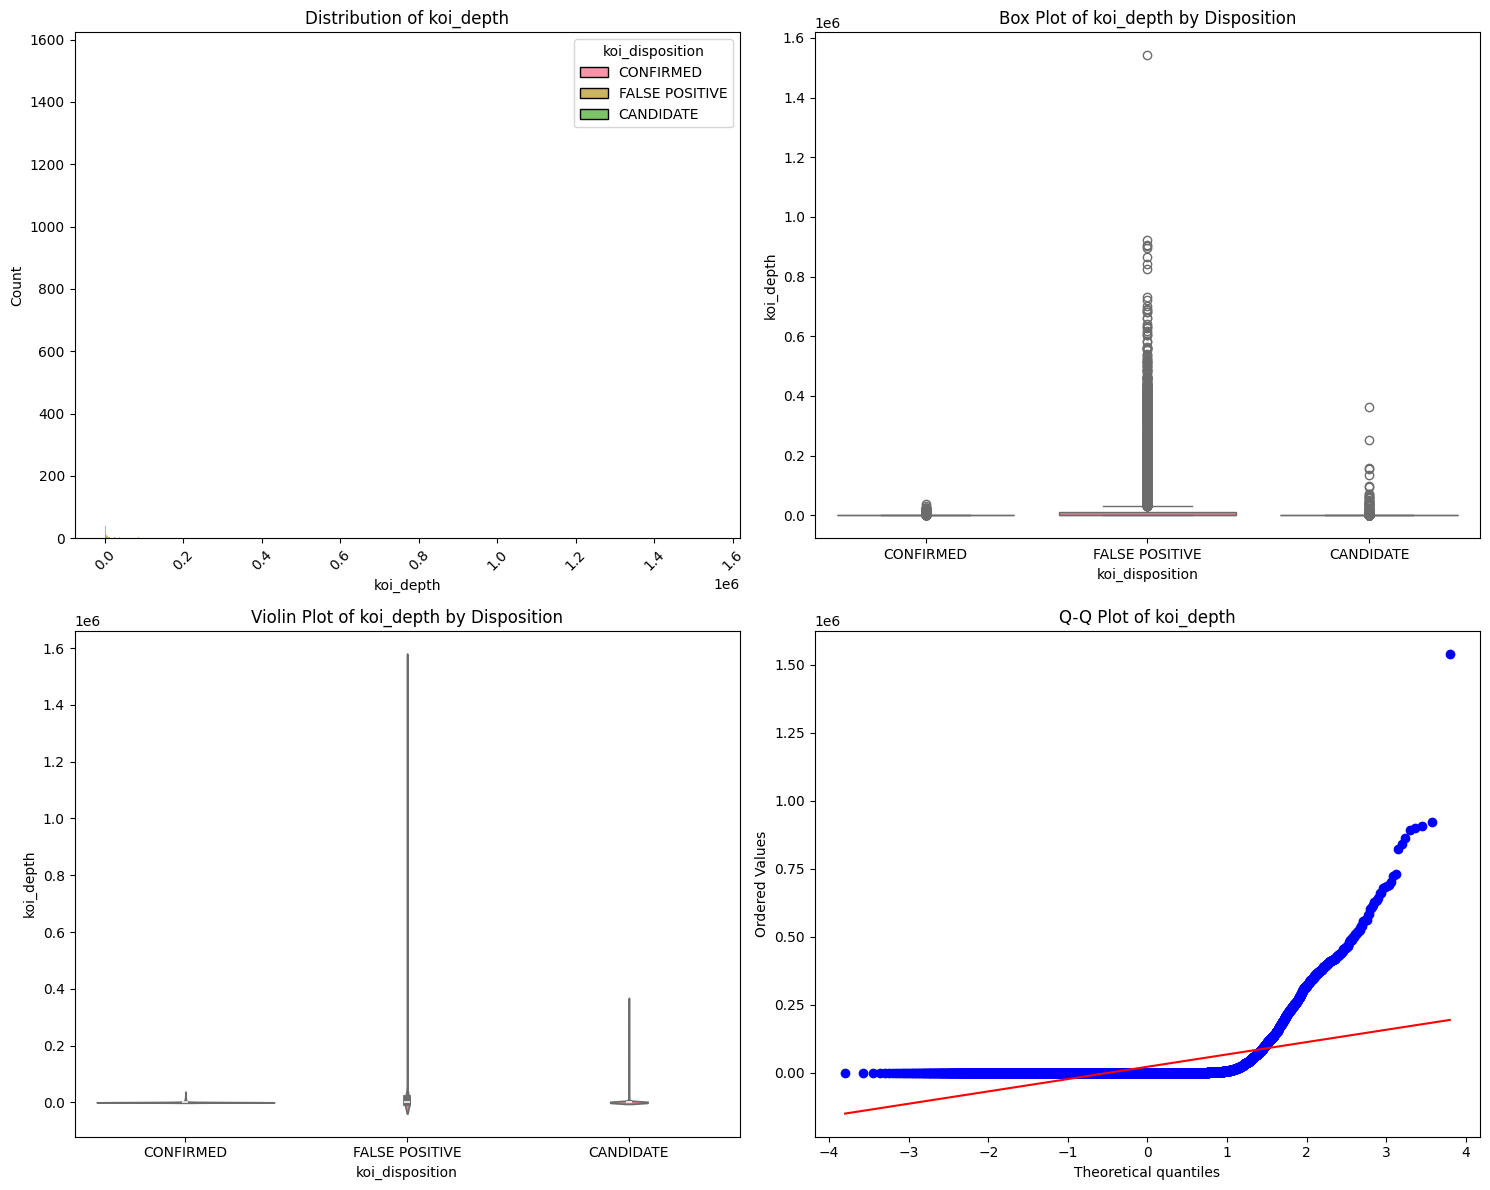


Summary Statistics for koi_depth:
                  count          mean            std   min      25%     50%  \
koi_disposition                                                               
CANDIDATE        2248.0   1823.795018   12327.892722   0.0  123.825  268.95   
CONFIRMED        2293.0   1141.132185    2685.664290  12.2  220.700  460.20   
FALSE POSITIVE   5023.0  42273.628031  107551.122757   0.8  172.800  467.90   

                     75%        max  
koi_disposition                      
CANDIDATE          578.1   363130.0  
CONFIRMED          895.5    36912.0  
FALSE POSITIVE   12259.5  1541400.0  


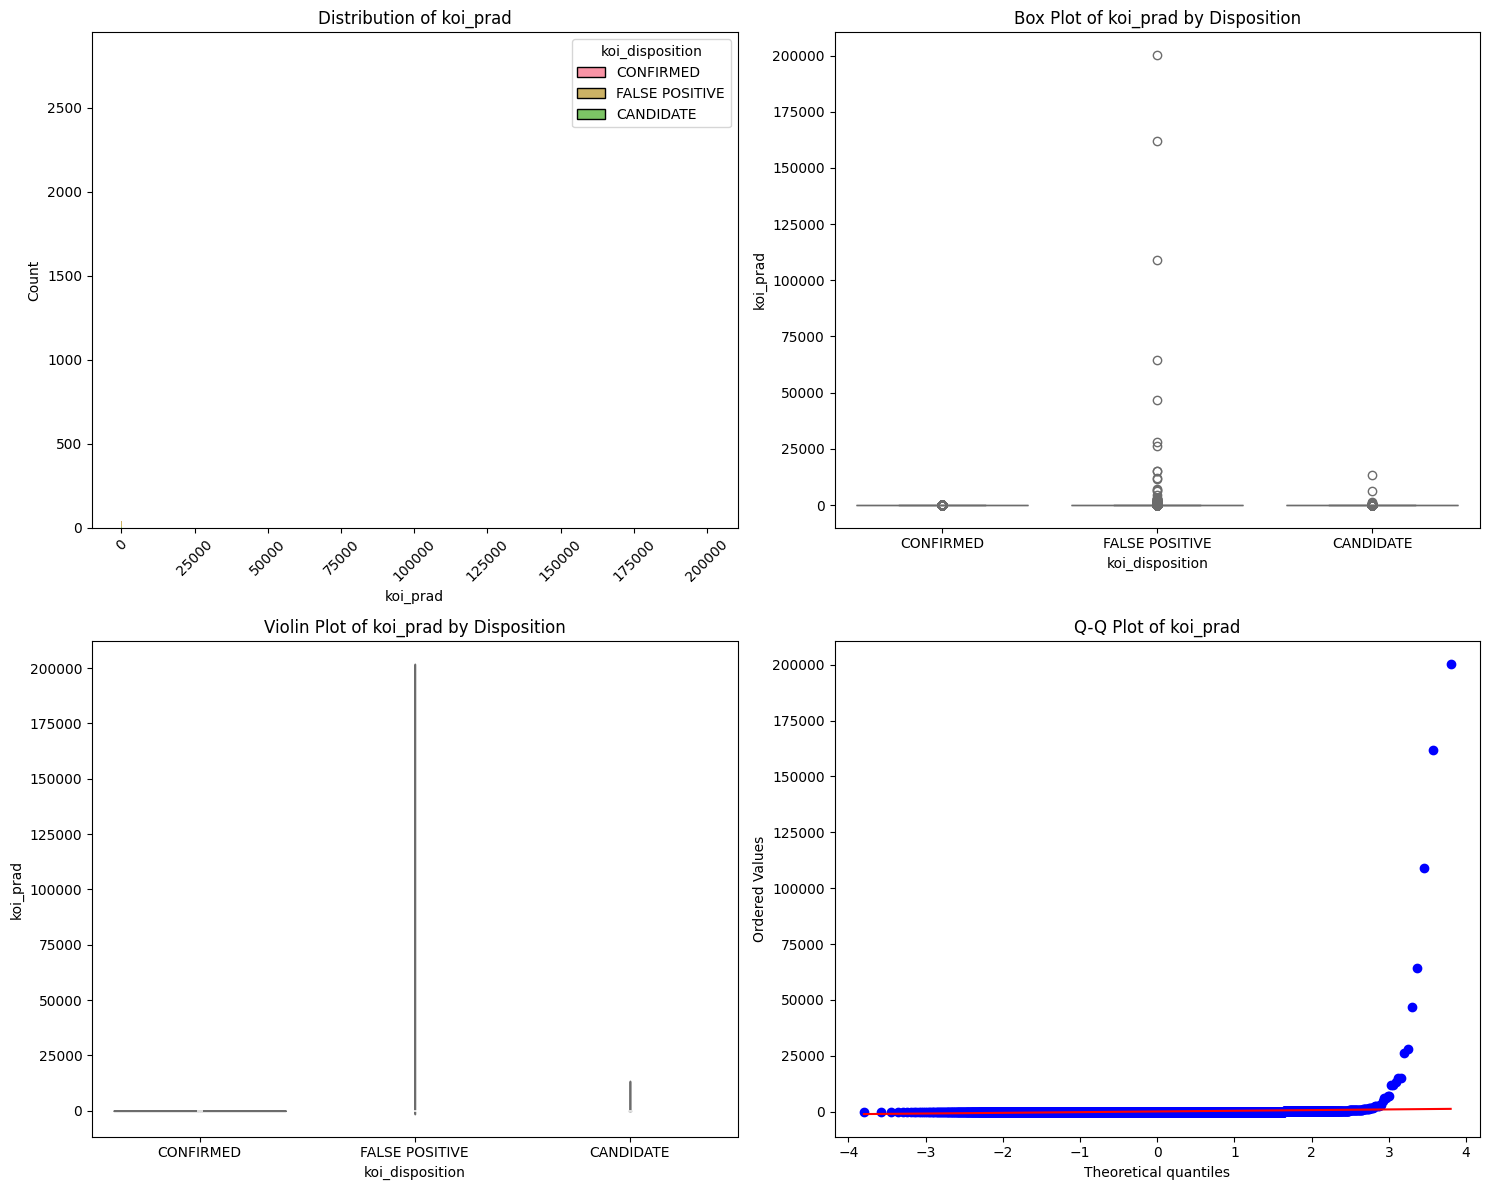


Summary Statistics for koi_prad:
                  count        mean          std   min   25%   50%    75%  \
koi_disposition                                                             
CANDIDATE        2248.0   15.551966   312.470653  0.22  1.19  1.83   2.94   
CONFIRMED        2293.0    2.871361     3.360411  0.27  1.53  2.17   2.94   
FALSE POSITIVE   5023.0  180.376263  4158.717366  0.08  1.59  4.41  39.36   

                       max  
koi_disposition             
CANDIDATE         13333.50  
CONFIRMED            77.76  
FALSE POSITIVE   200346.00  


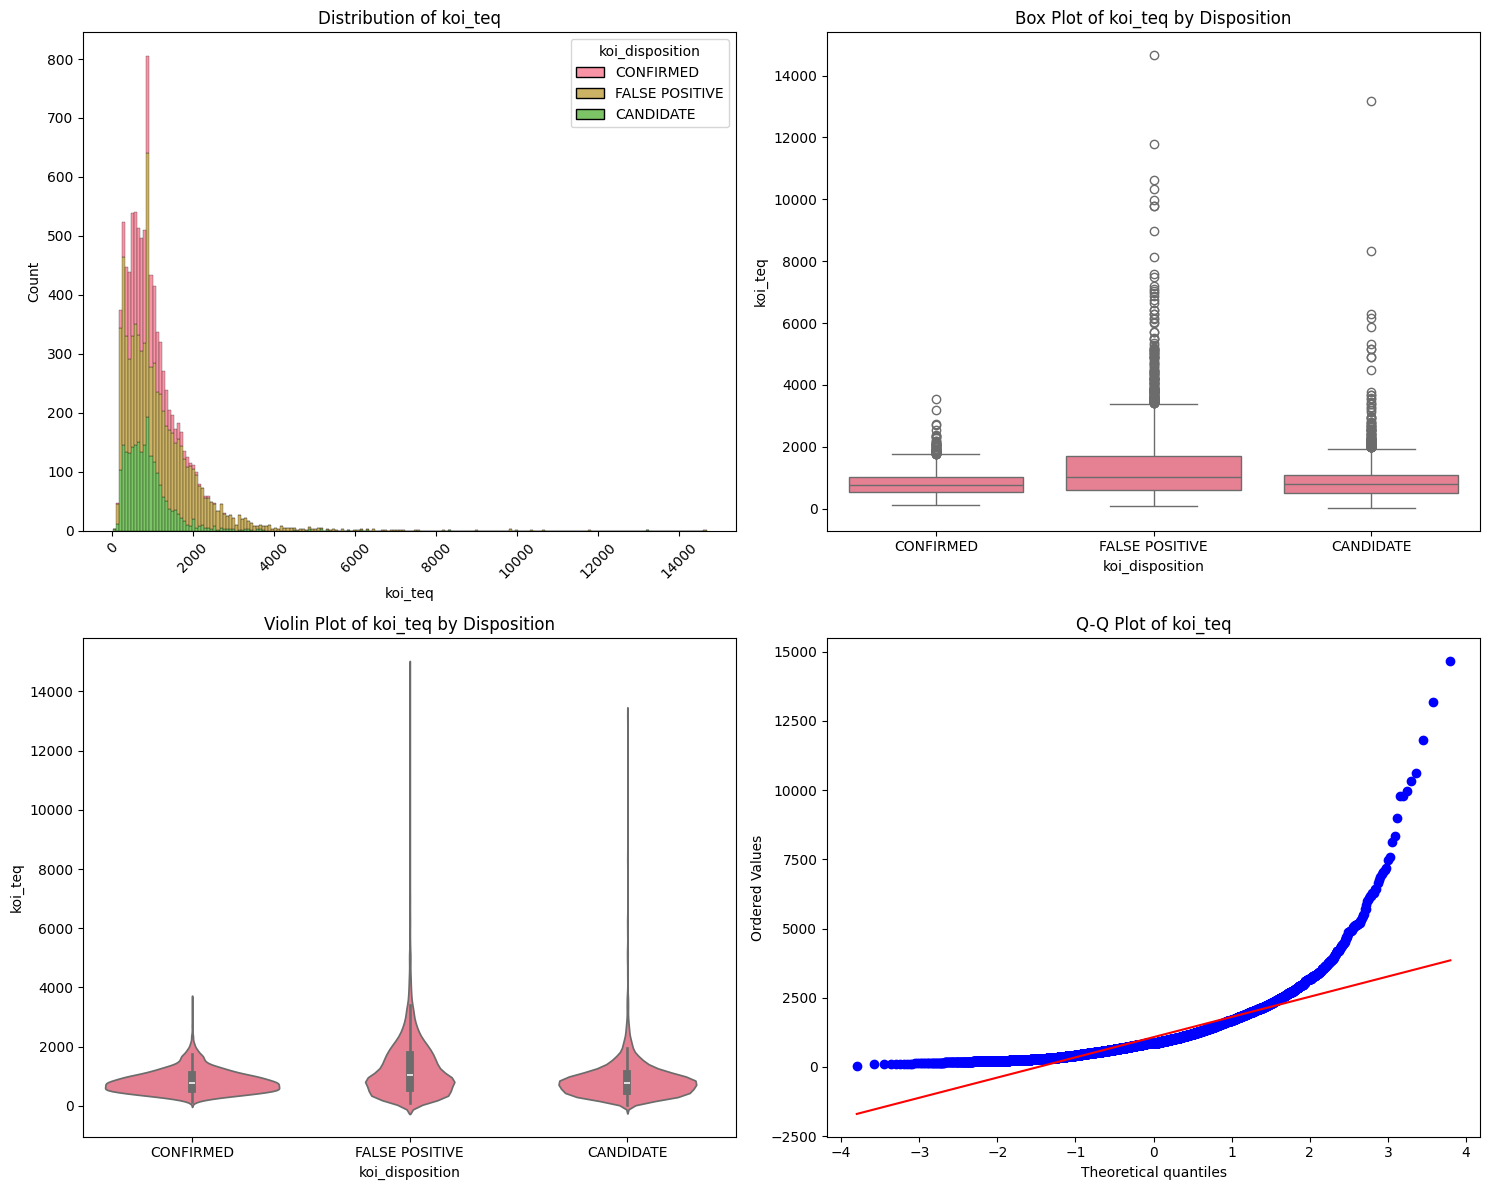


Summary Statistics for koi_teq:
                  count         mean          std    min    25%     50%  \
koi_disposition                                                           
CANDIDATE        2248.0   882.296263   656.222542   25.0  497.0   787.5   
CONFIRMED        2293.0   839.142608   386.657043  129.0  554.0   781.0   
FALSE POSITIVE   5023.0  1273.699582  1002.004028   92.0  594.0  1026.0   

                    75%      max  
koi_disposition                   
CANDIDATE        1082.0  13184.0  
CONFIRMED        1039.0   3559.0  
FALSE POSITIVE   1716.0  14667.0  


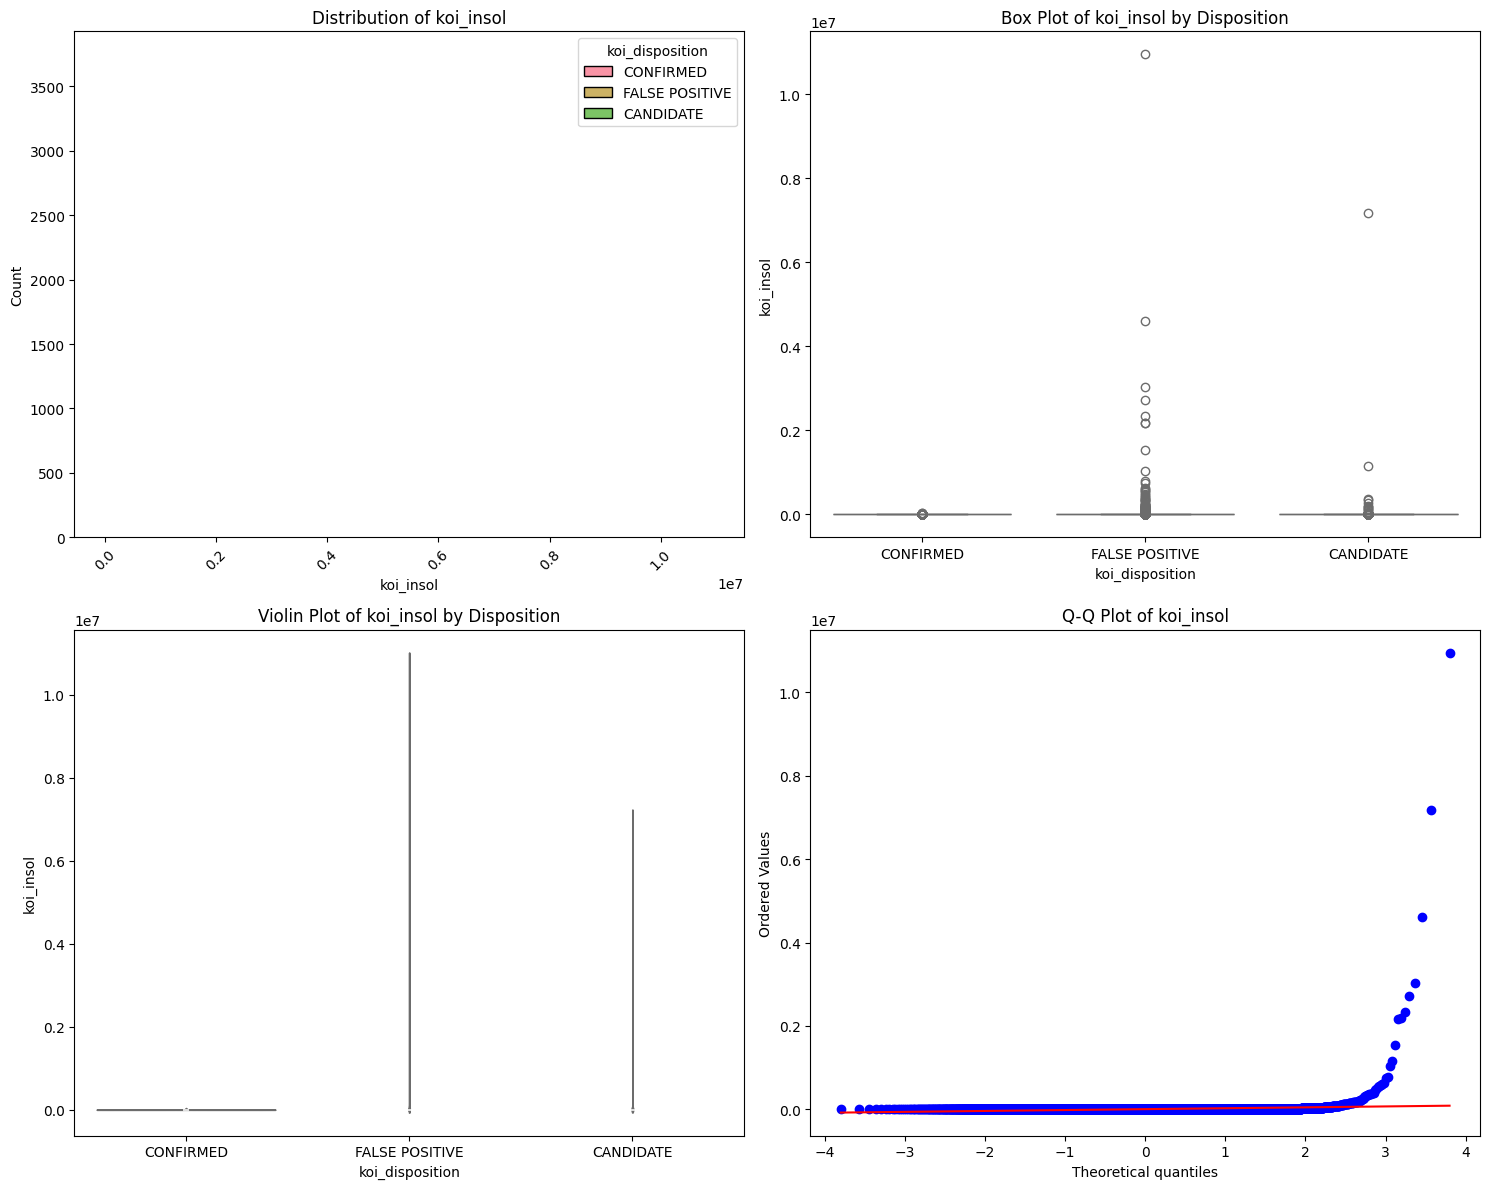


Summary Statistics for koi_insol:
                  count          mean            std   min      25%      50%  \
koi_disposition                                                                
CANDIDATE        2248.0   5213.179537  153724.396841  0.00  14.4525   90.745   
CONFIRMED        2293.0    350.574963    1223.416546  0.07  22.2100   88.040   
FALSE POSITIVE   5023.0  11769.103108  189816.197773  0.02  29.2650  273.840   

                      75%          max  
koi_disposition                         
CANDIDATE         323.855   7165673.12  
CONFIRMED         274.980     37958.27  
FALSE POSITIVE   2101.280  10947554.55  


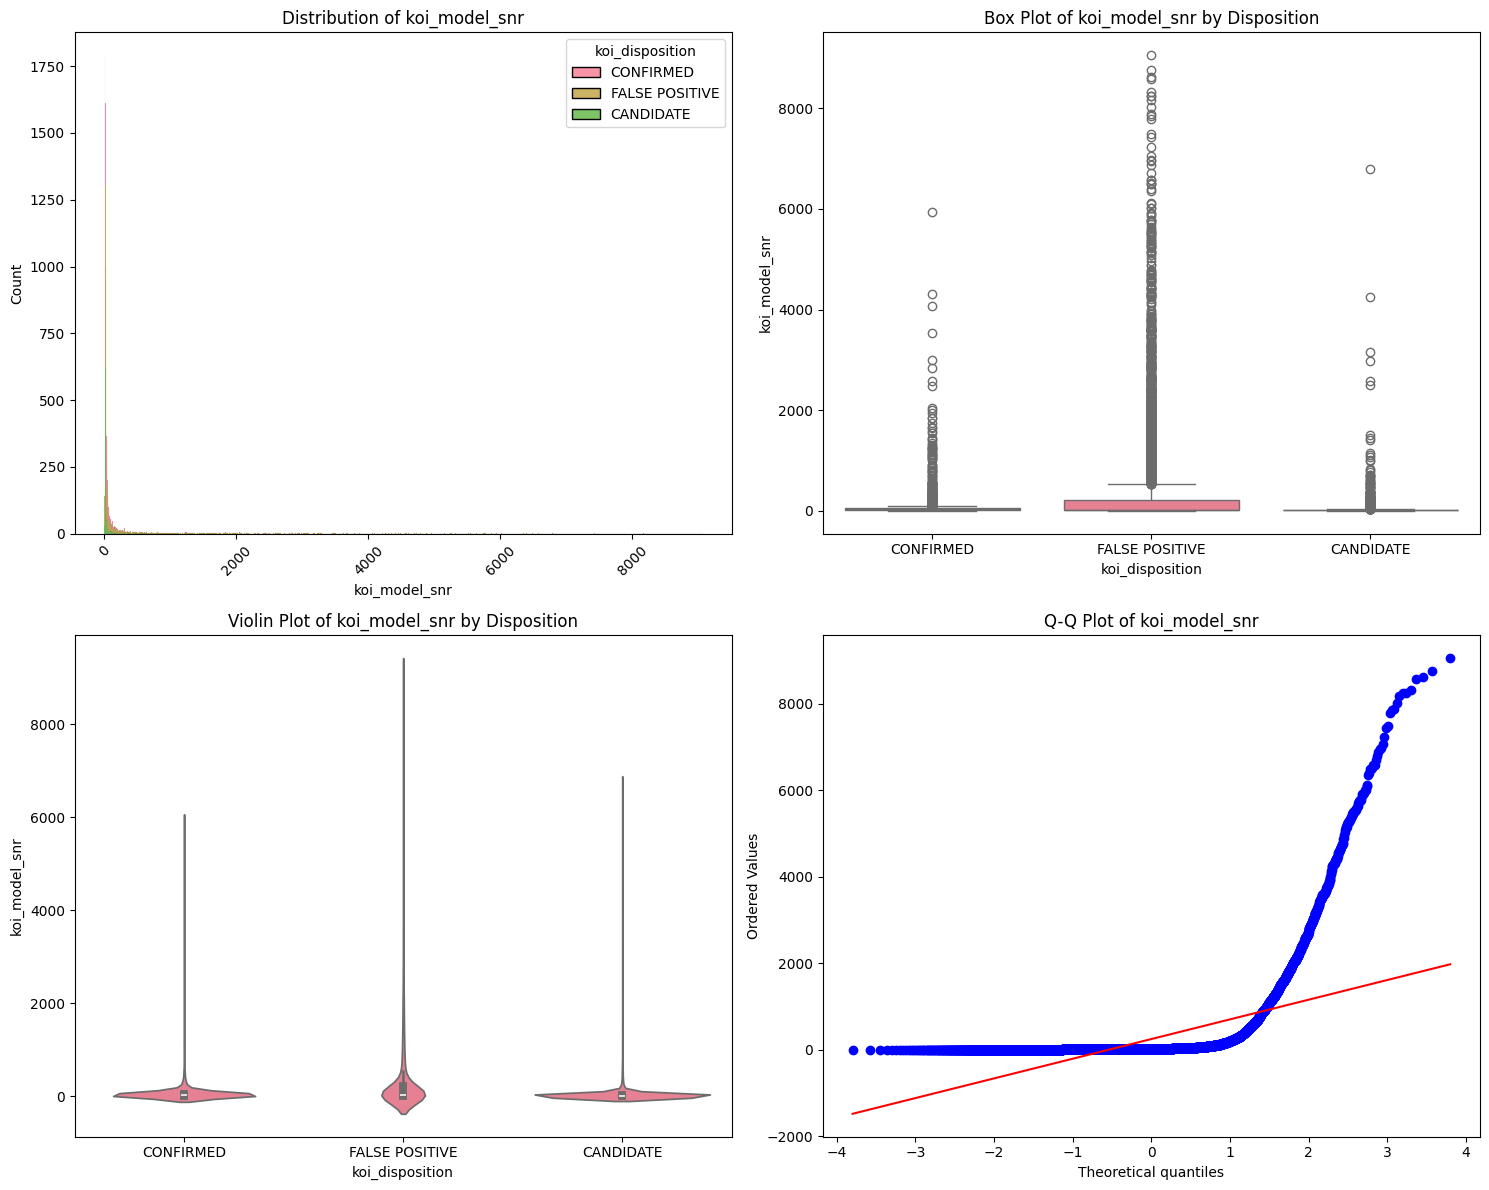


Summary Statistics for koi_model_snr:
                  count        mean          std  min   25%   50%     75%  \
koi_disposition                                                             
CANDIDATE        2248.0   44.962544   228.623339  0.0   9.7  12.6   22.20   
CONFIRMED        2293.0   87.894985   284.026896  6.0  20.2  31.6   54.50   
FALSE POSITIVE   5023.0  417.484352  1022.256544  0.0  12.4  25.1  222.55   

                    max  
koi_disposition          
CANDIDATE        6788.8  
CONFIRMED        5945.9  
FALSE POSITIVE   9054.7  


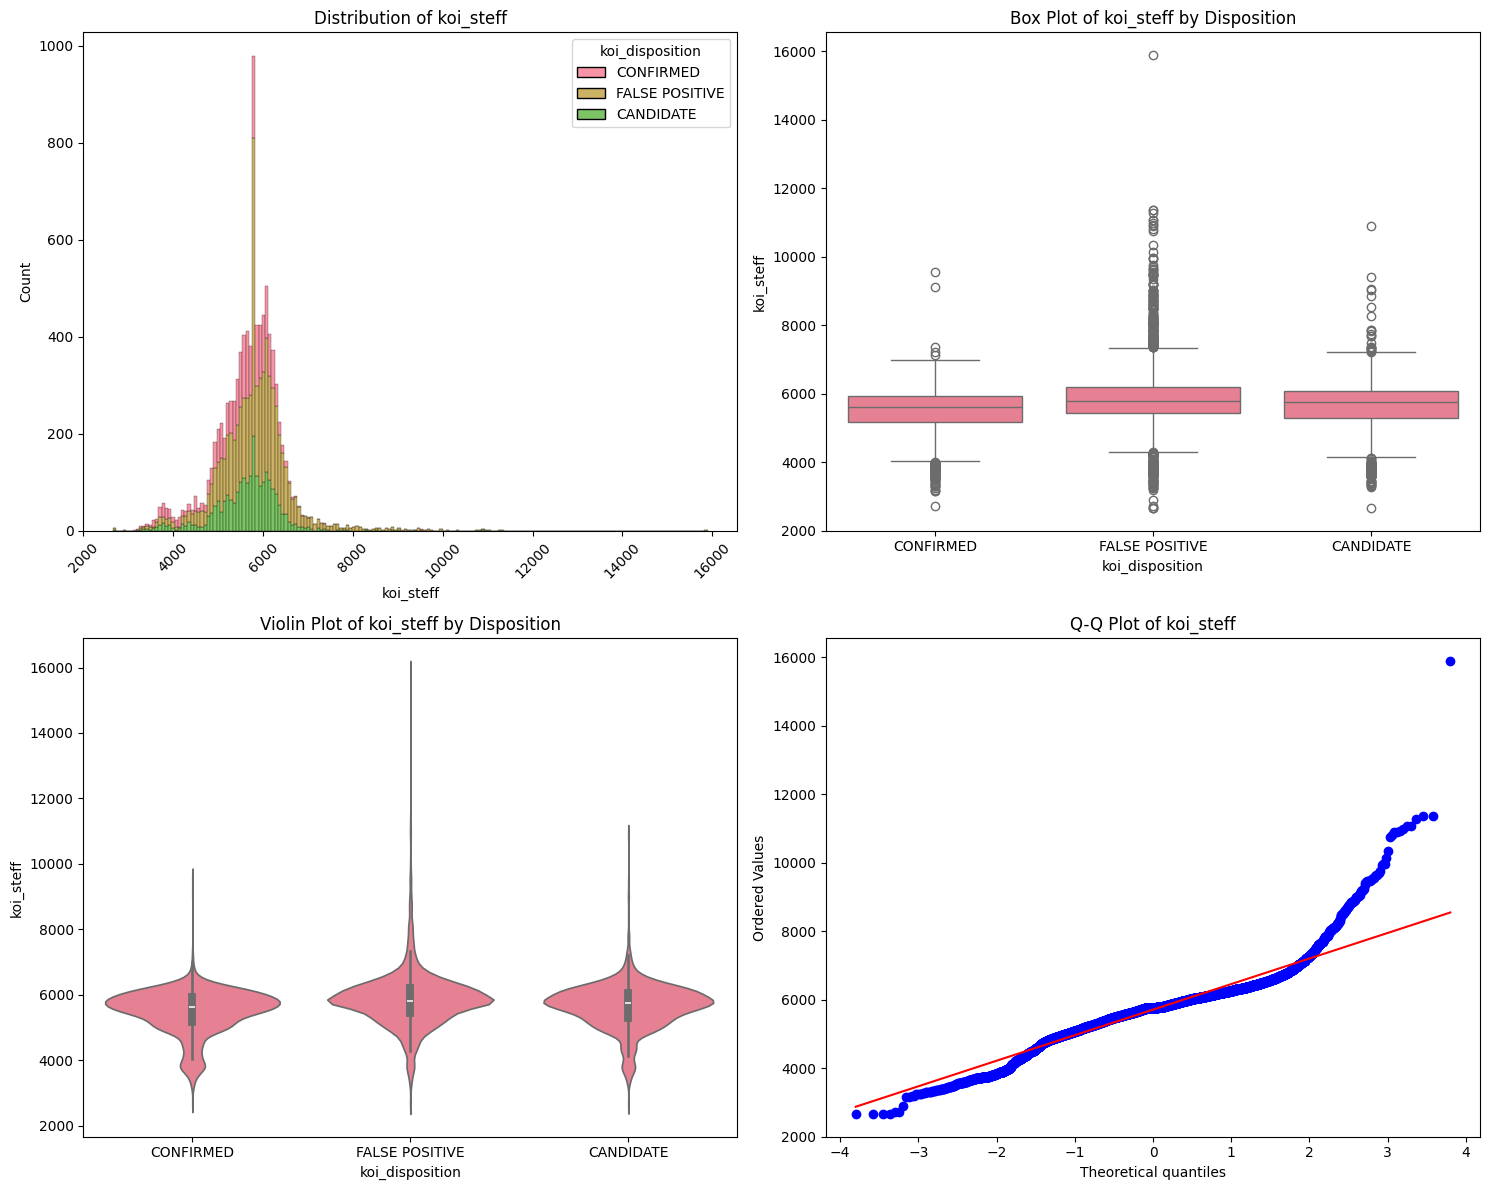


Summary Statistics for koi_steff:
                  count         mean         std     min      25%     50%  \
koi_disposition                                                             
CANDIDATE        2248.0  5643.332295  684.495873  2661.0  5290.75  5747.0   
CONFIRMED        2293.0  5478.100305  677.012262  2703.0  5172.00  5616.0   
FALSE POSITIVE   5023.0  5843.999005  836.766153  2661.0  5437.00  5798.0   

                    75%      max  
koi_disposition                   
CANDIDATE        6063.0  10894.0  
CONFIRMED        5929.0   9565.0  
FALSE POSITIVE   6202.5  15896.0  


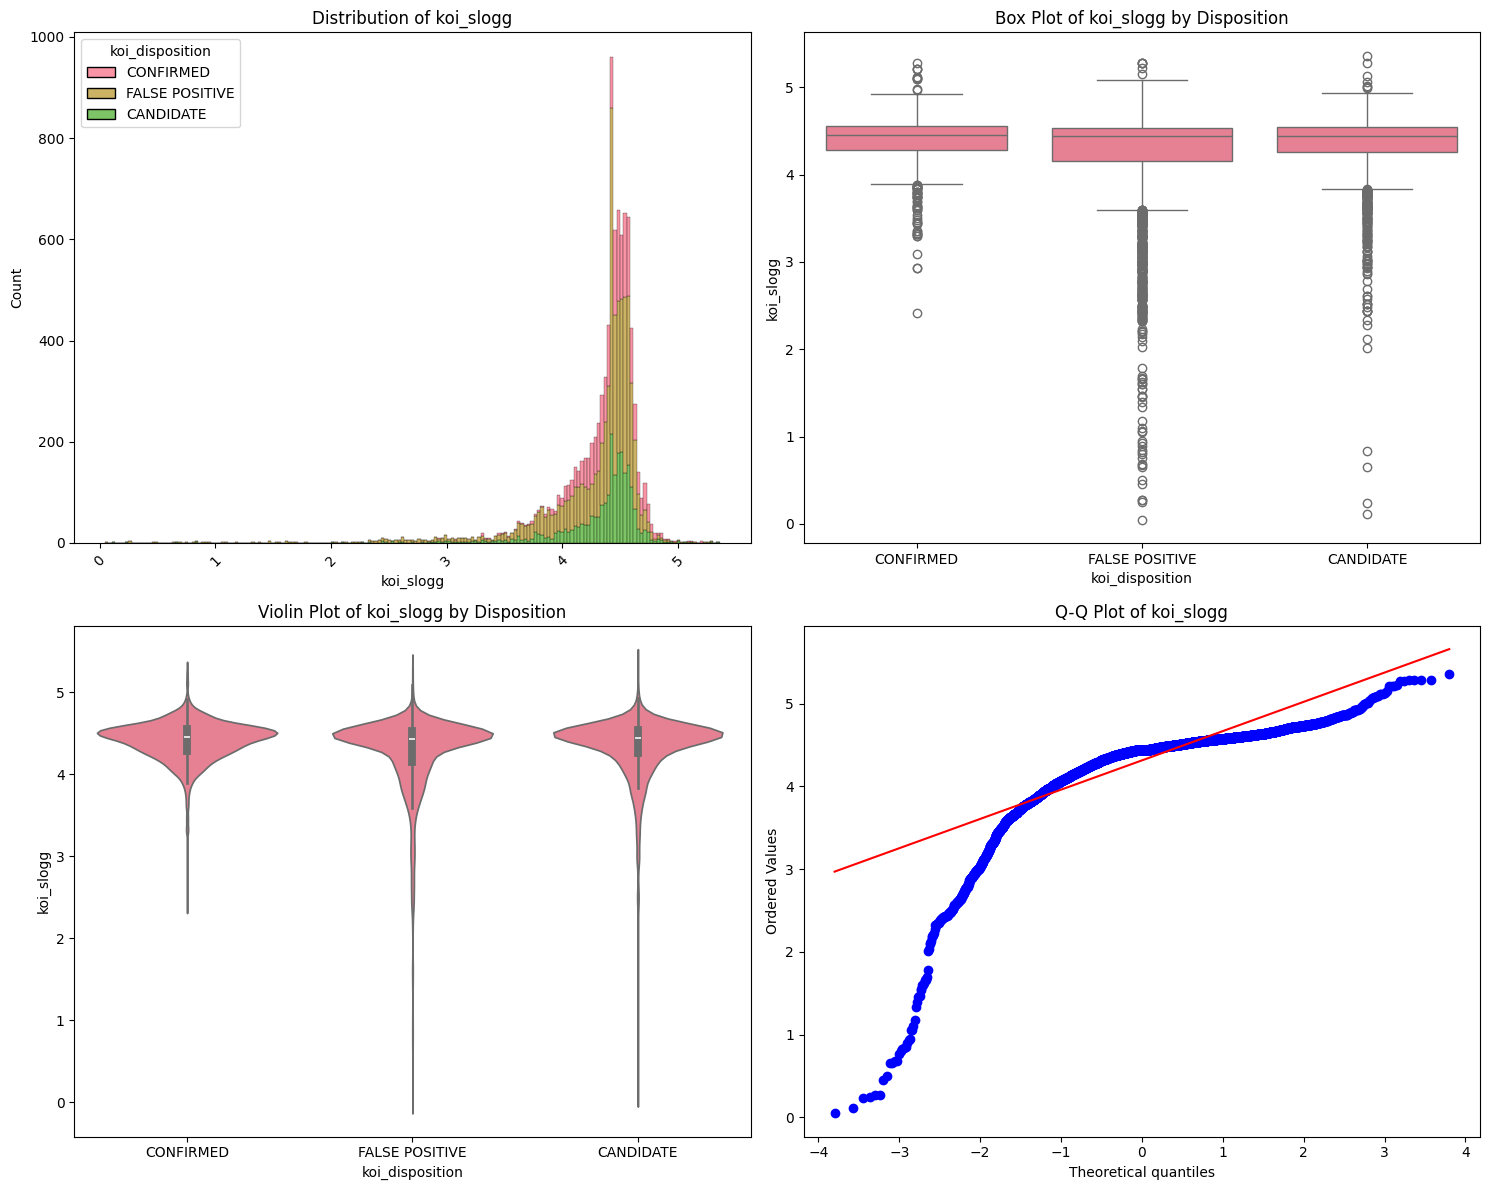


Summary Statistics for koi_slogg:
                  count      mean       std    min    25%    50%    75%    max
koi_disposition                                                               
CANDIDATE        2248.0  4.334466  0.385740  0.114  4.258  4.439  4.540  5.364
CONFIRMED        2293.0  4.410766  0.235283  2.410  4.287  4.455  4.557  5.274
FALSE POSITIVE   5023.0  4.262588  0.495011  0.047  4.156  4.438  4.530  5.283


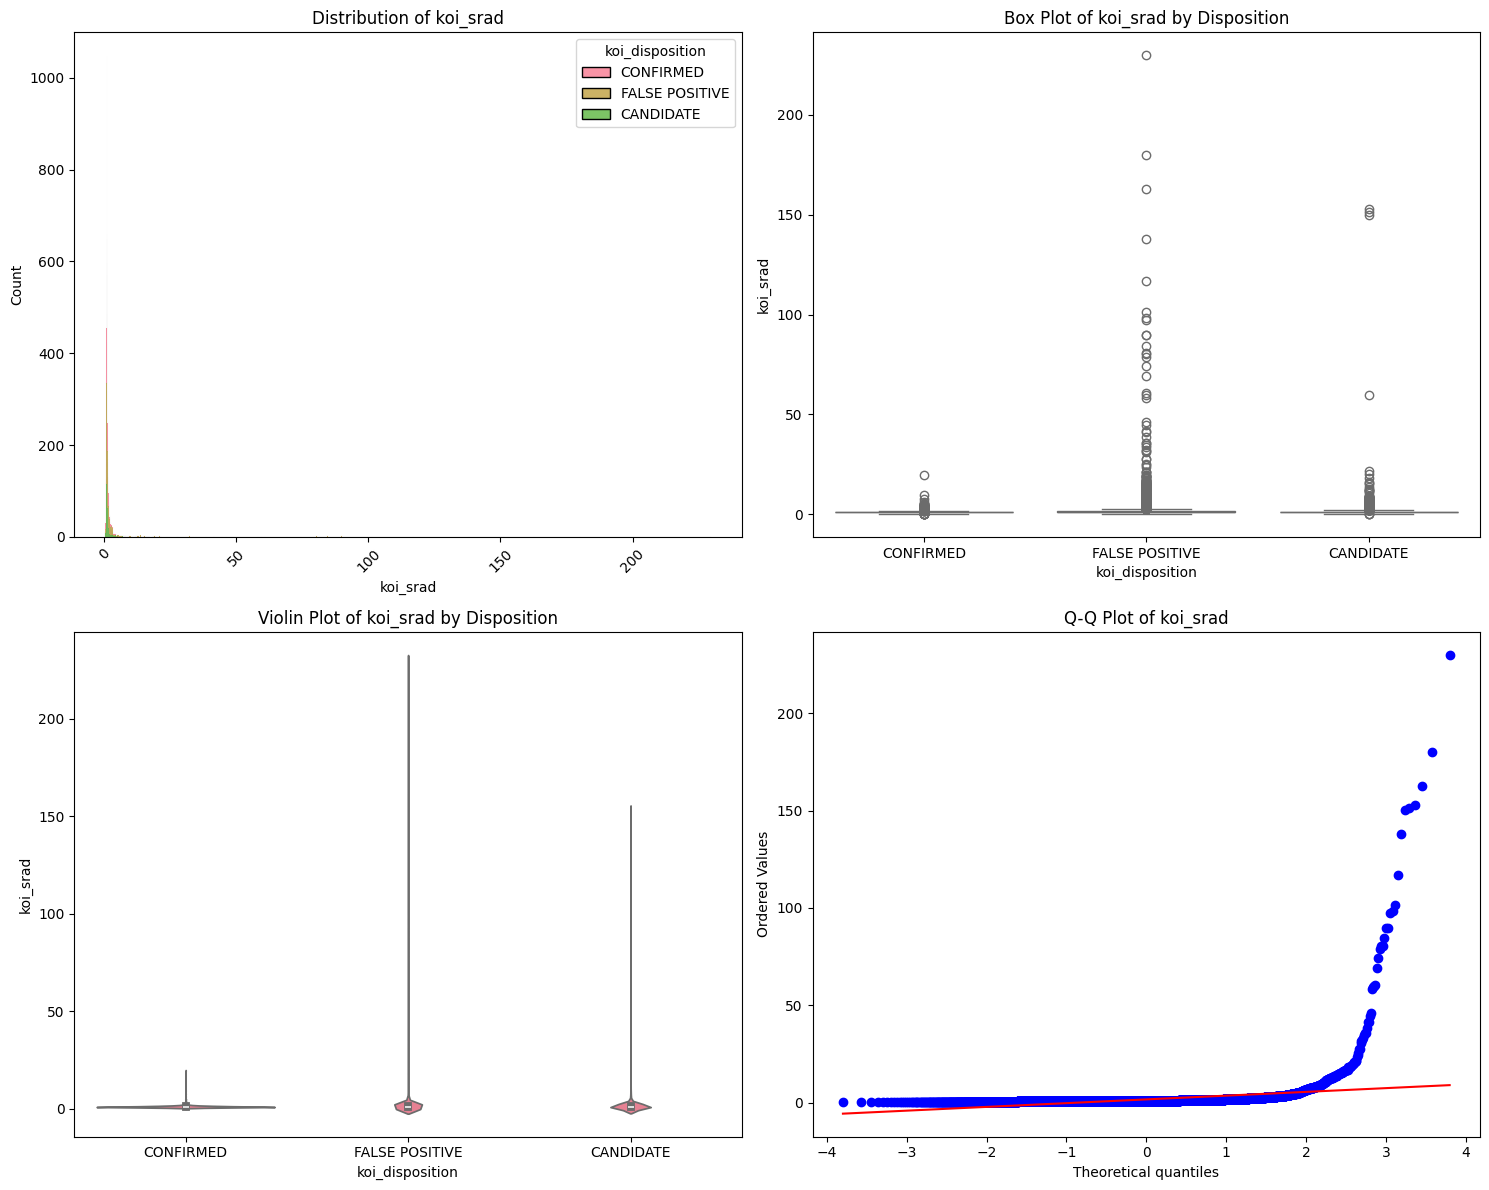


Summary Statistics for koi_srad:
                  count      mean       std    min    25%    50%      75%  \
koi_disposition                                                             
CANDIDATE        2248.0  1.550440  5.792953  0.109  0.830  1.000  1.26125   
CONFIRMED        2293.0  1.066519  0.642828  0.118  0.808  0.968  1.20000   
FALSE POSITIVE   5023.0  2.058124  7.299806  0.116  0.854  1.000  1.48500   

                     max  
koi_disposition           
CANDIDATE        152.969  
CONFIRMED         19.530  
FALSE POSITIVE   229.908  


In [ ]:
def analyze_numerical_feature(data, feature):
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Distribution plot
    sns.histplot(data=data, x=feature, hue='koi_disposition', multiple="stack", ax=axes[0,0])
    axes[0,0].set_title(f'Distribution of {feature}')
    axes[0,0].tick_params(axis='x', rotation=45)

    # Box plot
    sns.boxplot(data=data, x='koi_disposition', y=feature, ax=axes[0,1])
    axes[0,1].set_title(f'Box Plot of {feature} by Disposition')

    # Violin plot
    sns.violinplot(data=data, x='koi_disposition', y=feature, ax=axes[1,0])
    axes[1,0].set_title(f'Violin Plot of {feature} by Disposition')

    # Q-Q plot
    stats.probplot(data[feature].dropna(), dist="norm", plot=axes[1,1])
    axes[1,1].set_title(f'Q-Q Plot of {feature}')

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print(f"\nSummary Statistics for {feature}:")
    print(data.groupby('koi_disposition')[feature].describe())

# Analyze each numerical feature
for feature in numerical_features:
    analyze_numerical_feature(data, feature)

The exploration of numerical feature distributions provides insights into their variability and potential preprocessing needs. Features like koi_period (orbital period) exhibit a highly skewed distribution with a few extreme values, suggesting the presence of outliers or rare phenomena such as unusually long orbital periods. Similarly, features like koi_prad (planet radius) and koi_teq (equilibrium temperature) show diverse ranges and patterns that warrant normalization or transformation for effective modeling. <br> </n>
These findings emphasize the importance of data preprocessing before applying machine learning techniques. Skewed features may require transformations like logarithmic scaling to reduce their impact on model performance. Additionally, outlier detection and treatment are necessary to ensure that these extreme values do not disproportionately influence results. Understanding these distributions also aids in feature selection by identifying variables with meaningful variability that could contribute to distinguishing between confirmed exoplanets and false positives.

**What is the distribution of koi_score across dispositions?**

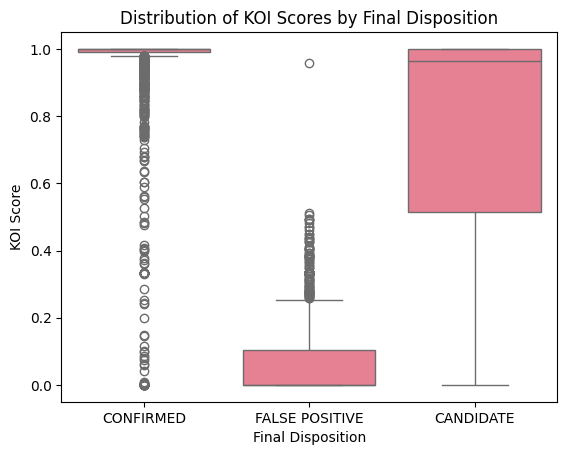

In [ ]:
sns.boxplot(data=data, x='koi_disposition', y='koi_score')
plt.title('Distribution of KOI Scores by Final Disposition')
plt.xlabel('Final Disposition')
plt.ylabel('KOI Score')
plt.show()

The box plot visualizes the distribution of KOI scores (ranging from 0 to 1) across three categories: Confirmed, False Positive, and Candidate planets. Each category is represented by a box showing the quartile distribution, with whiskers extending to show the full range, and individual points marking outliers. The Confirmed category shows a dense cluster of scores near 1.0, while False Positives display a broader distribution below 0.5.

**Inferences - **

The distribution patterns strongly suggest that KOI scores are reliable indicators of planet confirmation likelihood. Higher scores (close to 1.0) strongly correlate with confirmed planets, indicating the scoring system's effectiveness. The presence of outliers in both Confirmed and False Positive categories suggests that while the score is a good predictor, it shouldn't be the sole criterion for classification. The wide range in the Candidate category indicates uncertainty in classification

### Feature Correlations

Understanding feature correlations helps us:
- Identify potential multicollinearity
- Discover feature relationships
- Guide feature selection

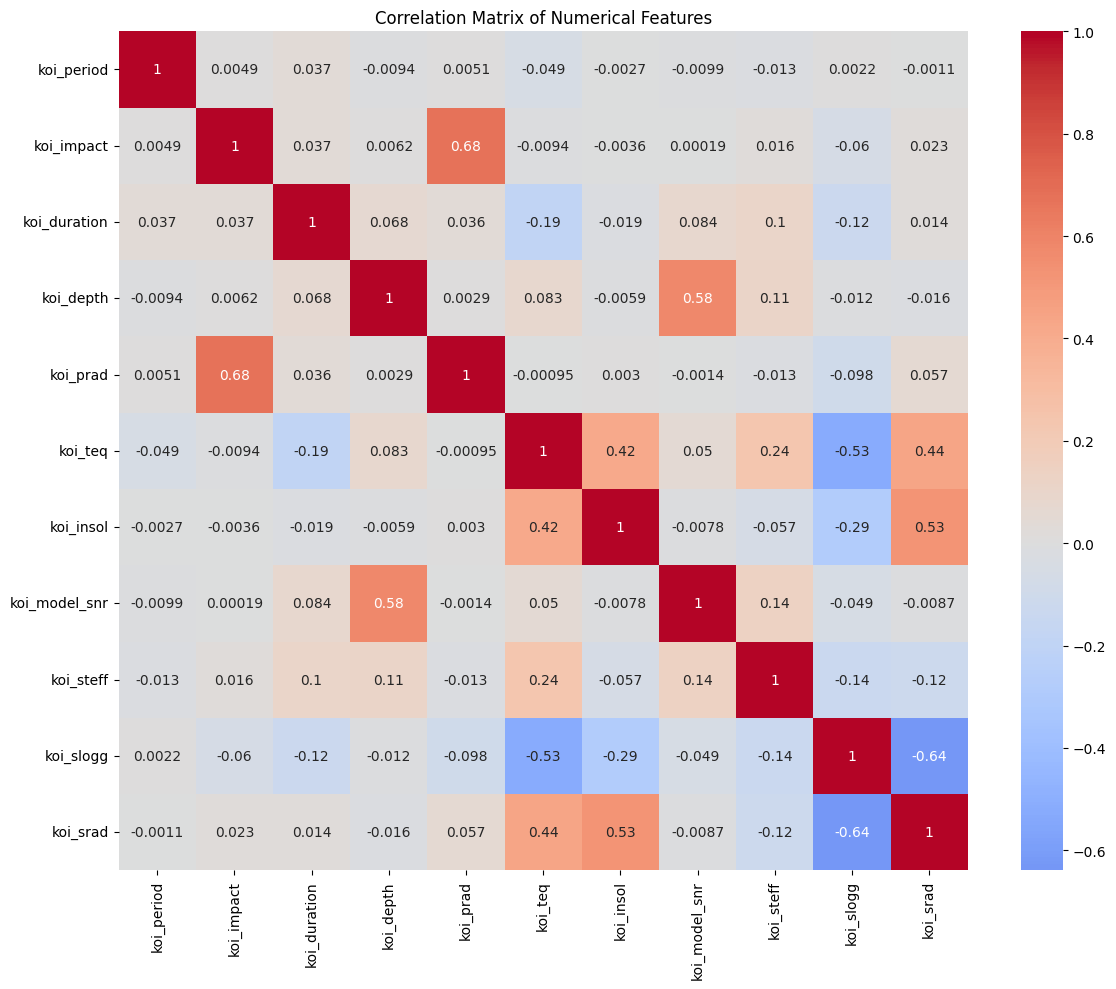

In [ ]:
# Create correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

#### Insights from the correlation matrix

Strong Correlations (|r| > 0.5):
1. koi_impact and koi_prad (0.68): Strong positive correlation between impact parameter and planetary radius
2. koi_depth and koi_model_snr (0.58): Transit depth strongly correlates with signal-to-noise ratio
3. koi_slogg and koi_srad (-0.64): Strong negative correlation between stellar surface gravity and stellar radius
4. koi_slogg and koi_teq (-0.53): Inverse relationship between surface gravity and equilibrium temperature
5. koi_srad and koi_insol (0.53): Stellar radius positively correlates with insolation flux

Moderate Correlations (0.3 < |r| < 0.5):
1. koi_teq and koi_insol (0.42): Positive correlation between equilibrium temperature and insolation
2. koi_srad and koi_teq (0.44): Larger stars tend to have higher equilibrium temperatures
3. koi_slogg and koi_insol (-0.29): Weak negative correlation between surface gravity and insolation

Key Insights:
1. Feature Independence:
   - Most features show low correlation with each other
   - koi_period is surprisingly independent of other features (all correlations < 0.05)
   - This independence suggests most features provide unique information for classification

2. Physical Relationships:
   - The correlations reflect known physical relationships in stellar and planetary systems
   - Stellar parameters (srad, slogg, steff) show expected interconnections
   - Transit parameters (depth, SNR) show logical relationships

3. Implications for Modeling:
   - Limited multicollinearity suggests most features can be used together in models
   - Might consider combining highly correlated features (e.g., impact-prad, depth-SNR)
   - Could create interaction terms for physically related parameters

4. Feature Selection Considerations:
   - Most features provide independent information and should be retained
   - Could consider dimensionality reduction for highly correlated groups
   - The independence of period suggests it's an important standalone feature

5. Potential Feature Engineering:
   - Could create composite features from strongly correlated pairs
   - Might develop normalized ratios between related parameters
   - Consider polynomial features for parameters with physical relationships

This correlation analysis suggests a good feature set for classification with minimal redundancy and clear physical relationships between parameters.

**Are high-scoring CANDIDATE planets likely to become CONFIRMED?**

In [ ]:
data['score_bins'] = pd.cut(data['koi_score'], bins=[0, 0.5, 0.7, 0.9, 1.0], labels=['Low', 'Moderate', 'High', 'Very High'])

# Count occurrences
confirmation_rates = data[data['koi_disposition'] == 'CONFIRMED'].groupby('score_bins').size() / data.groupby('score_bins').size()

# Plot
confirmation_rates.plot(kind='bar', color='skyblue')
plt.title('Confirmation Rate by KOI Score Bin')
plt.xlabel('KOI Score Bin')
plt.ylabel('Confirmation Rate')
plt.show()

The bar chart displays confirmation rates across four KOI score categories: Low, Moderate, High, and Very High. The y-axis shows the confirmation rate from 0 to 0.6 (or 0% to 60%), while the x-axis represents the different score bins. The bars show a clear ascending pattern from left to right, with light blue coloring making the trend easily visible.

**Inferences**-

The strong positive correlation between KOI score and confirmation rate validates the scoring system's effectiveness. The dramatic increase from a 2% confirmation rate in the Low category to 60% in the Very High category demonstrates the score's predictive power. This pattern suggests that the KOI scoring system successfully captures the key indicators of genuine planetary signatures. The stepped increase across categories also provides a practical tool for prioritizing follow-up observations, with higher-scored candidates warranting more immediate attention.

**How many CANDIDATE planets progress to CONFIRMED by score level?**

In [ ]:
pivot = pd.crosstab(data['score_bins'], data['koi_disposition'])

pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Final Dispositions by KOI Score Bin')
plt.xlabel('KOI Score Bin')
plt.ylabel('Count')
plt.legend(title='Final Disposition')
plt.show()

The stacked bar chart displays the distribution of planetary classifications (Candidate, Confirmed, and False Positive) across four KOI score categories: Low, Moderate, High, and Very High. The y-axis represents the count of objects, reaching up to 3500, while the x-axis shows the KOI score bins. Each bar is segmented into three colors: blue for Candidates, grey for Confirmed planets, and red for False Positives.

In the Low score bin, there's a high proportion of False Positives (red) with some Candidates (blue), suggesting that low KOI scores are strong indicators of non-planetary signals.

The Very High score bin shows a dramatic shift, with a large number of Confirmed planets (grey) and Candidates (blue) but virtually no False Positives, indicating that high KOI scores are reliable predictors of genuine planetary detections.

The Moderate and High bins show a transition between these extremes, with gradually decreasing False Positives and increasing Confirmed planets as the score increases.

This pattern validates the KOI scoring system as an effective tool for preliminary planet identification, with higher scores strongly correlating with successful planet confirmation.

**How do features of a specific star system (e.g., orbital period, stellar radius, and stellar effective temperature) compare relative to one another?**

In [ ]:
from math import pi

# Sample data for a single star system
radial_data = data[data['kepid'] == data['kepid'].iloc[0]]

# Normalize values for visualization
radial_data['koi_period_normalized'] = radial_data['koi_period'] / radial_data['koi_period'].max()

# Plot
categories = ['koi_period_normalized', 'koi_srad', 'koi_steff']
values = radial_data[categories].mean().tolist()
values += values[:1]  # Close the circle

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories)

ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, color='blue', alpha=0.3)
plt.title('Radial Visualization of Features')
plt.show()


The radial visualization displays three key features: koi_srad, koi_steff, and koi_period_normalized. The visualization uses concentric circles marked from 1000 to 5000 units to show the scale of measurements. A blue line connects these parameters, creating a triangular shape in the circular plot.

**Inferences**-

The radial layout suggests an interconnected relationship between stellar radius, effective temperature, and orbital period. The positioning and length of the blue line indicates potential correlations between these parameters
The triangular shape formed by the connecting lines might indicate interdependencies between all three parameters, suggesting that these stellar and orbital characteristics aren't independent but rather form a connected system of relationships in exoplanet detection and characterization.

### Feature Importance Analysis

We'll use mutual information to measure the importance of each feature for classification.

In [ ]:
def calculate_feature_importance(data, numerical_features):
    # Prepare data
    X = data[numerical_features]
    y = data['is_confirmed']

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=numerical_features)

    # Calculate mutual information scores
    mi_scores = mutual_info_classif(X_scaled, y)

    # Create and sort feature importance DataFrame
    feature_importance = pd.DataFrame({
        'Feature': numerical_features,
        'Importance': mi_scores
    }).sort_values('Importance', ascending=False)

    # Visualize
    plt.figure(figsize=(12, 6))
    sns.barplot(data=feature_importance, x='Importance', y='Feature')
    plt.title('Feature Importance (Mutual Information)')
    plt.tight_layout()
    plt.show()

    return feature_importance

feature_importance = calculate_feature_importance(data, numerical_features)

#### Insights from Feature Importance Analysis


Top Important Features:
1. koi_model_snr (0.12): Signal-to-noise ratio is the most important feature
   - Makes sense as it directly relates to detection confidence
   - Higher SNR typically means more reliable measurements

2. koi_prad (0.11): Planetary radius is the second most important
   - Strong discriminator as false positives often have unrealistic radii
   - Aligns with earlier distribution analysis showing clear separation between confirmed and false positive cases

3. koi_steff (0.09): Stellar effective temperature
   - Important for understanding host star characteristics
   - May help identify more likely planetary system configurations

4. koi_srad (0.08): Stellar radius
   - Crucial for validating transit measurements
   - Helps determine if transit depth is physically plausible

5. koi_period (0.07): Orbital period
   - Important despite low correlations with other features
   - Helps identify realistic planetary orbits

Middle-Range Features:
6. koi_depth (~0.065): Transit depth
7. koi_insol (~0.06): Insolation flux
8. koi_teq (~0.06): Equilibrium temperature
9. koi_slogg (~0.06): Stellar surface gravity
10. koi_impact (~0.055): Impact parameter

Least Important Feature:
- koi_duration (0.02): Transit duration shows significantly lower importance
   - Might be less reliable for classification
   - Could be more useful when combined with other features

Key Insights:
1. Detection Quality Metrics:
   - Signal quality (SNR) and physical measurements (radius) are most important
   - Suggests focusing on measurement reliability for classification

2. Stellar Parameters:
   - Host star characteristics (steff, srad) are more important than transit parameters
   - Indicates stellar context is crucial for validation

3. Feature Selection:
   - Could consider dropping or combining less important features
   - Might want to engineer new features from top performers

4. Model Development Implications:
   - Focus on features with higher importance scores
   - Consider weighted feature approaches in modeling
   - May want to create interaction terms with top features

5. Validation Strategy:
   - Use top features for initial screening
   - Combine with domain knowledge for final validation
   - Consider feature importance when handling missing values

This analysis suggests focusing on signal quality and basic physical parameters for classification, while using stellar parameters for validation context..

### Feature distribution Analysis by class

1. Analyzing feature distributions by class...


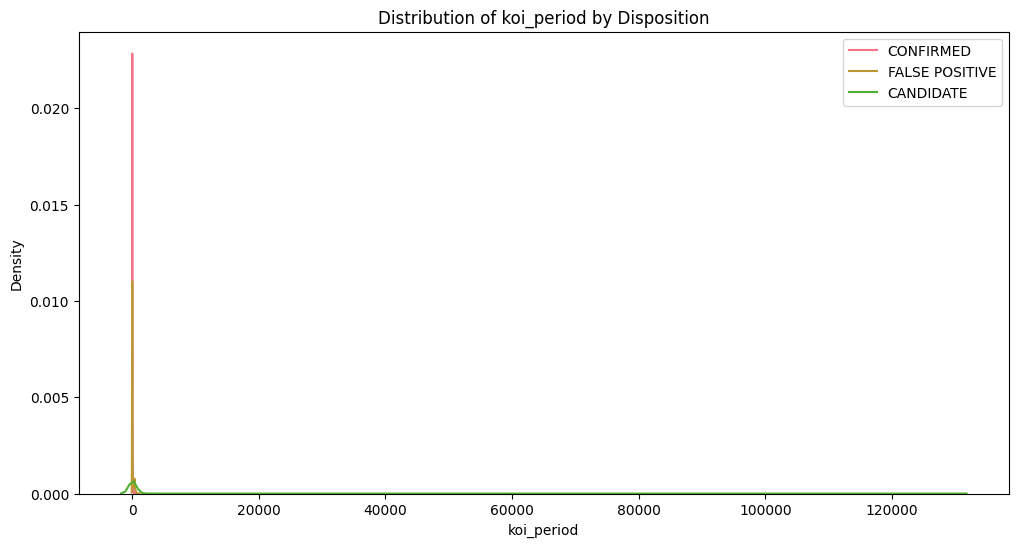


Statistics for koi_period:
                       mean          std       skew     kurtosis
koi_disposition                                                 
CANDIDATE        130.523850  2744.156397  47.210714  2230.195094
CONFIRMED         27.063211    54.018603   7.287052    89.833609
FALSE POSITIVE    73.312227   139.114025   2.194087     4.103125


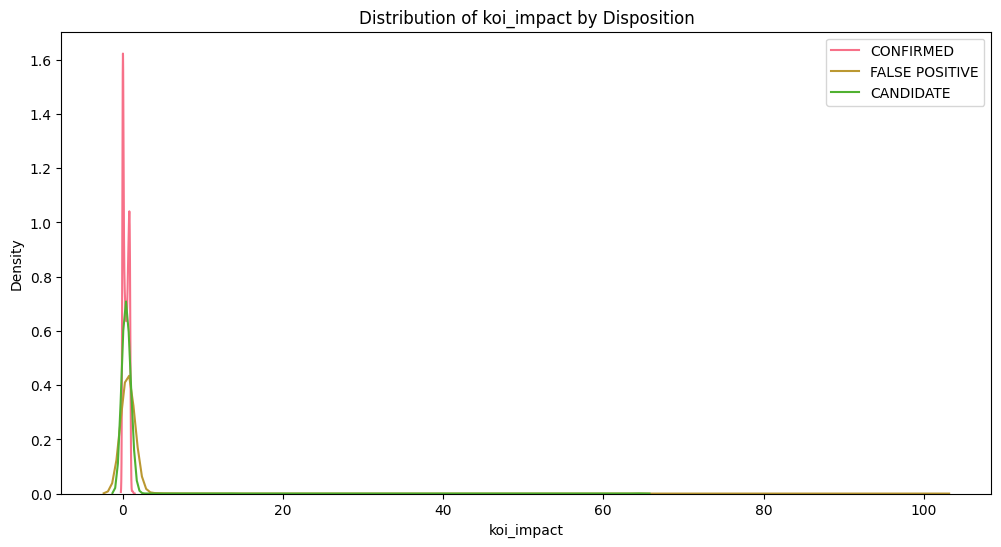


Statistics for koi_impact:
                     mean       std       skew    kurtosis
koi_disposition                                           
CANDIDATE        0.537088  1.961935  30.639821  987.114303
CONFIRMED        0.426815  0.332136   0.172517   -1.446456
FALSE POSITIVE   0.950144  4.320608  18.635514  372.554346


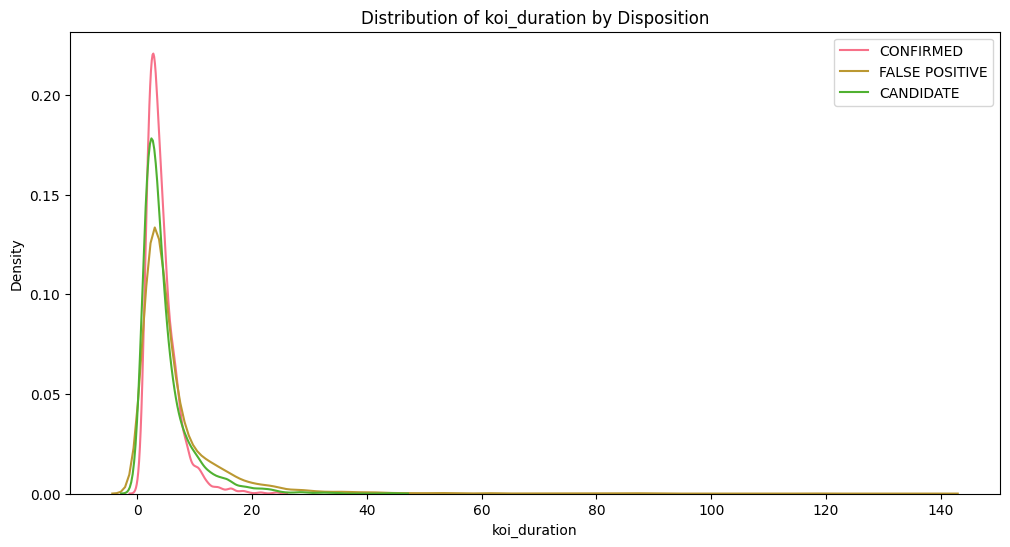


Statistics for koi_duration:
                     mean       std      skew   kurtosis
koi_disposition                                         
CANDIDATE        4.827392  4.413871  2.699244  10.540426
CONFIRMED        4.308624  2.721482  2.157983   7.523298
FALSE POSITIVE   6.576427  8.103835  5.229514  45.905650


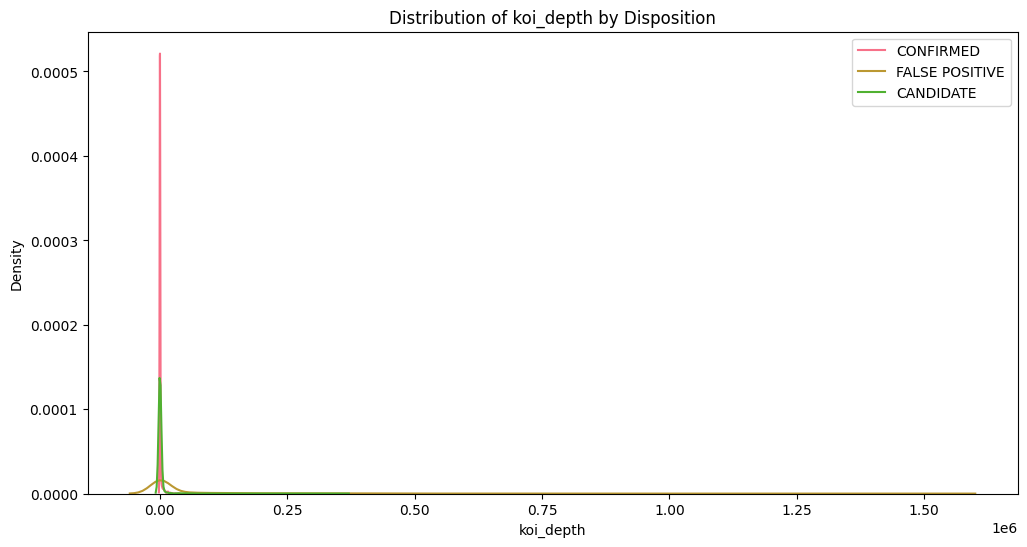


Statistics for koi_depth:
                         mean            std       skew    kurtosis
koi_disposition                                                    
CANDIDATE         1823.795018   12327.892722  18.386180  436.752315
CONFIRMED         1141.132185    2685.664290   5.983836   45.056874
FALSE POSITIVE   42273.628031  107551.122757   3.787865   20.187699


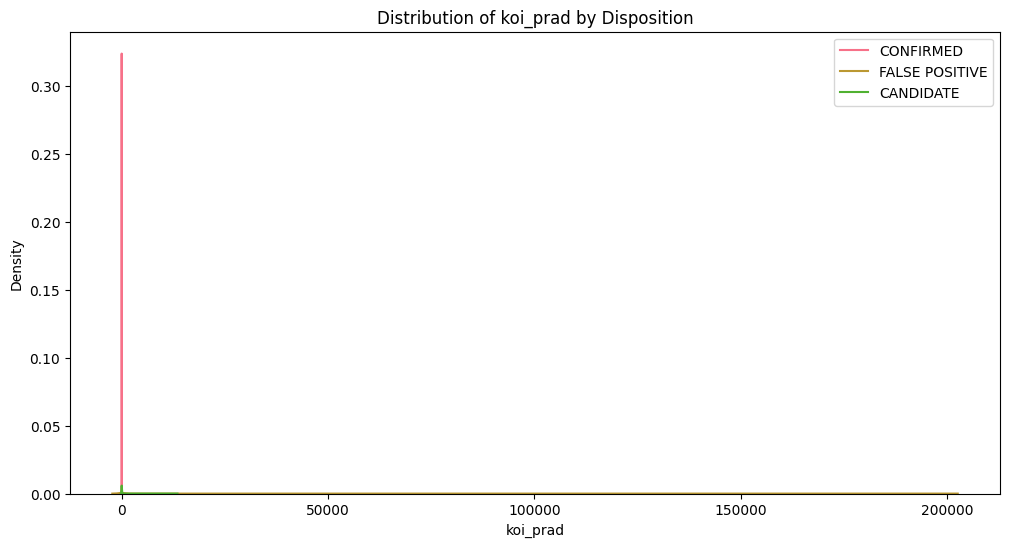


Statistics for koi_prad:
                       mean          std       skew     kurtosis
koi_disposition                                                 
CANDIDATE         15.551966   312.470653  37.911550  1532.296020
CONFIRMED          2.871361     3.360411   9.605372   159.220699
FALSE POSITIVE   180.376263  4158.717366  38.641442  1629.630398


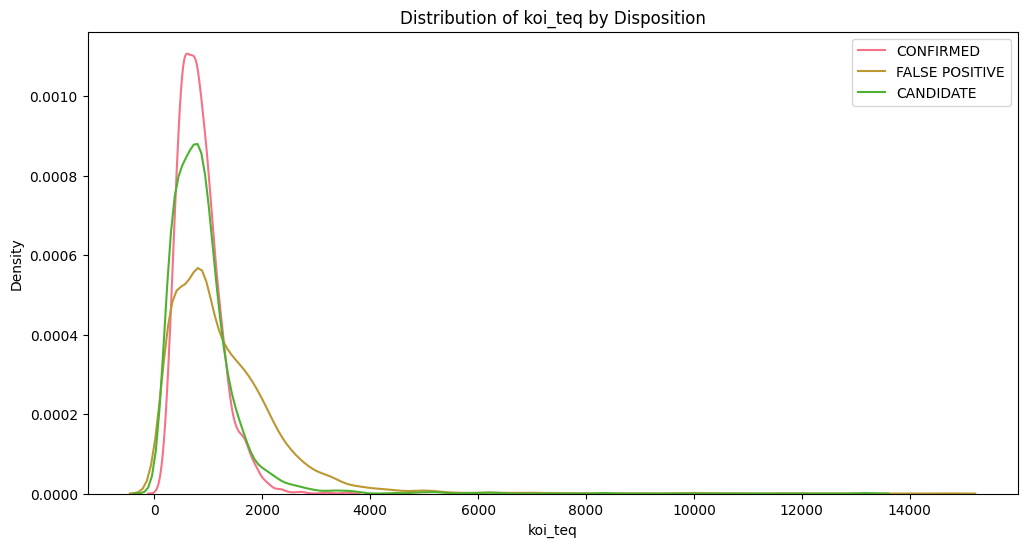


Statistics for koi_teq:
                        mean          std      skew   kurtosis
koi_disposition                                               
CANDIDATE         882.296263   656.222542  5.597385  71.545389
CONFIRMED         839.142608   386.657043  1.180636   2.683420
FALSE POSITIVE   1273.699582  1002.004028  2.881650  18.934495


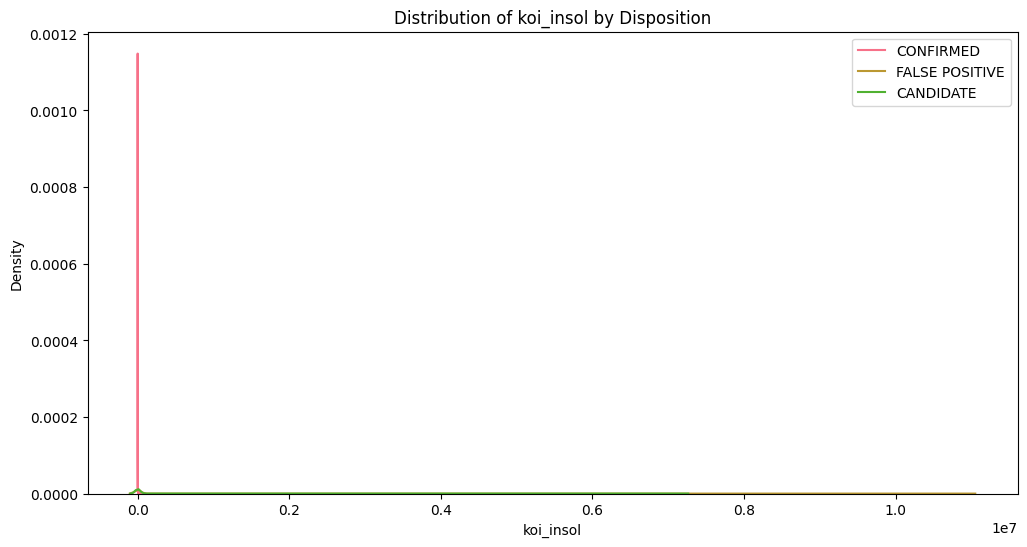


Statistics for koi_insol:
                         mean            std       skew     kurtosis
koi_disposition                                                     
CANDIDATE         5213.179537  153724.396841  45.216811  2094.359898
CONFIRMED          350.574963    1223.416546  17.905402   464.975788
FALSE POSITIVE   11769.103108  189816.197773  43.451267  2292.690244


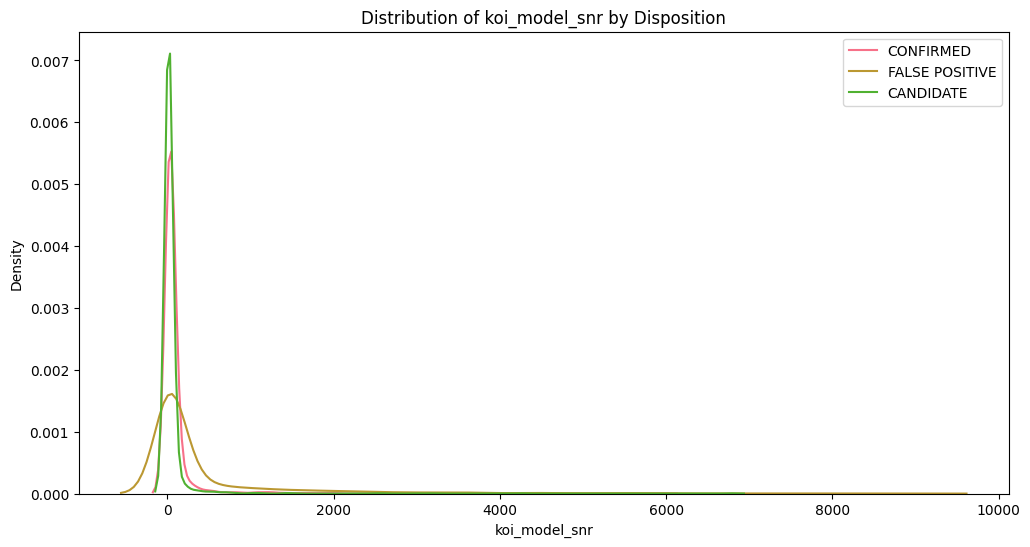


Statistics for koi_model_snr:
                       mean          std       skew    kurtosis
koi_disposition                                                
CANDIDATE         44.962544   228.623339  18.154850  428.903948
CONFIRMED         87.894985   284.026896  10.350785  145.538460
FALSE POSITIVE   417.484352  1022.256544   3.966560   18.827979


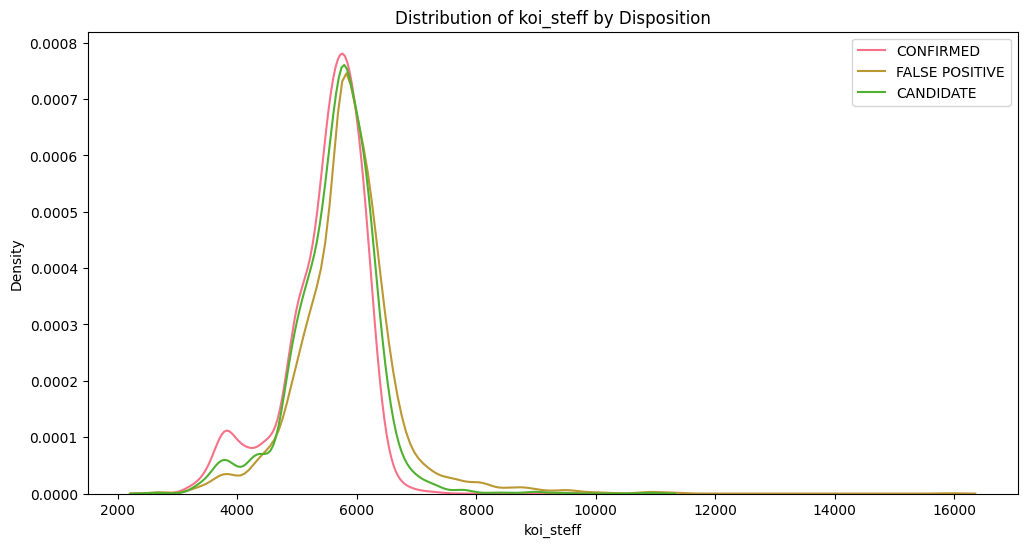


Statistics for koi_steff:
                        mean         std      skew  kurtosis
koi_disposition                                             
CANDIDATE        5643.332295  684.495873 -0.229747  3.824740
CONFIRMED        5478.100305  677.012262 -0.902408  1.853861
FALSE POSITIVE   5843.999005  836.766153  1.287145  9.707451


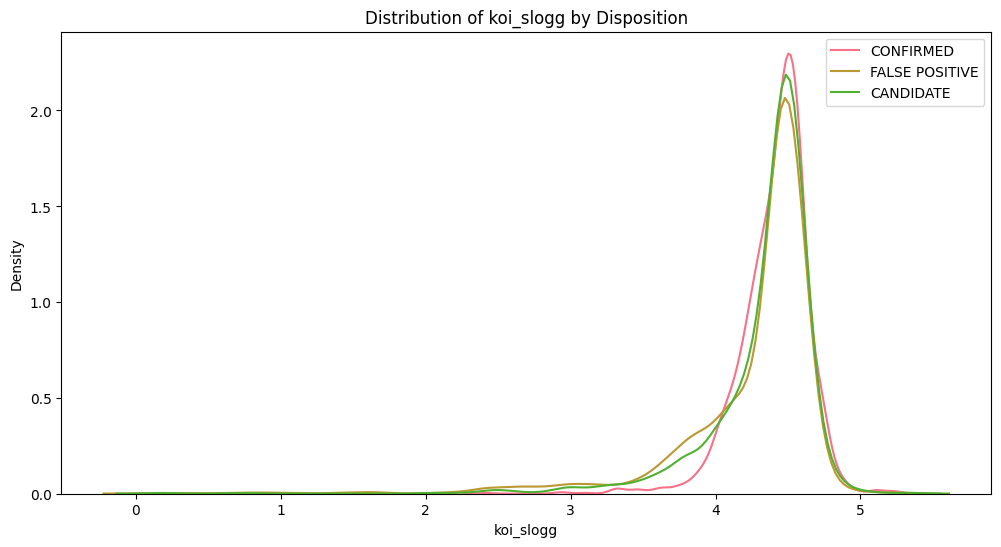


Statistics for koi_slogg:
                     mean       std      skew   kurtosis
koi_disposition                                         
CANDIDATE        4.334466  0.385740 -3.549555  23.057878
CONFIRMED        4.410766  0.235283 -1.375462   6.012734
FALSE POSITIVE   4.262588  0.495011 -3.196416  14.857068


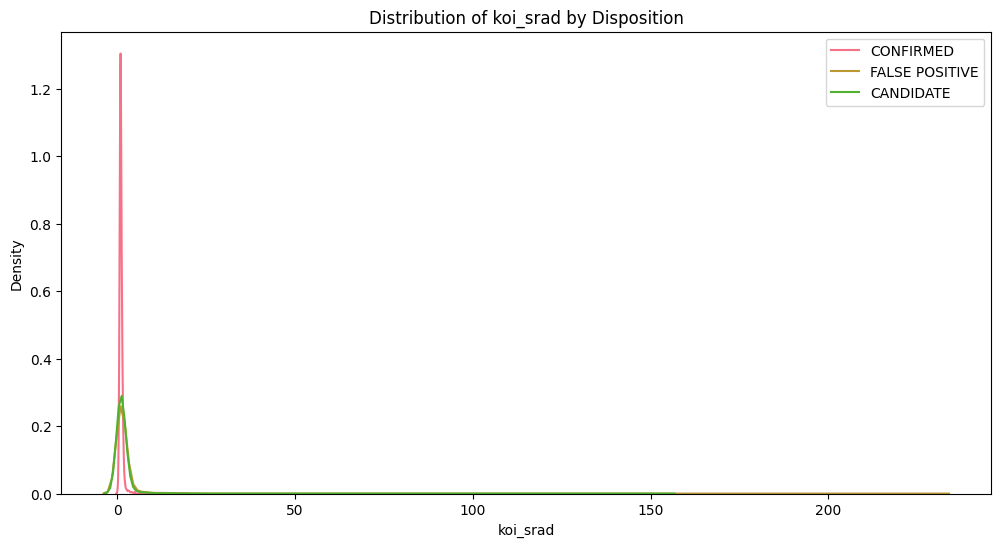


Statistics for koi_srad:
                     mean       std       skew    kurtosis
koi_disposition                                           
CANDIDATE        1.550440  5.792953  23.688023  600.257610
CONFIRMED        1.066519  0.642828  13.011253  317.582420
FALSE POSITIVE   2.058124  7.299806  17.284711  384.650214


In [ ]:
def analyze_feature_distributions_by_class(data, numerical_features):
    """
    Analyze distribution shapes and statistics for each feature by class
    """
    for feature in numerical_features:
        # Calculate skewness and kurtosis by class
        stats_by_class = data.groupby('koi_disposition')[feature].agg([
            'mean',
            'std',
            'skew',
            ('kurtosis', lambda x: stats.kurtosis(x.dropna()))  # Using scipy.stats for kurtosis
        ])

        # Create density plots
        plt.figure(figsize=(12, 6))
        for disposition in data['koi_disposition'].unique():
            sns.kdeplot(data=data[data['koi_disposition'] == disposition][feature],
                       label=disposition)

        plt.title(f'Distribution of {feature} by Disposition')
        plt.legend()
        plt.show()

        print(f"\nStatistics for {feature}:")
        print(stats_by_class)

print("1. Analyzing feature distributions by class...")
analyze_feature_distributions_by_class(data, numerical_features)

#### Insights from Feature distribution Analysis by class

1. **KOI Period Distribution:**
- The orbital periods show a heavily right-skewed distribution for all dispositions
- CONFIRMED planets tend to have shorter periods (mean ≈ 27 days) compared to FALSE POSITIVES (mean ≈ 73 days)
- CANDIDATES show the highest mean period (≈ 130 days) with the largest standard deviation (2744 days)
- High kurtosis values (particularly CANDIDATES at 2230) indicate many extreme outliers
- Most exoplanets cluster at shorter orbital periods, which makes sense as these are easier to detect with the transit method

2. **KOI Impact Distribution:**
- Impact parameter shows distinct patterns across dispositions
- CONFIRMED planets have the lowest mean impact (0.43) and lowest standard deviation (0.33), suggesting more reliable transit detections
- FALSE POSITIVES show much higher impact values (mean ≈ 0.96) with larger variation (std ≈ 4.33)
- Extremely high kurtosis for FALSE POSITIVES (372.55) indicates many unusual cases
- CANDIDATES fall between CONFIRMED and FALSE POSITIVES, reflecting their uncertain nature

3. **KOI Duration Distribution:**
- Transit durations follow a more normal-like distribution but still right-skewed
- FALSE POSITIVES show longer average durations (6.57 hours) with highest standard deviation (8.49)
- CONFIRMED planets have more consistent durations (mean ≈ 4.31 hours, std ≈ 2.72)
- The distributions overlap significantly, making duration alone not a strong discriminator
- Very high kurtosis for FALSE POSITIVES (45.91) suggests many outlier cases

4. **KOI Depth Distribution:**
- Transit depths show extreme right-skew for all categories
- FALSE POSITIVES have much larger average depths (42273) compared to CONFIRMED (1141)
- CANDIDATES show intermediate values (mean ≈ 1823)
- The large standard deviations, especially for FALSE POSITIVES (107551), indicate high variability
- High kurtosis values across all categories suggest many extreme cases

5. **KOI Planetary Radius (Prad) Distribution:**
- FALSE POSITIVES show much larger radii (mean ≈ 180 Earth radii) compared to CONFIRMED planets (2.87 Earth radii)
- CONFIRMED planets cluster tightly around smaller radii, consistent with real planetary sizes
- Extremely high kurtosis values (1532 for CANDIDATES, 1629 for FALSE POSITIVES) indicate many outliers
- The clear separation between CONFIRMED and FALSE POSITIVE radii makes this a potentia

6. **KOI Equilibrium Temperature (teq) Distribution:**
- FALSE POSITIVES show higher average temperatures (1273K) compared to CONFIRMED (839K) and CANDIDATES (882K)
- The distribution is right-skewed for all categories
- CONFIRMED planets show the most concentrated distribution (std ≈ 386K)
- FALSE POSITIVES have much higher variability (std ≈ 1002K)
- Multiple peaks in the distribution might indicate different classes of planets

7. **KOI Insolation Flux (insol) Distribution:**
- Extreme differences in insolation values across categories
- FALSE POSITIVES show very high mean flux (11769) with large variability (std ≈ 189816)
- CONFIRMED planets have much lower insolation (mean ≈ 350) with less variation (std ≈ 1223)
- Very high kurtosis values (2094 for CANDIDATES, 2292 for FALSE POSITIVES) indicate many extreme cases
- This parameter appears to be a strong discriminator between real planets and false positives

8. **KOI Model Signal-to-Noise Ratio (SNR) Distribution:**
- Clear separation between categories in SNR values
- FALSE POSITIVES show highest SNR (mean ≈ 417) with largest spread (std ≈ 1022)
- CONFIRMED planets have moderate SNR (mean ≈ 87) with smaller variation (std ≈ 284)
- High kurtosis values suggest presence of outliers
- Higher SNR in FALSE POSITIVES might indicate systematic errors or non-planetary phenomena

9. **KOI Stellar Effective Temperature (steff) Distribution:**
- Most normal-looking distribution among all parameters
- Small differences between categories (means around 5500-5800K)
- Slightly negative skew for CONFIRMED planets (-0.90)
- Multiple peaks might indicate different stellar populations
- This parameter shows least discrimination between categories

10. **KOI Surface Gravity (slogg) Distribution:**
- Very concentrated distribution around 4.2-4.4 for all categories
- Negative skewness across all categories indicates tail towards lower gravity
- CONFIRMED planets show lowest variation (std ≈ 0.235)
- High kurtosis values suggest most stars are main sequence
- Similar distributions suggest this isn't a strong discriminating feature

Key Additional Insights:
1. Temperature and insolation parameters show strong potential for distinguishing false positives
2. Stellar parameters (steff, slogg) show less variation between categories, suggesting false positives occur across all stellar types
3. Signal-to-noise ratio could be a useful feature for classification, with false positives showing suspiciously high values
4. The combination of these parameters with the previous ones could provide robust classification criteria
5. Many parameters show high kurtosis values, suggesting the need for careful outlier handling in any modeling approach

These patterns suggest:
- Robust scaling will be important due to different scales and distributions
- Non-linear classification methods might be needed due to complex distributions
- Outlier detection and handling should be a key part of the preprocessing pipeline
- Stellar parameters might be more useful as context than as direct classification features of confirmed exoplanets versus false positives

### Outlier Analysis

In [ ]:
def analyze_outliers_detailed(data, numerical_features):
    """
    Detailed outlier analysis using multiple methods
    """
    results = []

    for feature in numerical_features:
        # Z-score method
        z_scores = np.abs(stats.zscore(data[feature].dropna()))
        z_outliers = (z_scores > 3).sum()

        # IQR method
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        iqr_outliers = ((data[feature] < (Q1 - 1.5 * IQR)) |
                       (data[feature] > (Q3 + 1.5 * IQR))).sum()

        # Modified Z-score method
        median = data[feature].median()
        mad = stats.median_abs_deviation(data[feature].dropna())
        modified_z_scores = 0.6745 * (data[feature] - median) / mad
        mod_z_outliers = (np.abs(modified_z_scores) > 3.5).sum()

        results.append({
            'Feature': feature,
            'Z-score Outliers': z_outliers,
            'IQR Outliers': iqr_outliers,
            'Modified Z-score Outliers': mod_z_outliers
        })

    return pd.DataFrame(results)

print("\n2. Performing detailed outlier analysis...")
outlier_results = analyze_outliers_detailed(data, numerical_features)
print(outlier_results)


The outlier analysis identifies the number of outliers in each feature using three methods: Z-score, IQR, and Modified Z-score. Features such as koi_depth, koi_prad, and koi_insol show a high number of outliers across all methods, suggesting significant variability or anomalies in these variables. For instance, koi_depth has over 1500 outliers detected by Z-score and Modified Z-score methods, which may indicate extreme transit depths caused by large planets or observational errors.
These results emphasize the need for careful preprocessing to handle outliers effectively. Depending on their nature, these extreme values could either represent meaningful phenomena (e.g., unusually large planets) or errors requiring correction. Addressing these outliers is crucial for improving model performance and ensuring that predictions are not disproportionately influenced by extreme values.

### PCA Explained Variance Ratio Plot and t-SNE plot for the numerical features

In [ ]:
def perform_dimensionality_reduction(data, numerical_features):
    """
    Perform PCA and t-SNE analysis
    """
    # Prepare data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data[numerical_features])

    # PCA
    pca = PCA()
    pca_result = pca.fit_transform(X_scaled)

    # Plot explained variance ratio
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
             np.cumsum(pca.explained_variance_ratio_), 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('PCA Explained Variance Ratio')
    plt.show()

    # t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(X_scaled)

    # Plot t-SNE results
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1],
                         c=LabelEncoder().fit_transform(data['koi_disposition']))
    plt.colorbar(scatter)
    plt.title('t-SNE Visualization')
    plt.show()

    return pca_result, tsne_result

print("\n3. Performing dimensionality reduction...")
pca_result, tsne_result = perform_dimensionality_reduction(data, numerical_features)

### Insights from the PCA Explained Variance Ratio Plot

The PCA (Principal Component Analysis) explained variance ratio plot illustrates how much variance in the dataset is captured by each principal component. The cumulative curve shows that the first few components account for most of the variance, with approximately 90% of the variance explained by the first 10 components. This indicates that dimensionality reduction can significantly simplify the dataset while retaining most of its information. The steep rise in the curve for the initial components suggests that these components capture the most critical features of the data.

This insight is valuable for reducing computational complexity and improving model performance by eliminating redundant or less informative features. By focusing on these top components, we can reduce noise in the data and improve interpretability without losing significant information. Since we have 11 numerical in total, we are proceeding with using all 11 features instead of the reduced 10 features from PCA, as each feature seems to contain unique information independent of the other features.

---

### Insights from the t-SNE Visualization

The t-SNE (t-Distributed Stochastic Neighbor Embedding) visualization projects high-dimensional data into a two-dimensional space, clustering data points based on their similarity. The plot reveals distinct clusters corresponding to different KOI dispositions (e.g., confirmed exoplanets, false positives). The color gradient represents different classes, with clear separations between certain clusters and overlaps in others. This clustering indicates that some classes are well-separated based on their features, while others share similarities, making them harder to distinguish.

These insights suggest that while some KOI dispositions are easily identifiable using their numerical features, others may require more advanced modeling techniques to improve classification accuracy. The visualization also highlights potential areas where feature engineering or additional data might help improve separability.

---

### Combined Insights

Together, these plots demonstrate the effectiveness of dimensionality reduction techniques in understanding and visualizing high-dimensional data. The PCA plot provides a quantitative understanding of how much variance can be retained with fewer dimensions, guiding feature selection. Meanwhile, the t-SNE visualization offers a qualitative perspective on class separability and potential challenges in classification tasks. These techniques complement each other by providing both a summary of feature importance and an intuitive representation of data structure.


In [ ]:
def perform_clustering_analysis(data, numerical_features):
    """
    Perform clustering analysis and compare with actual classes
    """
    # Prepare data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data[numerical_features])

    # Determine optimal number of clusters using elbow method
    inertias = []
    K = range(1, 10)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)

    # Plot elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

    # Perform clustering with optimal k
    optimal_k = 3  # This should be determined from the elbow plot
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Compare clusters with actual classes
    cluster_comparison = pd.crosstab(clusters, data['koi_disposition'])

    return cluster_comparison

print("\n5. Performing clustering analysis...")
cluster_comparison = perform_clustering_analysis(data, numerical_features)
print("\nCluster Comparison with Actual Classes:")
print(cluster_comparison)

The Elbow Method plot evaluates the optimal number of clusters (k) for clustering the dataset. The plot shows a steady decrease in inertia as the value of k increases. However, there is a noticeable "elbow" around  k=3, where the rate of decrease in inertia slows down. This suggests that k = 3 is an appropriate choice for clustering, balancing model complexity and variance explained. The cluster comparison table further supports this by showing how the actual KOI dispositions (Candidate, Confirmed, False Positive) are distributed across the clusters. This insight indicates that clustering can effectively group KOI dispositions into three main categories, potentially aligning with their true classifications. However, the overlap between classes in certain clusters suggests that additional feature engineering or advanced clustering techniques may be required to improve separation.

In [ ]:
def analyze_feature_importance_rf(data, numerical_features):
    """
    Analyze feature importance using Random Forest
    """
    # Prepare data
    X = data[numerical_features]
    y = data['koi_disposition']

    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)

    # Get feature importance
    importance_df = pd.DataFrame({
        'Feature': numerical_features,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(data=importance_df, x='Importance', y='Feature')
    plt.title('Feature Importance (Random Forest)')
    plt.show()

    return importance_df

print("\n6. Analyzing feature importance using Random Forest...")
rf_importance = analyze_feature_importance_rf(data, numerical_features)
print("\nRandom Forest Feature Importance:")
print(rf_importance)

#Modeling using multiple ML algorithms

**What is the difference between koi_disposition and koi_pdisposition?**


koi_pdisposition and koi_disposition both describe the classification status of KOIs, but they differ in the stage of the classification process.

koi_pdisposition refers to the preliminary classification based on the initial automated vetting process, often reflecting early hypotheses about the KOI's status (e.g., "candidate" or "false positive").

On the other hand, koi_disposition represents the final, human-verified disposition after thorough analysis and additional validation.

While koi_pdisposition can guide early assessments, koi_disposition provides a more reliable and accurate categorization, making it the preferred choice for final evaluations and modeling efforts.

**Why are we choosing koi_disposition as the Target Class?**

The koi_disposition attribute represents the final classification of a Kepler Object of Interest (KOI) as either a confirmed exoplanet, a false positive, or a candidate pending further validation.

This attribute encapsulates the most conclusive outcome in the data, making it highly suitable for a classification task. By using koi_disposition as the target variable, we aim to leverage the most definitive labels to train a model that can predict the status of new or unclassified KOIs. Its categorical nature also ensures a clear objective for the classification model, enabling actionable insights into exoplanetary discoveries.

##RANDOM FOREST - CLASSIFICATION

##Handling the Categorial Data in Columns
Machine learning models like Random Forest require numerical inputs to function. Categorical data (e.g., strings like 'confirmed', 'candidate') needs to be converted into numerical form. This step ensures that the algorithm can interpret and learn patterns from all features.

In our dataset, we identified that some features contained categorical data, which machine learning algorithms cannot process directly. To address this, we implemented Label Encoding, a method that assigns a unique numeric value to each category. This ensured that all features were compatible with our Random Forest Classifier, enabling effective training and predictions.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load the cleaned dataset
cleaned_data_path = '/content/cleaned_dataset.xlsx'
df = pd.read_excel(cleaned_data_path)

#Handle categorical features
categorical_columns = df.select_dtypes(include=['object']).columns

if not categorical_columns.empty:
    print(f"Categorical columns detected: {categorical_columns.tolist()}")

    # Use LabelEncoder for each categorical column
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Save the encoders for future use (optional)


We aim to classify the disposition of celestial objects (koi_disposition) using features derived from the Kepler dataset, such as stellar radii, orbital periods, and signal-to-noise ratios. This is a supervised classification task.

In [ ]:
#Define features (X) and target (y)
target_column = 'koi_disposition'
X = df.drop(columns=[target_column])
y = df[target_column]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Feature Importance
feature_importances = model.feature_importances_
important_features = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

# Plot top 10 important features
important_features[:10].plot(kind='bar', title='Top 10 Important Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


To classify the disposition of celestial objects, we implemented a Random Forest Classifier. The model was trained using key features from the Kepler dataset, such as stellar radii and orbital periods, after splitting the data into training and testing subsets. The classifier achieved an accuracy of 0.9111, as evaluated using precision, recall, and F1-scores. Furthermore, feature importance analysis revealed that signal-to-noise ratio and planetary radius were among the most critical predictors.

##Support Vector Machines

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, classification_report, cohen_kappa_score, f1_score
from yellowbrick.classifier import ClassificationReport, ClassPredictionError, ConfusionMatrix
from yellowbrick.target import FeatureCorrelation
from yellowbrick.features import rank2d, RadViz, Rank2D
from yellowbrick.classifier import DiscriminationThreshold, PrecisionRecallCurve, ROCAUC
from yellowbrick.model_selection import feature_importances, CVScores, RFECV, FeatureImportances
from yellowbrick.model_selection import LearningCurve, ValidationCurve
from yellowbrick.classifier import ClassificationReport, ClassPredictionError, ConfusionMatrix

# Set plotting style
# plt.style.use('seaborn')
sns.set_palette('husl')

In [ ]:
cleaned_data_path = '/content/cleaned_dataset.xlsx'
data = pd.read_excel(cleaned_data_path)

#### Selecting Columns for Prediction

We eliminate all the columns that are either of the following: <br>

- Assigned after other values are measured from readings
- Contain ID or name attributes

In [ ]:
ALL_COLUMNS = data.columns
ERROR_COLUMNS = [col for col in ALL_COLUMNS if "err" in col]
EXCLUDE = ["rowid", "kepid", "kepoi_name", "koi_score", "koi_disposition", "koi_pdisposition", "koi_tce_delivname", "koi_tce_plnt_num"]
TO_USE = list(set(ALL_COLUMNS) - set(EXCLUDE))

In [ ]:
print(f"Columns being analysed: {len(TO_USE)}")
data[TO_USE].head()

We extract only those rows which are either positive or negative examples i.e. the disposition value is not CANDIDATE. This is because CANDIDATE is the default value for all obects of interest picked up by Kepler. The labels CONFIRMED and FALSE POSITIVE serve as our positive and negative labels

Difference between disposition and pdisposition?
We can use either of the two columns as our target variable, since both of them contain the target labels we desire. While pdisposition gives us the most probable labels based on the physical explanation given by the readings, disposition values are based on the NASA Exoplanet Archive Data.

In [ ]:
np.unique(data["koi_disposition"].values)


In [ ]:
subset_df = data[data["koi_disposition"] != "CANDIDATE"]
print(subset_df.shape)
subset_df.head()

#### Obtaining X and y
We can encode the categorical labels to 1 and 0 for easier comparison

CONFIRMED - 1
FALSE POSITIVE - 0

In [ ]:
X = subset_df[TO_USE].values
y = subset_df["koi_disposition"].apply(lambda x: x=='CONFIRMED').astype(int).values
subset_df["koi_disposition"].value_counts()

#### Splitting into Train and Test sets

- Scale the values to make the models less computationally expensive and convert all the values to the same range
- Split into train and test sets

In [ ]:
X = StandardScaler().fit_transform(X)
X = PCA(n_components=30).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Since the dataset is imbalanced, we cannot use accuracy, hence we opt for the following metrics -

- Confusion Matrix
- F1 Score
- Cohen Kappa Score
- Balanced Accuracy Score

In [ ]:
def performance(test, pred):
    conf_matrix = confusion_matrix(test, pred)
    f1 = f1_score(test, pred)
    report = classification_report(test, pred)
    accuracy = balanced_accuracy_score(test, pred)
    kappa = cohen_kappa_score(test, pred)
    print(f"F1 Score: {f1}")
    print(f"Kappa Score: {kappa}")
    print(f"Accuracy Score: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(report)

#### Cross Validation

In [ ]:
def crossValidationCheck(classifier, X, y, K=10):

    cv = KFold(n_splits=K, random_state=1, shuffle=True)
    scores = cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
    print(f"Average F1 score over {K}-Folds: {scores.mean()}")

    visualizer = CVScores(classifier, cv=cv, scoring='f1')
    visualizer.fit(X, y)
    #visualizer.show(f"{classifier[:5]}_cv_error.png", dpi=600)

    visualizer = LearningCurve(classifier, cv=cv, scoring='f1', n_jobs=-1)
    visualizer.fit(X, y)
    #visualizer.show(f"{classifier[:5]}_learn_curve_error.png", dpi=600)

    cv = StratifiedKFold(n_splits=K, random_state=1, shuffle=True)
    scores = cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
    print(f"Average F1 score over Stratified {K}-Folds: {scores.mean()}")

    visualizer = CVScores(classifier, cv=cv, scoring='f1')
    visualizer.fit(X, y)
    #visualizer.show(f"{classifier[:5]}_cv_strat_error.png", dpi=600)

    visualizer = LearningCurve(classifier, cv=cv, scoring='f1', n_jobs=-1)
    visualizer.fit(X, y)
    #visualizer.show(f"{classifier[:5]}_learn_curve_strat_error.png", dpi=600)

#### Feature Importance


In [ ]:
def getFeatureImportance(model, X, y):
    viz = FeatureImportances(model, labels=TO_USE)
    viz.fit(X, y)
    #viz.show(f"{model}_imp_error.png", dpi=600)

Training and prediction using SVM

In [ ]:
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

In [ ]:
performance(y_test, pred)


In [ ]:
def getClassificationReport(classifier):
    visualizer = ClassificationReport(classifier, classes=[0, 1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    #visualizer.show(f"{classifier}_report_error.png", dpi=600)



In [ ]:
getClassificationReport(classifier)


In [ ]:
crossValidationCheck(classifier, X, y, K=10)

# ADABoost

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
file_path = 'cleaned_dataset.xlsx'  # File name from upload
dataset = pd.ExcelFile(file_path)
cleaned_data = dataset.parse('Cleaned Data')

# Step 3: Encode Target Variable
We will encode the target column (`koi_disposition`) to numeric values using `LabelEncoder`. This is necessary for machine learning algorithms to process the data.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
cleaned_data['koi_disposition_encoded'] = label_encoder.fit_transform(cleaned_data['koi_disposition'])

# Select numerical features for modeling
numerical_features = cleaned_data.select_dtypes(include=['float64', 'int64']).drop(
    ['rowid', 'kepid', 'koi_disposition_encoded'], axis=1, errors='ignore')

X = numerical_features
y = cleaned_data['koi_disposition_encoded']


# Step 2: Split Data for Training and Testing
We will split the dataset into training and testing sets using an 80-20 split. This allows us to evaluate the model on unseen data.


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 3: Train the AdaBoost Model
We will initialize and train the AdaBoost Classifier using the training data. AdaBoost combines multiple weak classifiers to create a strong classifier.


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Explicitly specifying the algorithm to suppress the warning
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm="SAMME.R")
adaboost.fit(X_train, y_train)



# Step 4: Evaluate the Model
We will use the test data to evaluate the model's performance using accuracy, confusion matrix, and a classification report.


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = adaboost.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


# Step 5: Feature Importance
We will analyze the most important features that contributed to the AdaBoost model's decision-making.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Analyze feature importance
feature_importances = adaboost.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = numerical_features.columns[sorted_indices]

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.bar(sorted_features[:10], feature_importances[sorted_indices[:10]])
plt.xticks(rotation=45)
plt.title("Top 10 Feature Importances in AdaBoost")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


# **XGBoost**

# Step 1 - Extracting the Dataframe Subset

In [ ]:
ALL_COLUMNS = cleaned_data.columns
EXCLUDE = ["rowid", "kepid", "kepoi_name", "koi_score", "koi_disposition", "koi_pdisposition", "koi_tce_delivname", "koi_tce_plnt_num", "score_bins"]
TO_USE = list(set(ALL_COLUMNS) - set(EXCLUDE))

In [ ]:
cleaned_data[TO_USE].head()

In [ ]:
cleaned_data_subset = cleaned_data[cleaned_data["koi_disposition"] != "CANDIDATE"]
print(cleaned_data_subset.shape)
cleaned_data_subset.head()

In [ ]:
X = cleaned_data_subset[TO_USE].values
y = cleaned_data_subset["koi_disposition"].apply(lambda x: x=='CONFIRMED').astype(int).values
cleaned_data_subset["koi_disposition"].value_counts()

We filter the dataset to include only rows with disposition values representing positive or negative examples, excluding those labeled as CANDIDATE. This is because CANDIDATE is the default classification assigned to all objects of interest identified by Kepler. The CONFIRMED and FALSE POSITIVE labels are used as the positive and negative classes, respectively.

# **STEP 2 - Data Preprocessing and Dimensionality Reduction**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = StandardScaler().fit_transform(X)
X = PCA(n_components=30).fit_transform(X)

The preprocessing pipeline includes:

*   Standardization of features to have zero mean and unit variance
*   Dimensionality reduction using PCA to 30 components


# **Step 3 - Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

The data is split into training (67%) and testing (33%) sets, with stratification to maintain class distribution.

# Step 4 - Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
def performance(test, pred):
    conf_matrix = confusion_matrix(test, pred)
    accuracy = accuracy_score(test, pred)
    f1 = f1_score(test, pred)
    report = classification_report(test, pred)

    print(f"Confusion Matrix: \n{conf_matrix}")
    print(f"Accuracy Score: {accuracy}")
    print(f"F1 Score: {f1}")
    print(report)

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from yellowbrick.model_selection import CVScores, LearningCurve

def crossValidationCheck(classifier, X, y, K=10):

    cross_val = KFold(n_splits=K, random_state=1, shuffle=True)
    scores = cross_val_score(classifier, X, y, scoring='f1', cv=cross_val, n_jobs=-1)
    print(f"Average F1 score over {K}-Folds: {scores.mean()}")


    visualizer = CVScores(classifier, cv=cross_val, scoring='f1')
    visualizer.fit(X, y)

    visualizer = LearningCurve(classifier, cv=cross_val, scoring='f1', n_jobs=-1)
    visualizer.fit(X, y)

    cross_val = StratifiedKFold(n_splits=K, random_state=1, shuffle=True)
    scores = cross_val_score(classifier, X, y, scoring='f1', cv=cross_val, n_jobs=-1)
    print(f"Average F1 score over Stratified {K}-Folds: {scores.mean()}")

    visualizer = CVScores(classifier, cv=cross_val, scoring='f1')
    visualizer.fit(X, y)

    visualizer = LearningCurve(classifier, cv=cross_val, scoring='f1', n_jobs=-1)
    visualizer.fit(X, y)

In [ ]:
from yellowbrick.classifier import ClassPredictionError, ClassificationReport, PrecisionRecallCurve

def getClassPredictionError(classifier):
    visualizer = ClassPredictionError(classifier, classes=[0, 1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)

def getClassificationReport(classifier):
    visualizer = ClassificationReport(classifier, classes=[0, 1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)

def getPrecisionRecall(classifier):
    visualizer = PrecisionRecallCurve(classifier)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)

# Step 5 - Model Implementation

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

# Initialize the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
performance(y_test, y_pred)

**Results** -

The model achieves 98.4% accuracy, indicating strong overall performance.

An F1-score of 0.9741 demonstrates effective handling of precision and recall.

With precision and recall of 0.99, the model excels at identifying non-exoplanets.

Precision (0.98) and recall (0.97) show robust detection of exoplanets, though slightly fewer false negatives can be addressed.

In [ ]:
getClassificationReport(model)

The heat map reveals outstanding metrics for both classes:
False Positives (Class 0):

Precision: 0.979 indicates very few false alarms
Recall: 0.970 shows excellent detection of non-exoplanets
F1: 0.974 demonstrates balanced performance

Confirmed Exoplanets (Class 1):

Precision: 0.986 shows high confidence in positive predictions
Recall: 0.990 indicates nearly perfect detection of actual exoplanets
F1: 0.988 reflects exceptional overall performance

These results collectively suggest a highly reliable model for Kepler exoplanet classification, with particularly strong performance in identifying confirmed exoplanets while maintaining very low false positive rates.

In [ ]:
getPrecisionRecall(model)

The precision-recall curve maintains near-perfect performance (close to 1.0) until very high recall values

*  The large area under the curve (light blue shading) indicates robust classification ability
*  The sharp drop only at the extreme right suggests the model only struggles with a tiny fraction of edge cases
* The consistent high precision across different recall thresholds shows balanced performance

In [ ]:
crossValidationCheck(model, X, y, K=10)

* The blue line (training score) maintains a consistent high performance around 0.98-1.0
* The green line (validation score) starts at ~0.88 and steadily improves to ~0.98
* The narrow shaded area around both lines indicates low variance in performance
* Convergence at around 4000 samples suggests optimal dataset size
* The small gap between training and validation scores (~0.02) indicates excellent generalization

#Interpretation And Results
After applying multiple machine learning algorithms, including Random Forest, Support Vector Machine (SVM), AdaBoost, and XGBoost to classify planetary statuses in the Kepler dataset, we derived valuable insights into the models' performances. These algorithms were evaluated based on metrics such as accuracy, precision, recall, F1-score, and class-wise analysis. Below is the consolidated interpretation and results of the classification models.

Random Forest:

The Random Forest model achieved an accuracy of 91.1%, demonstrating strong overall performance. However, the model exhibited varying predictive capabilities across classes:

Class 2 (CONFIRMED exoplanets): Achieved an F1-score of 0.99, with perfect classification and no misclassifications.

Class 0 (FALSE POSITIVES): F1-score of 0.82, with moderate recall suggesting that some false positives were missed due to class imbalance.

Class 1 (CANDIDATES): F1-score of 0.82, with noticeable confusion with Class 0.

The confusion matrix revealed:

95 instances of Class 0 misclassified as Class 1.
64 instances of Class 1 misclassified as Class 0.
These results indicate potential overlap in the feature space between Classes 0 and 1, but the model's high precision and recall for Class 2 reflect its strength in identifying confirmed exoplanets.

Support Vector Machine (SVM)

The Support Vector Machine model demonstrated exceptional performance across all metrics, achieving an overall accuracy of 98%. It maintained high precision, recall, and F1-scores for all classes, even in the presence of class imbalance:

Class 0:
Precision: 0.99, Recall: 0.98, F1-score: 0.99 (support: 1658 samples).

Class 1:
Precision: 0.96, Recall: 0.97, F1-score: 0.97 (support: 757 samples).

Class 2:
Precision: 0.99, Recall: 0.98, F1-score: 0.99 (support: 1008 samples).

The model's macro and weighted averages for precision, recall, and F1-score were consistently 0.98, reflecting its balanced performance across all classes. The heatmap visualization confirmed uniformly high scores, highlighting SVM's strong generalization capabilities.

AdaBoost

The AdaBoost model achieved an accuracy of 84%, showcasing robust performance in specific cases, particularly for the FALSE POSITIVE class:

FALSE POSITIVE Class:
Precision: 98%, Recall: 96%, F1-score: 97%.

CONFIRMED Class:

Recall: 80%, indicating that the model reliably predicts this category despite its complexity.

Key Findings:

AdaBoost effectively identified the most influential features:
koi_period: Orbital period of the planet.
koi_prad: Planetary radius.
koi_depth: Depth of the transit event.

By combining multiple weak classifiers, AdaBoost exhibited robustness and adaptability, particularly excelling in identifying FALSE POSITIVE cases.
The model demonstrated practical utility in planetary classification systems by providing reliable predictions for CONFIRMED and CANDIDATE classes.

4. XGBoost

Accuracy: The XGBoost model achieved the highest accuracy of 98.4%, outperforming Random Forest, SVM, and AdaBoost.
Class-Wise Performance:

Class 0 (False Positives):

Precision: 97.9%

Recall: 97.0%

F1-Score: 97.4%

Class 1 (Confirmed Exoplanets):

Precision: 98.6%

Recall: 99.0%

F1-Score: 98.8%

Precision-Recall Curve:
Maintains near-perfect performance until extreme recall values, indicating robustness across thresholds.
The large area under the curve (AUC) highlights its superior classification ability.

Learning Curve Insights:
The XGBoost model converges at 4000 samples, with minimal variance between training and validation scores.
The small gap (~0.02) between training and validation indicates excellent generalization and minimal overfitting.


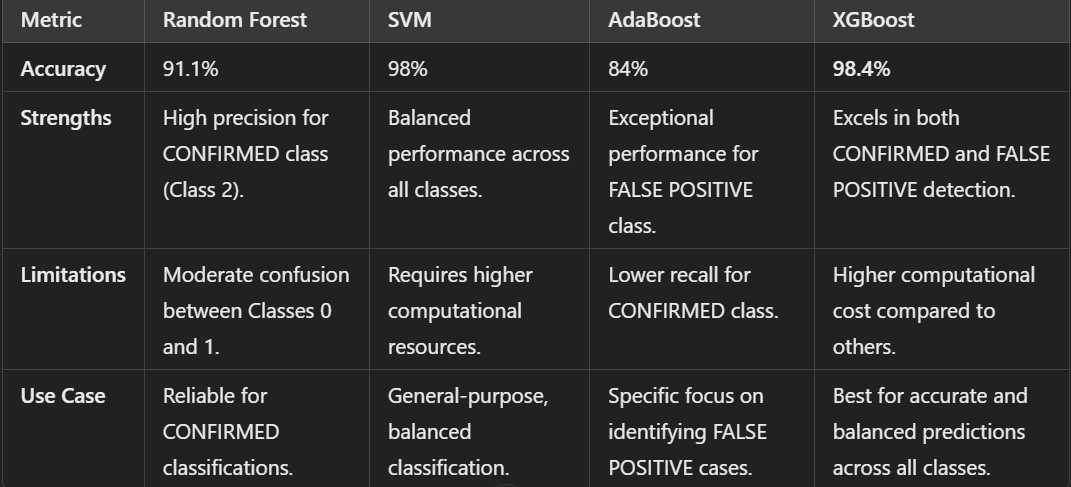

#Conclusion:

The machine learning models implemented in this study demonstrate significant real-world applicability in advancing exoplanet research and supporting astronomical discoveries. The SVM model, with its exceptional accuracy of 98% and balanced performance across all classes, is highly reliable for large-scale classification tasks, such as identifying planetary statuses (CANDIDATE, CONFIRMED, and FALSE POSITIVE). The Random Forest model excelled in identifying CONFIRMED exoplanets, making it particularly valuable for prioritizing detections for further validation through telescopic observations. Similarly, the AdaBoost model, with its exceptional precision of 98% for FALSE POSITIVE classifications, is well-suited for efficiently screening planetary candidates, reducing the workload of astronomers by focusing on promising cases. The XGBoost model, with the highest accuracy of 98.4%, demonstrates outstanding performance across all metrics, excelling in both CONFIRMED and FALSE POSITIVE classifications. Its robust handling of precision and recall makes it ideal for production-level deployment in planetary classification tasks.

Furthermore, the identification of key features such as koi_period (orbital period), koi_prad (planetary radius), and koi_depth (depth of transit events) provides critical insights into the physical characteristics of exoplanets, guiding future research into planetary formation and habitability. These models also address class imbalance effectively, particularly SVM, AdaBoost, and XGBoost, which maintain high performance for minority classes. Overall, these machine learning solutions are well-positioned to support missions like NASA’s Kepler and TESS by automating planetary classification, enabling efficient processing of large datasets, and contributing to exploratory and confirmatory analyses in the field of astronomy.